In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as math
from matplotlib.ticker import FuncFormatter

%matplotlib inline

In [18]:
covid_data = pd.read_csv('us-counties-covid19-20200516.csv')

In [19]:
covid_data.head()

date     county       state     fips  cases  deaths
0  2020-01-21  Snohomish  Washington  53061.0      1       0
1  2020-01-22  Snohomish  Washington  53061.0      1       0
2  2020-01-23  Snohomish  Washington  53061.0      1       0
3  2020-01-24       Cook    Illinois  17031.0      1       0
4  2020-01-24  Snohomish  Washington  53061.0      1       0

In [20]:
len(covid_data[covid_data['date'] == '2020-05-16'])

2930

In [21]:
covid_data.rename(columns={'fips':'FIPS'},inplace=True)

In [22]:
# replace NaNs in 'FIPS' column with 100 (arbitrary, dummy value) so left join will work properly, ...
# otherwise these rows (mostly 'Unknown' counties will be duplicated 3x after join)
covid_data['FIPS'].fillna(100,inplace=True)

In [23]:
covid_data.head()

date     county       state     FIPS  cases  deaths
0  2020-01-21  Snohomish  Washington  53061.0      1       0
1  2020-01-22  Snohomish  Washington  53061.0      1       0
2  2020-01-23  Snohomish  Washington  53061.0      1       0
3  2020-01-24       Cook    Illinois  17031.0      1       0
4  2020-01-24  Snohomish  Washington  53061.0      1       0

In [24]:
USA_pop_county = pd.read_csv('USA_state_county_population_data_2010-2019.csv',encoding = "ISO-8859-1")

In [25]:
HH_income = pd.read_csv('MedianHHIncome_2018.csv')

In [26]:
HH_income.head()

FIPS State           Area_name  MedianHHInc_2018
0  1001.0    AL  Autauga County, AL           59338.0
1  1003.0    AL  Baldwin County, AL           57588.0
2  1005.0    AL  Barbour County, AL           34382.0
3  1007.0    AL     Bibb County, AL           46064.0
4  1009.0    AL   Blount County, AL           50412.0

In [27]:
covid_data.shape

(150169, 6)

In [28]:
covid_data = pd.merge(covid_data, HH_income, on='FIPS', how='left')

In [29]:
covid_data.shape         # make sure this is same as above (before the left join with "HH_income")

(150169, 9)

In [30]:
covid_data.head()

date     county       state     FIPS  cases  deaths State  \
0  2020-01-21  Snohomish  Washington  53061.0      1       0    WA   
1  2020-01-22  Snohomish  Washington  53061.0      1       0    WA   
2  2020-01-23  Snohomish  Washington  53061.0      1       0    WA   
3  2020-01-24       Cook    Illinois  17031.0      1       0    IL   
4  2020-01-24  Snohomish  Washington  53061.0      1       0    WA   

              Area_name  MedianHHInc_2018  
0  Snohomish County, WA           87096.0  
1  Snohomish County, WA           87096.0  
2  Snohomish County, WA           87096.0  
3       Cook County, IL           63347.0  
4  Snohomish County, WA           87096.0

In [31]:
covid_data.drop(columns = ['State', 'Area_name'],inplace=True)

In [32]:
covid_data.head()

date     county       state     FIPS  cases  deaths  MedianHHInc_2018
0  2020-01-21  Snohomish  Washington  53061.0      1       0           87096.0
1  2020-01-22  Snohomish  Washington  53061.0      1       0           87096.0
2  2020-01-23  Snohomish  Washington  53061.0      1       0           87096.0
3  2020-01-24       Cook    Illinois  17031.0      1       0           63347.0
4  2020-01-24  Snohomish  Washington  53061.0      1       0           87096.0

In [33]:
USA_pop_county = USA_pop_county[['STNAME', 'CTYNAME', 'POPESTIMATE2019']]
USA_pop_county.columns = ['State', 'County', '2019EstPop']
USA_pop_county['State_County'] = USA_pop_county['State'] + "_" + USA_pop_county['County']

In [34]:
covid_data['county'] = covid_data['county'] + ' County'
covid_data['State_County'] = covid_data['state'] + "_" + covid_data['county']

In [35]:
covid_data.sort_values(by=['state', 'county'], inplace = True)

In [36]:
covid_data.head()

date          county    state    FIPS  cases  deaths  \
9480   2020-03-24  Autauga County  Alabama  1001.0      1       0   
10832  2020-03-25  Autauga County  Alabama  1001.0      4       0   
12361  2020-03-26  Autauga County  Alabama  1001.0      6       0   
14021  2020-03-27  Autauga County  Alabama  1001.0      6       0   
15801  2020-03-28  Autauga County  Alabama  1001.0      6       0   

       MedianHHInc_2018            State_County  
9480            59338.0  Alabama_Autauga County  
10832           59338.0  Alabama_Autauga County  
12361           59338.0  Alabama_Autauga County  
14021           59338.0  Alabama_Autauga County  
15801           59338.0  Alabama_Autauga County

In [37]:
len(covid_data[covid_data.state == 'District of Columbia'])

71

In [38]:
covid_data.reset_index(drop=True, inplace = True)

In [39]:
# manually change 'Allen County' in Louisiana to 'Allen Parish' BECAUSE there are also 'Allen County' in other states
covid_data.iloc[list(covid_data[covid_data['county'] == 'Allen County'][covid_data['state'] == 'Louisiana'].index),1] = 'Allen Parish'

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [40]:
# manually change 'Orleans County' in Louisiana to 'Orleans Parish' BECAUSE there are also 'Orleans County' in other states; similar for other counties
covid_data.iloc[list(covid_data[covid_data['county'] == 'Orleans County'][covid_data['state'] == 'Louisiana'].index),1] = 'Orleans Parish'
covid_data.iloc[list(covid_data[covid_data['county'] == 'Jefferson County'][covid_data['state'] == 'Louisiana'].index),1] = 'Jefferson Parish'
covid_data.iloc[list(covid_data[covid_data['county'] == 'Lafayette County'][covid_data['state'] == 'Louisiana'].index),1] = 'Lafayette Parish'
covid_data.iloc[list(covid_data[covid_data['county'] == 'Caddo County'][covid_data['state'] == 'Louisiana'].index),1] = 'Caddo Parish'
covid_data.iloc[list(covid_data[covid_data['county'] == 'St. Charles County'][covid_data['state'] == 'Louisiana'].index),1] = 'St. Charles Parish'
covid_data.iloc[list(covid_data[covid_data['county'] == 'Ouachita County'][covid_data['state'] == 'Louisiana'].index),1] = 'Ouachita Parish'
covid_data.iloc[list(covid_data[covid_data['county'] == 'District of Columbia County'][covid_data['state'] == 'District of Columbia'].index),1] = 'District of Columbia'
covid_data.iloc[list(covid_data[covid_data['county'] == 'New York City County'].index),1] = 'New York City'

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: 

In [41]:
# note the left join when merging COVID-19 dataset with US population dataset
covid_data = pd.merge(covid_data, USA_pop_county, on='State_County', how='left')

In [42]:
list3 = ['Kings County', 'Queens County', 'Bronx County', 'Richmond County', 'New York County']

In [28]:
covid_data[covid_data.county.isin(list3)][covid_data.state == 'New York']

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Empty DataFrame
Columns: [date, county, state, FIPS, cases, deaths, MedianHHInc_2018, State_County, State, County, 2019EstPop]
Index: []

In [29]:
# list4 = ['New York_' + i for i in list3]

In [43]:
covid_data.shape

(150169, 11)

In [44]:
# exclude rows where 'State_County' is in list4 (see above)
covid_data = covid_data[~covid_data.State_County.isin(list4)]      

NameError: name 'list4' is not defined

In [45]:
covid_data.shape

(150169, 11)

In [46]:
covid_data.drop(columns = ['State', 'County'], inplace = True)

#### List of County Names to be Re-Named (to be properly joined with USA population file)

In [47]:
county_list1 = ['Acadia County', 
                'Alexandria city County', 
                'Anchorage County', 
                'Ascension County', 
                'Assumption County',
                'Avoyelles County', 
                'Fairbanks North Star Borough County', 
                'Juneau City and Borough County',
                'St. Tammany County', 
                'East Baton Rouge County', 
                'Baltimore city County', 
                'St. Louis city County',
                'St. John the Baptist County',
                'District of Columbia County',
                'Kansas City County',
                'St. Bernard County',
                'Lafourche County',
                'Virginia Beach city County',
                'St. James County',
                'Bossier County',
                'Falls Church city County',
                'St. Landry County',
                'West Baton Rouge County']
county_list2 = ['Acadia Parish',
                'Alexandria city',
                'Anchorage Municipality',
                'Ascension Parish',
                'Assumption Parish',
                'Avoyelles Parish',
                'Fairbanks North Star Borough',
                'Juneau City and Borough',
                'St. Tammany Parish',
                'East Baton Rouge Parish',
                'Baltimore city',
                'St. Louis city',
                'St. John the Baptist Parish',
                'District of Columbia',
                'Kansas City',
                'St. Bernard Parish',
                'Lafourche Parish',
                'Virginia Beach city', 
                'St. James Parish',
                'Bossier Parish',
                'Falls Church city',
                'St. Landry Parish',
                'West Baton Rouge Parish']

In [48]:
covid_data.replace(to_replace = county_list1, value = county_list2, inplace = True)

In [49]:
covid_data.drop(columns = 'State_County', inplace = True)

In [50]:
covid_data['State_County'] = covid_data['state'] + "_" + covid_data['county']

In [51]:
len(covid_data[covid_data.state == 'District of Columbia'])

71

In [52]:
covid_data = pd.merge(covid_data, USA_pop_county, on='State_County', how='left')

In [53]:
covid_data.drop(columns = ['State', 'County', '2019EstPop_x'], inplace = True)

In [54]:
covid_data.rename(columns={'2019EstPop_y':'2019EstPop'}, inplace = True)

In [55]:
covid_data.head()

date          county    state    FIPS  cases  deaths  \
0  2020-03-24  Autauga County  Alabama  1001.0      1       0   
1  2020-03-25  Autauga County  Alabama  1001.0      4       0   
2  2020-03-26  Autauga County  Alabama  1001.0      6       0   
3  2020-03-27  Autauga County  Alabama  1001.0      6       0   
4  2020-03-28  Autauga County  Alabama  1001.0      6       0   

   MedianHHInc_2018            State_County  2019EstPop  
0           59338.0  Alabama_Autauga County     55869.0  
1           59338.0  Alabama_Autauga County     55869.0  
2           59338.0  Alabama_Autauga County     55869.0  
3           59338.0  Alabama_Autauga County     55869.0  
4           59338.0  Alabama_Autauga County     55869.0

In [56]:
# verify that this has not changed (ie no duplicates) after merging covid_data and USA_pop_county
len(covid_data[covid_data.state == 'District of Columbia'])

71

In [57]:
null_HHInc = covid_data[covid_data['MedianHHInc_2018'].isnull()]
null_HHInc = null_HHInc[null_HHInc.county != 'Unknown County']
null_HHInc.head()

date       county     state   FIPS  cases  deaths  \
76555  2020-03-20  Kansas City  Missouri  100.0     12       0   
76556  2020-03-21  Kansas City  Missouri  100.0     13       0   
76557  2020-03-22  Kansas City  Missouri  100.0     13       0   
76558  2020-03-23  Kansas City  Missouri  100.0     18       0   
76559  2020-03-24  Kansas City  Missouri  100.0     30       0   

       MedianHHInc_2018          State_County  2019EstPop  
76555               NaN  Missouri_Kansas City    491918.0  
76556               NaN  Missouri_Kansas City    491918.0  
76557               NaN  Missouri_Kansas City    491918.0  
76558               NaN  Missouri_Kansas City    491918.0  
76559               NaN  Missouri_Kansas City    491918.0

### <span style="color:red"> Next steps: manually add median HH income for two 'State_County" combinations below

In [58]:
set(null_HHInc.State_County)

{'Missouri_Kansas City', 'New York_New York City'}

In [59]:
covid_data['date'] = pd.to_datetime(covid_data['date'])

In [60]:
covid_data.dtypes

date                datetime64[ns]
county                      object
state                       object
FIPS                       float64
cases                        int64
deaths                       int64
MedianHHInc_2018           float64
State_County                object
2019EstPop                 float64
dtype: object

In [61]:
covid_data_US = covid_data.groupby('date')['cases', 'deaths'].sum()
covid_data_US = covid_data_US[covid_data_US.index > '2020-03-02']

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [62]:
covid_data_US.tail()

cases  deaths
date                       
2020-05-12  1376649   82336
2020-05-13  1397833   84104
2020-05-14  1424847   85842
2020-05-15  1450964   87434
2020-05-16  1474612   88660

In [63]:
covid_data_latest_states = covid_data[covid_data.date == covid_data.date.max()].groupby('state')['cases', 'deaths'].sum()
covid_data_latest_states.sort_values(by='deaths', ascending=False).head(10)

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


cases  deaths
state                        
New York       353136   27953
New Jersey     145089   10249
Massachusetts   84933    5705
Michigan        50416    4880
Pennsylvania    65228    4490
Illinois        92669    4149
Connecticut     36703    3339
California      78933    3254
Louisiana       34117    2413
Florida         44803    1963

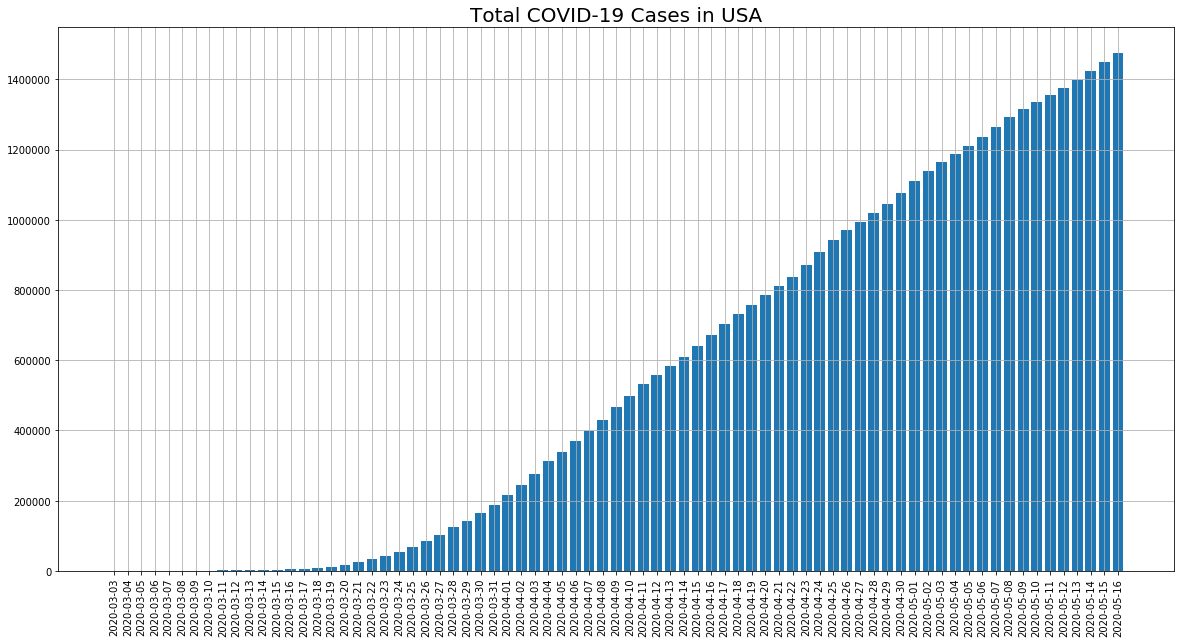

In [64]:
plt.figure(figsize=[20,10])
plt.grid()
plt.title('Total COVID-19 Cases in USA', fontsize = '20')
plt.bar(covid_data_US.index, covid_data_US.cases)

plt.xticks(covid_data_US.index, fontsize = '10', rotation = 90);

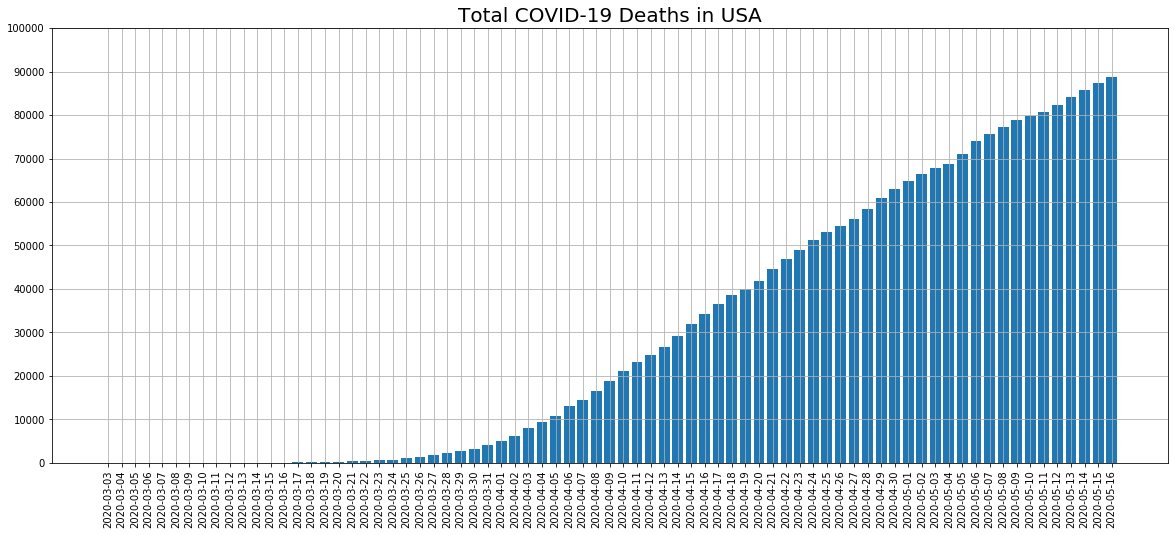

In [65]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total COVID-19 Deaths in USA', fontsize = '20')
plt.bar(covid_data_US.index, covid_data_US.deaths)

y_ticks = np.linspace(0,100000,11)
plt.xticks(covid_data_US.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [66]:
covid_data_US_daily = covid_data_US.diff()
covid_data_US_daily.columns = ['cases_newdaily', 'deaths_newdaily']

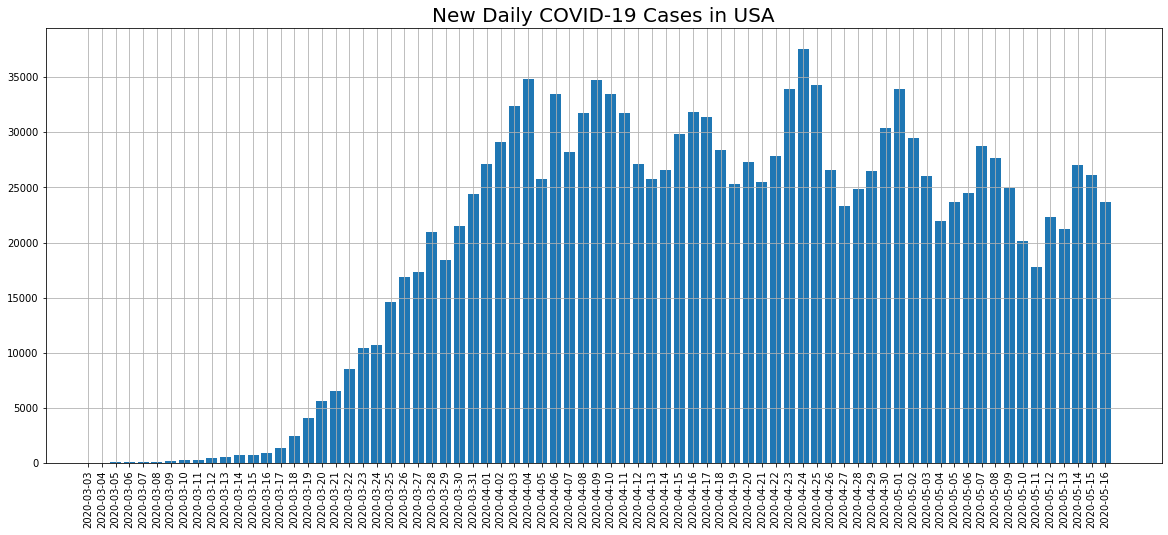

In [67]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('New Daily COVID-19 Cases in USA', fontsize = '20')
plt.bar(covid_data_US_daily.index, covid_data_US_daily.cases_newdaily)

plt.xticks(covid_data_US_daily.index, fontsize = '10', rotation = 90);

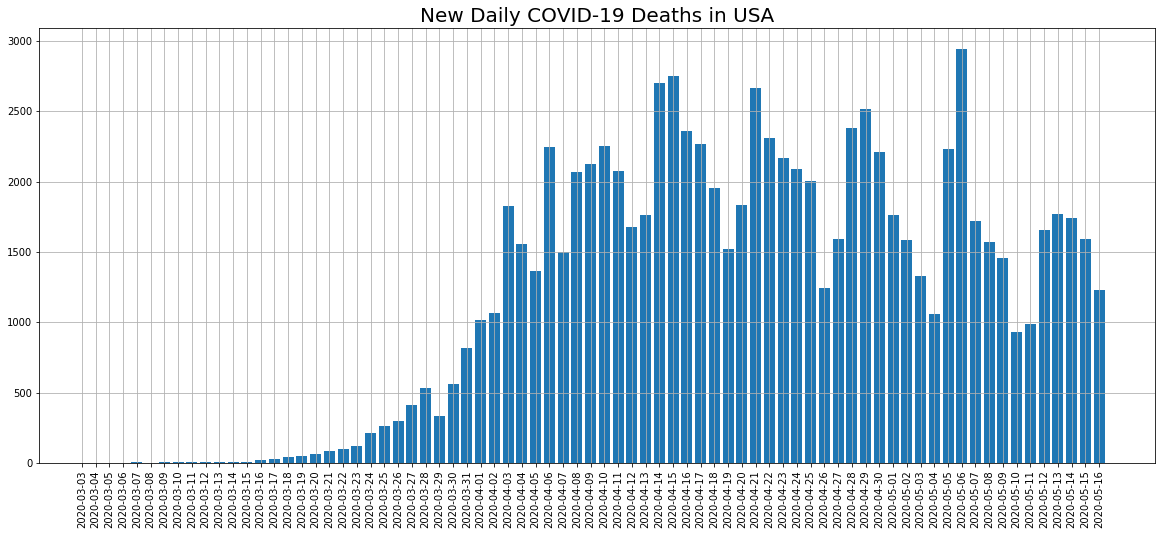

In [68]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('New Daily COVID-19 Deaths in USA', fontsize = '20')
plt.bar(covid_data_US_daily.index, covid_data_US_daily.deaths_newdaily)

plt.xticks(covid_data_US_daily.index, fontsize = '10', rotation = 90);

## <span style="color:red">  __Next Steps__

Step 1: See list of counties below where population is null, look up appropriate county in US county population file, replace incorrect values with correct values (__BEWARE__ of counties with same name in multiple states, these need to be changed manually, e.g. Allen County vs Allen Parish)
<br> Step 2: Delete 'State_County' column
<br> Step 3: Re-create 'State_County' column again with 'State' and _ + 'County' (now correct names) columns
<br> Step 4: Merge again with population file
<br> Step 5: Drop extra columns, until there are no errors in population column

In [69]:
covid_data_pop_null = covid_data[covid_data['2019EstPop'].isnull()].groupby(['state','county'])[['cases', 'deaths', '2019EstPop']].sum()

In [70]:
covid_data_pop_null.reset_index(inplace=True)

In [71]:
covid_data_pop_null = covid_data_pop_null[~covid_data_pop_null.county.isin(['Unknown County'])]
covid_data_pop_null.sort_values(by = 'cases', ascending=False)

state                             county  cases  deaths  2019EstPop
62   Louisiana                  Tangipahoa County  21347     798         0.0
64   Louisiana                  Terrebonne County  16554    1117         0.0
31   Louisiana                   Calcasieu County  16048    1021         0.0
44   Louisiana                   Iberville County  15831    1061         0.0
113   Virginia           Harrisonburg city County  14345     388         0.0
..         ...                                ...    ...     ...         ...
5       Alaska            Nome Census Area County     32       0         0.0
3       Alaska       Kodiak Island Borough County     31       0         0.0
8       Alaska      Sitka City and Borough County     21       0         0.0
105   Virginia              Covington city County     11       0         0.0
11      Alaska  Valdez-Cordova Census Area County     10       0         0.0

[91 rows x 5 columns]

In [72]:
covid_data_pop_null.state.value_counts()

Louisiana    44
Virginia     34
Alaska       12
Nevada        1
Name: state, dtype: int64

###  <span style="color:red"> Challenge - transpose the dataset, columns are dates, rows are counties/states, values are total cases 

In [73]:
covid_data.columns

Index(['date', 'county', 'state', 'FIPS', 'cases', 'deaths',
       'MedianHHInc_2018', 'State_County', '2019EstPop'],
      dtype='object')

In [74]:
state_list = list(set(covid_data.state))
state_list = sorted(state_list)
state_list.remove('Guam')
state_list.remove('Northern Mariana Islands')
state_list.remove('Virgin Islands')
state_list.remove('Puerto Rico')
len(state_list)

51

In [75]:
# change date filter below to only include last 4 days of data
covid_dbl = covid_data[covid_data['date'] > '2020-05-12'][covid_data.state.isin(state_list)][['date', 'State_County', 'cases']]
covid_dbl.reset_index(drop=True, inplace=True)

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [76]:
# PIVOT function, SOOOO COOOLLLLLL!!!!! =DDD
COVID_dbl_dailycol = covid_dbl.pivot(index='State_County', columns = 'date', values = 'cases')
COVID_dbl_dailycol.head(20)

date                      2020-05-13  2020-05-14  2020-05-15  2020-05-16
State_County                                                            
Alabama_Autauga County          93.0       104.0       103.0       110.0
Alabama_Baldwin County         231.0       243.0       244.0       254.0
Alabama_Barbour County          69.0        74.0        79.0        79.0
Alabama_Bibb County             46.0        46.0        49.0        50.0
Alabama_Blount County           45.0        45.0        45.0        45.0
Alabama_Bullock County          28.0        28.0        32.0        35.0
Alabama_Butler County          230.0       249.0       258.0       271.0
Alabama_Calhoun County         127.0       128.0       129.0       130.0
Alabama_Chambers County        324.0       326.0       326.0       328.0
Alabama_Cherokee County         24.0        25.0        26.0        27.0
Alabama_Chilton County          73.0        74.0        75.0        77.0
Alabama_Choctaw County          72.0        77.0        81.0        84.0
Alabama_Clarke County           65.0        68.0        70.0        74.0
Alabama_Clay County             27.0        27.0        27.0        27.0
Alabama_Cleburne County         13.0        13.0        13.0        13.0
Alabama_Coffee County          158.0       159.0       162.0       164.0
Alabama_Colbert County          74.0        79.0        83.0        87.0
Alabama_Conecuh County          16.0        17.0        18.0        18.0
Alabama_Coosa County            33.0        34.0        34.0        34.0
Alabama_Covington County        56.0        56.0        56.0        57.0

In [77]:
COVID_dbl_dailycol.columns = [('cases_' + date.strftime('%Y%m%d')) for date in list(COVID_dbl_dailycol.columns)]

In [78]:
COVID_dbl_dailycol.reset_index(inplace=True)

In [79]:
COVID_dbl_dailycol.head()

State_County  cases_20200513  cases_20200514  cases_20200515  \
0  Alabama_Autauga County            93.0           104.0           103.0   
1  Alabama_Baldwin County           231.0           243.0           244.0   
2  Alabama_Barbour County            69.0            74.0            79.0   
3     Alabama_Bibb County            46.0            46.0            49.0   
4   Alabama_Blount County            45.0            45.0            45.0   

   cases_20200516  
0           110.0  
1           254.0  
2            79.0  
3            50.0  
4            45.0

In [80]:
COVID_dbl_dailycol.columns[4]

'cases_20200516'

In [83]:
COVID_dbl_dailycol['Pct_change'] = COVID_dbl_dailycol[COVID_dbl_dailycol.columns[4]] / COVID_dbl_dailycol[COVID_dbl_dailycol.columns[1]] - 1

In [84]:
COVID_dbl_dailycol['Dailygrowthrate'] = (1+COVID_dbl_dailycol['Pct_change'])**(1/3)

In [85]:
# NY_COVID_by_county_dailycol.drop(columns=['Doublingtime_days', 'Implied_dailygrowthrate'], inplace=True)

In [86]:
COVID_dbl_dailycol['Doublingtime_days'] = 0.0

In [87]:
# ADVANCED FLOW CONTROL statement in Python (error handling, try [block of code] otherwise [block of code])
for i in range(0, len(COVID_dbl_dailycol.index)):
    try:
        COVID_dbl_dailycol.iloc[i,len(list(COVID_dbl_dailycol.columns))-1] = math.log(2) / math.log(COVID_dbl_dailycol.iloc[i,len(list(COVID_dbl_dailycol.columns))-2])
    except:
        pass

In [88]:
COVID_dbl_dailycol = COVID_dbl_dailycol[COVID_dbl_dailycol.Doublingtime_days > 0.0]
COVID_dbl_dailycol = COVID_dbl_dailycol.sort_values(by='Doublingtime_days')
COVID_dbl_dailycol.reset_index(drop=True, inplace=True)
COVID_dbl_dailycol.head(20)

State_County  cases_20200513  cases_20200514  \
0              Tennessee_Wayne County             3.0             3.0   
1            Missouri_Sullivan County             3.0             9.0   
2              Colorado_Gilpin County             1.0             2.0   
3                Texas_Houston County            21.0            71.0   
4                 Kansas_Brown County             1.0             1.0   
5                 Iowa_Unknown County             5.0             8.0   
6   South Dakota_Oglala Lakota County             3.0             3.0   
7            Wisconsin_Lincoln County             1.0             2.0   
8              Oklahoma_Blaine County             1.0             1.0   
9                 Texas_Reeves County             1.0             1.0   
10              Wyoming_Carbon County             5.0             7.0   
11               Texas_Madison County             3.0             4.0   
12             Texas_Wilbarger County             2.0             2.0   
13      Louisiana_West Carroll County             5.0             6.0   
14            Idaho_Washington County            10.0            13.0   
15          South Dakota_Grant County             4.0             5.0   
16              Georgia_Monroe County            44.0            45.0   
17                 Ohio_Monroe County            25.0            28.0   
18                Ohio_Hocking County            28.0            29.0   
19             Virginia_Sussex County            38.0            53.0   

    cases_20200515  cases_20200516  Pct_change  Dailygrowthrate  \
0             61.0            63.0   20.000000         2.758924   
1             13.0            34.0   10.333333         2.246221   
2              3.0             4.0    3.000000         1.587401   
3             74.0            76.0    2.619048         1.535317   
4              3.0             3.0    2.000000         1.442250   
5             10.0            15.0    2.000000         1.442250   
6              6.0             9.0    2.000000         1.442250   
7              2.0             3.0    2.000000         1.442250   
8              2.0             3.0    2.000000         1.442250   
9              3.0             3.0    2.000000         1.442250   
10             8.0            14.0    1.800000         1.409460   
11             6.0             8.0    1.666667         1.386723   
12             5.0             5.0    1.500000         1.357209   
13            11.0            12.0    1.400000         1.338866   
14            20.0            23.0    1.300000         1.320006   
15             7.0             9.0    1.250000         1.310371   
16            47.0            95.0    1.159091         1.292479   
17            53.0            53.0    1.120000         1.284632   
18            31.0            59.0    1.107143         1.282029   
19            67.0            80.0    1.105263         1.281648   

    Doublingtime_days  
0            0.683011  
1            0.856531  
2            1.500000  
3            1.616719  
4            1.892789  
5            1.892789  
6            1.892789  
7            1.892789  
8            1.892789  
9            1.892789  
10           2.019622  
11           2.120085  
12           2.269412  
13           2.375232  
14           2.496601  
15           2.564267  
16           2.701671  
17           2.767364  
18           2.789950  
19           2.793295

In [89]:
COVID_dbl_dailycol.tail(20)

State_County  cases_20200513  cases_20200514  \
1891           Indiana_Miami County           130.0           130.0   
1892       Missouri_Franklin County           133.0           134.0   
1893        Tennessee_Tipton County           400.0           402.0   
1894            Idaho_Canyon County           275.0           276.0   
1895     Oklahoma_Washington County           300.0           301.0   
1896       Tennessee_Bledsoe County           603.0           603.0   
1897  Massachusetts_Franklin County           302.0           302.0   
1898      Kansas_Leavenworth County           952.0           952.0   
1899            Indiana_Cass County          1546.0          1548.0   
1900           Illinois_Ogle County           173.0           174.0   
1901       New Jersey_Bergen County         17150.0         17080.0   
1902         Florida_Liberty County           198.0           199.0   
1903      Vermont_Chittenden County           432.0           432.0   
1904       Louisiana_Orleans Parish          6753.0          6768.0   
1905        Georgia_Rockdale County           248.0           249.0   
1906             Georgia_Lee County           343.0           343.0   
1907        Louisiana_Iberia County           352.0           352.0   
1908         Hawaii_Honolulu County           414.0           414.0   
1909            Idaho_Blaine County           507.0           507.0   
1910     Tennessee_Trousdale County          1381.0          1382.0   

      cases_20200515  cases_20200516  Pct_change  Dailygrowthrate  \
1891           130.0           131.0    0.007692         1.002558   
1892           134.0           134.0    0.007519         1.002500   
1893           402.0           403.0    0.007500         1.002494   
1894           277.0           277.0    0.007273         1.002418   
1895           301.0           302.0    0.006667         1.002217   
1896           605.0           607.0    0.006633         1.002206   
1897           304.0           304.0    0.006623         1.002203   
1898           957.0           958.0    0.006303         1.002096   
1899          1553.0          1555.0    0.005821         1.001937   
1900           174.0           174.0    0.005780         1.001923   
1901         17195.0         17246.0    0.005598         1.001862   
1902           199.0           199.0    0.005051         1.001681   
1903           433.0           434.0    0.004630         1.001541   
1904          6787.0          6781.0    0.004146         1.001380   
1905           249.0           249.0    0.004032         1.001342   
1906           344.0           344.0    0.002915         1.000971   
1907           352.0           353.0    0.002841         1.000946   
1908           414.0           415.0    0.002415         1.000805   
1909           508.0           508.0    0.001972         1.000657   
1910          1382.0          1382.0    0.000724         1.000241   

      Doublingtime_days  
1891         271.365793  
1892         277.604148  
1893         278.297298  
1894         286.961677  
1895         312.954801  
1896         314.514387  
1897         315.034250  
1898         330.976690  
1899         358.240562  
1900         360.782109  
1901         372.522321  
1902         412.768273  
1903         450.198293  
1904         502.555744  
1905         516.740526  
1906         714.287665  
1907         733.002652  
1908         861.928101  
1909        1055.316241  
1910        2872.748364

In [90]:
COVID_dbl_dailycol[COVID_dbl_dailycol[COVID_dbl_dailycol.columns[1]] >= 50].head(20)

State_County  cases_20200513  cases_20200514  \
59              Iowa_Crawford County           207.0           300.0   
60           Florida_Hamilton County            86.0           134.0   
70             Minnesota_Rice County           134.0           181.0   
71                Texas_Titus County            59.0            74.0   
77       Rhode Island_Unknown County          1046.0          1227.0   
81      North Carolina_Wilkes County           262.0           277.0   
84            Florida_Gadsden County           138.0           139.0   
85      North Carolina_Craven County            55.0            72.0   
86         New Jersey_Unknown County           662.0           802.0   
110              Texas_Potter County          1421.0          1462.0   
113   North Carolina_Buncombe County           105.0           116.0   
114  South Carolina_Fairfield County            83.0            96.0   
117        Arizona_Santa Cruz County            50.0            62.0   
121        Iowa_Pottawattamie County           105.0           138.0   
130    North Carolina_Forsyth County           449.0           508.0   
131           Georgia_Unknown County          1284.0          1363.0   
134           Kentucky_Shelby County            54.0            54.0   
135            Oklahoma_Texas County           474.0           541.0   
140          Minnesota_Steele County            73.0            85.0   
147        South Dakota_Brown County           143.0           154.0   

     cases_20200515  cases_20200516  Pct_change  Dailygrowthrate  \
59            336.0           348.0    0.681159         1.189058   
60            144.0           144.0    0.674419         1.187466   
70            197.0           221.0    0.649254         1.181488   
71             83.0            96.0    0.627119         1.176178   
77           1430.0          1645.0    0.572658         1.162906   
81            287.0           405.0    0.545802         1.156249   
84            179.0           211.0    0.528986         1.152041   
85             81.0            84.0    0.527273         1.151610   
86            885.0           996.0    0.504532         1.145866   
110          2080.0          2129.0    0.498241         1.144267   
113           138.0           152.0    0.447619         1.131231   
114           108.0           120.0    0.445783         1.130753   
117            69.0            72.0    0.440000         1.129243   
121           151.0           150.0    0.428571         1.126248   
130           568.0           627.0    0.396437         1.117739   
131          1644.0          1787.0    0.391745         1.116486   
134            65.0            75.0    0.388889         1.115722   
135           606.0           658.0    0.388186         1.115533   
140            92.0           100.0    0.369863         1.110604   
147           173.0           194.0    0.356643         1.107019   

     Doublingtime_days  
59            4.002901  
60            4.034100  
70            4.156199  
71            4.271560  
77            4.592741  
81            4.774370  
84            4.897362  
85            4.910324  
86            5.090660  
110           5.143421  
113           5.621325  
114           5.640676  
117           5.702676  
121           5.830075  
130           6.227296  
131           6.290700  
134           6.330033  
135           6.339807  
140           6.607469  
147           6.817539

In [74]:
COVID_dbl_dailycol[COVID_dbl_dailycol.State_County.str.contains('Michigan')]

State_County  cases_20200513  cases_20200514  \
27              Michigan_Luce County             1.0             1.0   
96              Michigan_Lake County             2.0             2.0   
97          Michigan_Chippewa County             2.0             2.0   
98            Michigan_Alcona County             4.0             5.0   
171        Michigan_Menominee County             6.0             7.0   
290           Michigan_Oceana County            38.0            44.0   
293          Michigan_Gratiot County            34.0            35.0   
350             Michigan_Cass County            44.0            46.0   
400          Michigan_Mecosta County            16.0            17.0   
430          Michigan_Berrien County           425.0           470.0   
454        Michigan_Van Buren County            94.0           100.0   
477            Michigan_Clare County            12.0            14.0   
482           Michigan_Ottawa County           444.0           483.0   
519         Michigan_Muskegon County           406.0           435.0   
580            Michigan_Huron County            36.0            39.0   
589            Michigan_Mason County            22.0            23.0   
612           Michigan_Ogemaw County            15.0            16.0   
622           Michigan_Branch County            84.0            90.0   
624             Michigan_Kent County          2446.0          2627.0   
725         Michigan_Leelanau County             9.0            10.0   
753          Michigan_Newaygo County            37.0            38.0   
768       Michigan_St. Joseph County            76.0            79.0   
790        Michigan_Kalamazoo County           643.0           669.0   
805           Michigan_Antrim County            10.0            10.0   
840   Michigan_Grand Traverse County            21.0            23.0   
854        Michigan_St. Clair County           373.0           394.0   
859              Michigan_Bay County           214.0           226.0   
865        Michigan_Hillsdale County           152.0           155.0   
1013      Michigan_Charlevoix County            13.0            13.0   
1074          Michigan_Arenac County            28.0            29.0   
1159         Michigan_Saginaw County           849.0           866.0   
1164           Michigan_Ionia County           111.0           114.0   
1169          Michigan_Ingham County           605.0           619.0   
1283           Michigan_Iosco County            55.0            56.0   
1285         Michigan_Allegan County           165.0           168.0   
1293         Michigan_Calhoun County           280.0           286.0   
1355       Michigan_Roscommon County            20.0            20.0   
1386      Michigan_Shiawassee County           213.0           219.0   
1409           Michigan_Eaton County           155.0           161.0   
1411         Michigan_Midland County            67.0            67.0   
1479          Michigan_Monroe County           404.0           415.0   
1482         Michigan_Clinton County           127.0           129.0   
1489         Michigan_Lenawee County           129.0           132.0   
1517           Michigan_Barry County            54.0            58.0   
1555         Michigan_Genesee County          1784.0          1813.0   
1559           Michigan_Wayne County         18389.0         18770.0   
1560          Michigan_Alpena County            88.0            88.0   
1615         Michigan_Unknown County          2269.0          2321.0   
1633          Michigan_Lapeer County           175.0           176.0   
1642          Michigan_Macomb County          6137.0          6232.0   
1668       Michigan_Washtenaw County          1210.0          1231.0   
1681         Michigan_Tuscola County           161.0           163.0   
1684         Michigan_Oakland County          7830.0          7952.0   
1718         Michigan_Jackson County           405.0           411.0   
1755       Michigan_Marquette County            51.0            

In [75]:
COVID_dbl_dailycol[COVID_dbl_dailycol.State_County.str.contains('Illinois')].head(60)

State_County  cases_20200513  cases_20200514  \
55         Illinois_Fulton County             4.0             6.0   
169      Illinois_Moultrie County             6.0             6.0   
182       Illinois_De Witt County             3.0             4.0   
204        Illinois_Shelby County            10.0            11.0   
211       Illinois_Pulaski County            31.0            33.0   
260      Illinois_Marshall County             4.0             4.0   
261        Illinois_Mercer County            12.0            13.0   
281        Illinois_McLean County           127.0           130.0   
327          Illinois_Ford County            14.0            15.0   
375        Illinois_Saline County             5.0             6.0   
387     Illinois_Winnebago County          1208.0          1337.0   
426         Illinois_Coles County            62.0            62.0   
427        Illinois_Grundy County            62.0            65.0   
484       Illinois_Johnson County             6.0             6.0   
492         Illinois_Union County           105.0           113.0   
520    Illinois_Stephenson County           118.0           119.0   
523     Illinois_Champaign County           318.0           324.0   
566    Illinois_Cumberland County             7.0             8.0   
569     Illinois_Henderson County             7.0             7.0   
573       Illinois_Clinton County           142.0           155.0   
582          Illinois_Kane County          3744.0          3995.0   
615        Illinois_DeKalb County           211.0           217.0   
629     Illinois_McDonough County            54.0            58.0   
632      Illinois_Iroquois County           101.0           107.0   
661         Illinois_Clark County             8.0             9.0   
672       Illinois_Kendall County           497.0           518.0   
689       Illinois_Fayette County            17.0            17.0   
700         Illinois_Boone County           253.0           268.0   
711         Illinois_Brown County             9.0             9.0   
750          Illinois_Lake County          5758.0          5992.0   
787        Illinois_DuPage County          5244.0          5453.0   
788       Illinois_McHenry County          1049.0          1083.0   
802          Illinois_Bond County            10.0            10.0   
891       Illinois_LaSalle County           111.0           113.0   
899          Illinois_Knox County            79.0            79.0   
902    Illinois_Montgomery County            34.0            36.0   
922          Illinois_Will County          3973.0          4090.0   
923          Illinois_Cook County         56406.0         58457.0   
936       Illinois_Carroll County            12.0            12.0   
980         Illinois_Macon County           151.0           154.0   
987     Illinois_St. Clair County           788.0           788.0   
1024     Illinois_Sangamon County           292.0           292.0   
1079      Illinois_Madison County           449.0           461.0   
1091     Illinois_Kankakee County           835.0           874.0   
1125        Illinois_Mason County            15.0            16.0   
1177    Illinois_Whiteside County           112.0           112.0   
1190       Illinois_Monroe County            81.0            82.0   
1198       Illinois_Morgan County            33.0            34.0   
1211  Illinois_Rock Island County           538.0           543.0   
1229       Illinois_Jersey County            17.0            18.0   
1231       Illinois_Menard County            17.0            17.0   
1234      Illinois_Jackson County           171.0           175.0   
1244          Illinois_Lee County            70.0            70.0   
1289       Illinois_Peoria County           148.0           151.0   
1332     Illinois_Macoupin County            39.0            41.0   
1336     Illinois_Tazewell County            59.0            58.0   
1359        Illinois_Henry County            61.0            62.0   
1406      Illinois_

In [76]:
COVID_dbl_dailycol[COVID_dbl_dailycol.State_County.str.contains('California')]

State_County  cases_20200513  cases_20200514  \
29             California_Tehama County             1.0             1.0   
220             California_Glenn County             7.0             9.0   
275         California_Del Norte County             4.0             4.0   
324          California_Imperial County           647.0           712.0   
442            California_Fresno County          1014.0          1074.0   
528          California_Humboldt County            67.0            68.0   
642             California_Kings County           348.0           358.0   
673            California_Tulare County          1268.0          1295.0   
704            California_Orange County          3843.0          4025.0   
716            California_Merced County           180.0           189.0   
743              California_Napa County            82.0            84.0   
761            California_Sonoma County           337.0           351.0   
807             California_Butte County            20.0            22.0   
818    California_San Bernardino County          3153.0          3198.0   
871             California_Marin County           274.0           278.0   
900           California_Ventura County           725.0           742.0   
904              California_Kern County          1363.0          1403.0   
934       California_Los Angeles County         34428.0         35329.0   
989           California_Alameda County          2199.0          2202.0   
999          California_Monterey County           298.0           309.0   
1062        California_San Diego County          5341.0          5454.0   
1129        California_El Dorado County            60.0            62.0   
1170       California_Stanislaus County           526.0           537.0   
1272           California_Sutter County            36.0            37.0   
1322       California_San Benito County            58.0            59.0   
1323        California_San Mateo County          1533.0          1550.0   
1326        California_Riverside County          5343.0          5440.0   
1339      California_San Joaquin County           638.0           644.0   
1384  California_San Luis Obispo County           232.0           237.0   
1499     California_Contra Costa County          1080.0          1089.0   
1563    California_San Francisco County          1997.0          2007.0   
1573       California_Sacramento County          1182.0          1193.0   
1577           California_Solano County           402.0           413.0   
1601           California_Shasta County            33.0            33.0   
1625           California_Madera County            69.0            69.0   
1671    California_Santa Barbara County          1377.0          1382.0   
1702           California_Placer County           170.0           172.0   
1707      California_Santa Clara County          2364.0          2391.0   
1714             California_Yolo County           179.0           182.0   
1738       California_Santa Cruz County           146.0           149.0   

      cases_20200515  cases_20200516  Pct_change  Dailygrowthrate  \
29               2.0             2.0    1.000000         1.259921   
220              9.0             9.0    0.285714         1.087380   
275              4.0             5.0    0.250000         1.077217   
324            786.0           786.0    0.214838         1.067020   
442           1156.0          1192.0    0.175542         1.055389   
528             72.0            77.0    0.149254         1.047463   
642            372.0           392.0    0.126437         1.040484   
673           1338.0          1426.0    0.124606         1.039920   
704           4163.0          4281.0    0.113973         1.036633   
716            200.0           200.0    0.111111         1.035744   
743             84.0            91.0    0.109756         1.035323   
761            364.0           373.0    0.106825         1.034411   
807             22.0            22.0    0.100000      

In [77]:
COVID_dbl_dailycol[COVID_dbl_dailycol.State_County.str.contains('Arkansas')]

State_County  cases_20200513  cases_20200514  \
49            Arkansas_Yell County             7.0             9.0   
102          Arkansas_Perry County             8.0            10.0   
124          Arkansas_Sharp County            26.0            36.0   
137       Arkansas_Crawford County             8.0             8.0   
186         Arkansas_Nevada County             3.0             3.0   
194   Arkansas_Independence County            19.0            22.0   
209      Arkansas_Jefferson County           280.0           300.0   
219      Arkansas_Hempstead County             7.0             7.0   
229          Arkansas_Union County            84.0           105.0   
262        Arkansas_Bradley County            12.0            12.0   
289     Arkansas_Washington County           114.0           126.0   
292           Arkansas_Pope County            51.0            52.0   
336      Arkansas_Craighead County           113.0           127.0   
367         Arkansas_Baxter County             5.0             6.0   
630    Arkansas_Mississippi County            54.0            55.0   
649         Arkansas_Sevier County            24.0            24.0   
721            Arkansas_Lee County             9.0            10.0   
735       Arkansas_Ouachita County             9.0             9.0   
815         Arkansas_Benton County           131.0           136.0   
832       Arkansas_Faulkner County            83.0            83.0   
971    Arkansas_St. Francis County           310.0           316.0   
1128     Arkansas_Cleveland County            15.0            15.0   
1134       Arkansas_Garland County           121.0           126.0   
1136        Arkansas_Saline County            76.0            78.0   
1144    Arkansas_Crittenden County           216.0           219.0   
1218         Arkansas_Desha County            17.0            18.0   
1266       Arkansas_Pulaski County           647.0           661.0   
1343        Arkansas_Miller County            40.0            40.0   
1394        Arkansas_Lonoke County            43.0            44.0   
1467      Arkansas_Poinsett County            25.0            25.0   
1530    Arkansas_Hot Spring County            28.0            29.0   
1616         Arkansas_Cross County            34.0            35.0   
1636      Arkansas_Lawrence County            71.0            72.0   
1830       Arkansas_Lincoln County           942.0           949.0   

      cases_20200515  cases_20200516  Pct_change  Dailygrowthrate  \
49               9.0            13.0    0.857143         1.229179   
102             12.0            12.0    0.500000         1.144714   
124             37.0            37.0    0.423077         1.124802   
137              9.0            11.0    0.375000         1.111990   
186              4.0             4.0    0.333333         1.100642   
194             23.0            25.0    0.315789         1.095794   
209            310.0           362.0    0.292857         1.089390   
219              9.0             9.0    0.285714         1.087380   
229            105.0           107.0    0.273810         1.084014   
262             13.0            15.0    0.250000         1.077217   
289            131.0           141.0    0.236842         1.073424   
292             61.0            63.0    0.235294         1.072976   
336            130.0           137.0    0.212389         1.066303   
367              6.0             6.0    0.200000         1.062659   
630             58.0            61.0    0.129630         1.041467   
649             25.0            27.0    0.125000         1.040042   
721             10.0            10.0    0.111111         1.035744   
735              9.0            10.0    0.111111         1.035744   
815            139.0           144.0    0.099237         1.032041   
832             88.0            91.0    0.096386         1.031148   
971            333.0           335.0    0.080645         1.026190   
1128            16.0            16.0    0.066667     

In [91]:
covid_data['CasesPer100000'] = covid_data['cases'] / (covid_data['2019EstPop'] / 100000)
covid_data['DeathsPer100000'] = covid_data['deaths'] / (covid_data['2019EstPop'] / 100000)

In [92]:
states = ['Illinois', 'Michigan', 'New York', 'Washington', 'California', 'Louisiana', 'Florida', 
          'Massachusetts', 'Pennsylvania', 'Texas']
date_recent = '2020-03-15'

In [93]:
covid_st = covid_data[covid_data.state.isin(states)]

In [94]:
states = list(set(covid_data['state']))
states.sort()

In [95]:
covid_st.loc[:,'date'] = pd.to_datetime(covid_st.loc[:,'date'])

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [96]:
covid_st = covid_st[covid_st['date'] > date_recent]

In [97]:
covid_st_IL = covid_st[covid_st['state'] == 'Illinois']
covid_st_MI = covid_st[covid_st['state'] == 'Michigan']
covid_st_CA = covid_st[covid_st['state'] == 'California']
covid_st_NY = covid_st[covid_st['state'] == 'New York']
covid_st_FL = covid_st[covid_st['state'] == 'Florida']
covid_st_LA = covid_st[covid_st['state'] == 'Louisiana']
covid_st_WA = covid_st[covid_st['state'] == 'Washington']
covid_st_MA = covid_st[covid_st['state'] == 'Massachusetts']
covid_st_PA = covid_st[covid_st['state'] == 'Pennsylvania']
covid_st_TX = covid_st[covid_st['state'] == 'Texas']

In [98]:
covid_st_IL_summ = covid_st_IL.groupby('date')['cases','deaths'].sum()
covid_st_MI_summ = covid_st_MI.groupby('date')['cases','deaths'].sum()
covid_st_CA_summ = covid_st_CA.groupby('date')['cases','deaths'].sum()
covid_st_NY_summ = covid_st_NY.groupby('date')['cases','deaths'].sum()
covid_st_FL_summ = covid_st_FL.groupby('date')['cases','deaths'].sum()
covid_st_LA_summ = covid_st_LA.groupby('date')['cases','deaths'].sum()
covid_st_WA_summ = covid_st_WA.groupby('date')['cases','deaths'].sum()
covid_st_MA_summ = covid_st_MA.groupby('date')['cases','deaths'].sum()
covid_st_PA_summ = covid_st_PA.groupby('date')['cases','deaths'].sum()
covid_st_TX_summ = covid_st_TX.groupby('date')['cases','deaths'].sum()

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.
/

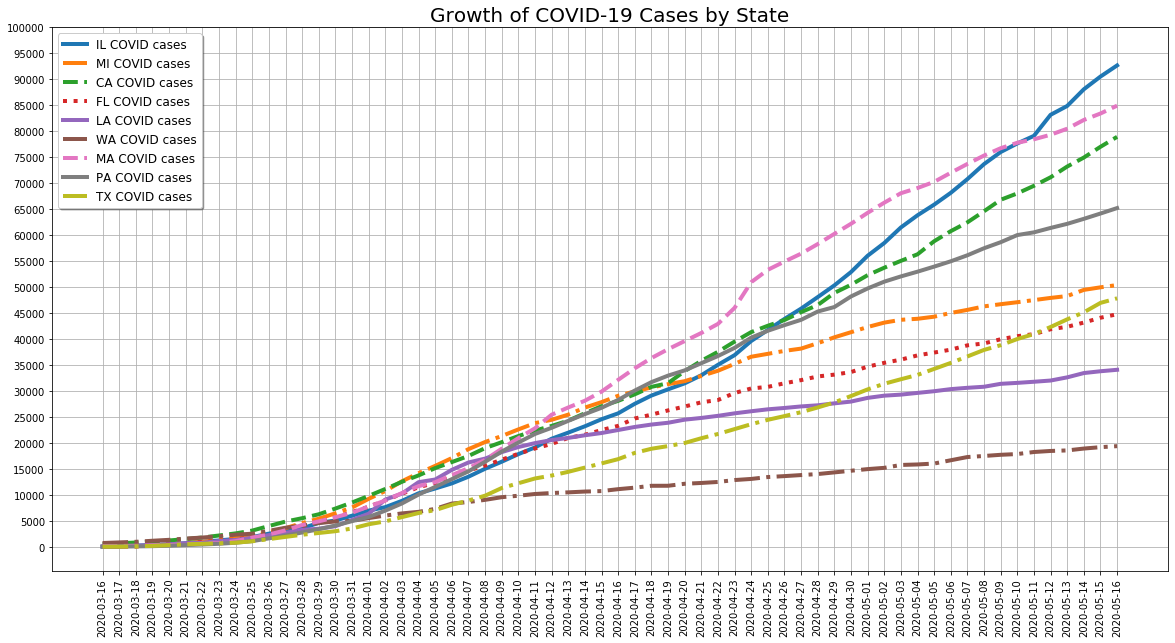

In [99]:
plt.figure(figsize=[20,10])
plt.grid()
plt.title('Growth of COVID-19 Cases by State', fontsize = '20')

plt.plot(covid_st_IL_summ.index, covid_st_IL_summ.cases, linewidth = 4, linestyle = '-')
plt.plot(covid_st_MI_summ.index, covid_st_MI_summ.cases, linewidth = 4, linestyle = '-.')
plt.plot(covid_st_CA_summ.index, covid_st_CA_summ.cases, linewidth = 4, linestyle = '--')
plt.plot(covid_st_FL_summ.index, covid_st_FL_summ.cases, linewidth = 4, linestyle = ':')
plt.plot(covid_st_LA_summ.index, covid_st_LA_summ.cases, linewidth = 4, linestyle = '-')
plt.plot(covid_st_WA_summ.index, covid_st_WA_summ.cases, linewidth = 4, linestyle = '-.')
plt.plot(covid_st_MA_summ.index, covid_st_MA_summ.cases, linewidth = 4, linestyle = '--')
plt.plot(covid_st_PA_summ.index, covid_st_PA_summ.cases, linewidth = 4, linestyle = '-')
plt.plot(covid_st_TX_summ.index, covid_st_TX_summ.cases, linewidth = 4, linestyle = '-.')

y_ticks = np.linspace(0,100000,21)
plt.xticks(covid_st_IL_summ.index, fontsize = '10', rotation = 90)
plt.legend(['IL COVID cases','MI COVID cases','CA COVID cases', 'FL COVID cases', 'LA COVID cases', 
            'WA COVID cases', 'MA COVID cases', 'PA COVID cases', 'TX COVID cases'], shadow = True, loc = 2, fontsize = '12')
plt.yticks(y_ticks);

In [100]:
covid_SD = covid_data[covid_data['state'] == 'South Dakota']
covid_SD_summ = covid_SD.groupby('date')['cases', 'deaths'].sum()

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


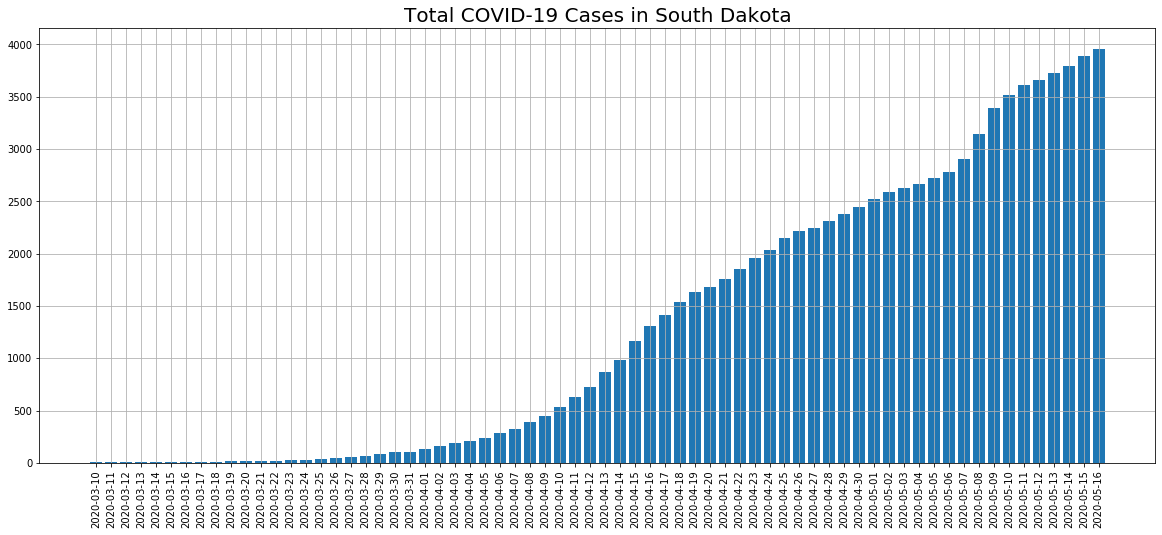

In [88]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total COVID-19 Cases in South Dakota', fontsize = '20')
plt.bar(covid_SD_summ.index, covid_SD_summ.cases)

# y_ticks = np.linspace(0,2800,15)
plt.xticks(covid_SD_summ.index, fontsize = '10', rotation = 90);
# plt.yticks(y_ticks);

In [89]:
covid_SD[covid_SD['date'] == covid_SD.date.max()].sort_values(by='cases', ascending=False)

date                county         state     FIPS  cases  deaths  \
116258 2020-05-16      Minnehaha County  South Dakota  46099.0   3119      39   
115910 2020-05-16        Lincoln County  South Dakota  46083.0    201       0   
114968 2020-05-16          Brown County  South Dakota  46013.0    194       0   
116725 2020-05-16          Union County  South Dakota  46127.0     60       0   
116383 2020-05-16     Pennington County  South Dakota  46103.0     49       0   
116813 2020-05-16        Yankton County  South Dakota  46135.0     40       0   
114791 2020-05-16         Beadle County  South Dakota  46005.0     30       2   
116432 2020-05-16        Roberts County  South Dakota  46109.0     19       0   
116674 2020-05-16         Turner County  South Dakota  46125.0     19       0   
116289 2020-05-16          Moody County  South Dakota  46101.0     17       0   
115639 2020-05-16         Hughes County  South Dakota  46065.0     16       0   
115208 2020-05-16      Codington County  South Dakota  46029.0     16       0   
116622 2020-05-16           Todd County  South Dakota  46121.0     16       0   
115153 2020-05-16           Clay County  South Dakota  46027.0     14       0   
114912 2020-05-16      Brookings County  South Dakota  46011.0     14       0   
115332 2020-05-16            Day County  South Dakota  46037.0     10       0   
115857 2020-05-16       Lawrence County  South Dakota  46081.0      9       0   
116536 2020-05-16        Stanley County  South Dakota  46117.0      9       0   
115513 2020-05-16          Grant County  South Dakota  46051.0      9       0   
116328 2020-05-16  Oglala Lakota County  South Dakota  46102.0      9       0   
115314 2020-05-16        Davison County  South Dakota  46035.0      9       1   
115055 2020-05-16    Charles Mix County  South Dakota  46023.0      8       0   
115761 2020-05-16        Jerauld County  South Dakota  46073.0      6       1   
116763 2020-05-16       Walworth County  South Dakota  46129.0      5       0   
116468 2020-05-16        Sanborn County  South Dakota  46111.0      5       0   
116078 2020-05-16         McCook County  South Dakota  46087.0      5       1   
116153 2020-05-16          Meade County  South Dakota  46093.0      5       0   
115806 2020-05-16           Lake County  South Dakota  46079.0      5       0   
116513 2020-05-16          Spink County  South Dakota  46115.0      4       0   
115965 2020-05-16          Lyman County  South Dakota  46085.0      4       0   
115104 2020-05-16          Clark County  South Dakota  46025.0      4       0   
114858 2020-05-16      Bon Homme County  South Dakota  46009.0      4       0   
115689 2020-05-16     Hutchinson County  South Dakota  46067.0      3       0   
115246 2020-05-16         Corson County  South Dakota  46031.0      3       0   
116625 2020-05-16          Tripp County  South Dakota  46123.0      2       0   
114723 2020-05-16         Aurora County  South Dakota  46003.0      2       0   
115563 2020-05-16         Hamlin County  South Dakota  46057.0      2       0   
115451 2020-05-16     Fall River County  South Dakota  46047.0      2       0   
116190 2020-05-16          Miner County  South Dakota  46097.0      1       0   
116100 2020-05-16      McPherson County  South Dakota  46089.0      1       0   
116013 2020-05-16       Marshall County  South Dakota  46091.0      1       0   
115723 2020-05-16           Hyde County  South Dakota  46069.0      1       0   
115584 2020-05-16           Hand County  South Dakota  46059.0      1       0   
116571 2020-05-16          Sully County  South Dakota  46119.0      1       0   
115502 2020-05-16          Faulk County  South Dakota  46049.0      1       0   
115402 2020-05-16        Douglas County  South Dakota  46043.0      1       0   
115382 2020-05-16          Deuel County  South Dakota  46039.0      1       0   
114987 2020-05-16        Buffalo County  South Dakota  46017.0      1       0   
116824 2020-05-16        Ziebach County  Sou

In [90]:
covid_SD_Minnehaha = covid_SD[covid_SD.county == 'Minnehaha County'][['date', 'cases', 'deaths']]
covid_SD_Minnehaha.set_index('date', inplace=True)
covid_SD_Minnehaha.head()

cases  deaths
date                     
2020-03-10      1       0
2020-03-11      3       0
2020-03-12      3       0
2020-03-13      3       0
2020-03-14      3       0

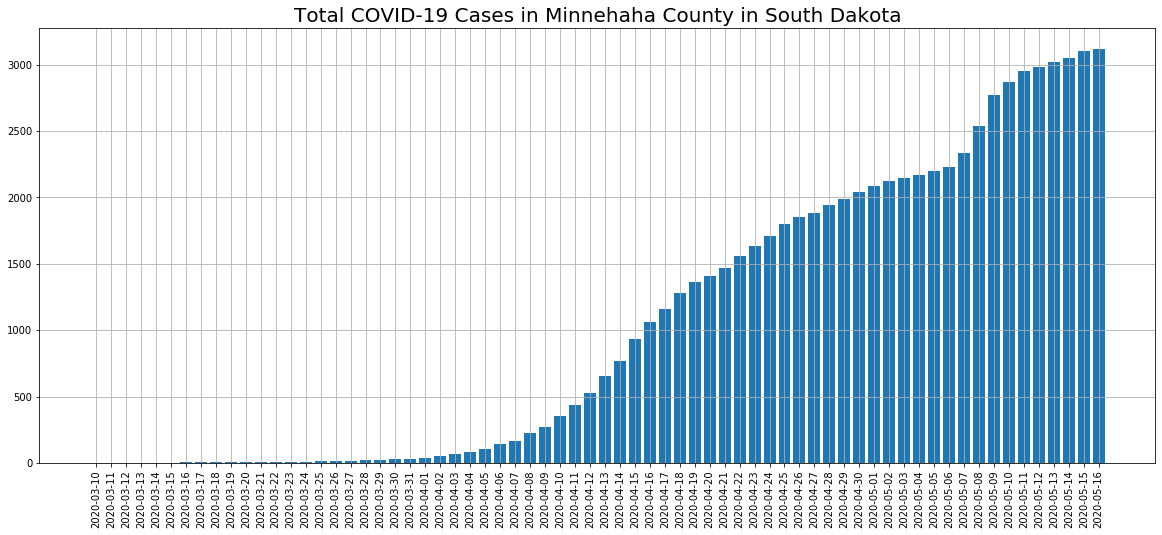

In [91]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total COVID-19 Cases in Minnehaha County in South Dakota', fontsize = '20')
plt.bar(covid_SD_Minnehaha.index, covid_SD_Minnehaha.cases)

# y_ticks = np.linspace(0,1200,7)
plt.xticks(covid_SD_Minnehaha.index, fontsize = '10', rotation = 90);
# plt.yticks(y_ticks);

In [92]:
covid_SD_Minnehaha_daily = covid_SD_Minnehaha.diff()
covid_SD_Minnehaha_daily.columns = ['newcases_daily', 'newdeaths_daily']

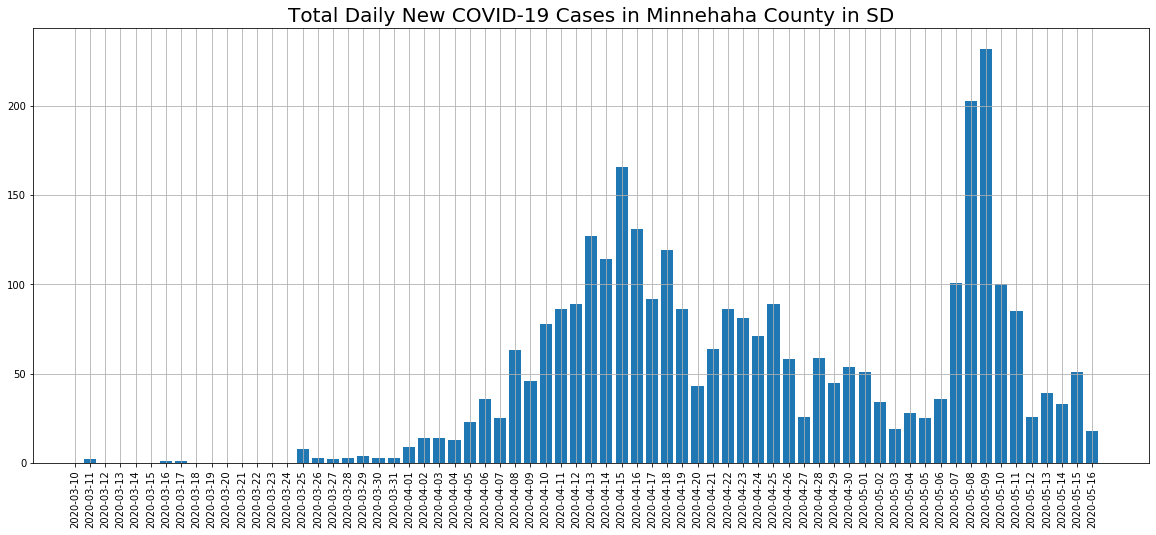

In [93]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total Daily New COVID-19 Cases in Minnehaha County in SD', fontsize = '20')
plt.bar(covid_SD_Minnehaha_daily.index, covid_SD_Minnehaha_daily.newcases_daily)

# y_ticks = np.linspace(0,180,10)
plt.xticks(covid_SD_Minnehaha_daily.index, fontsize = '10', rotation = 90);
# plt.yticks(y_ticks);

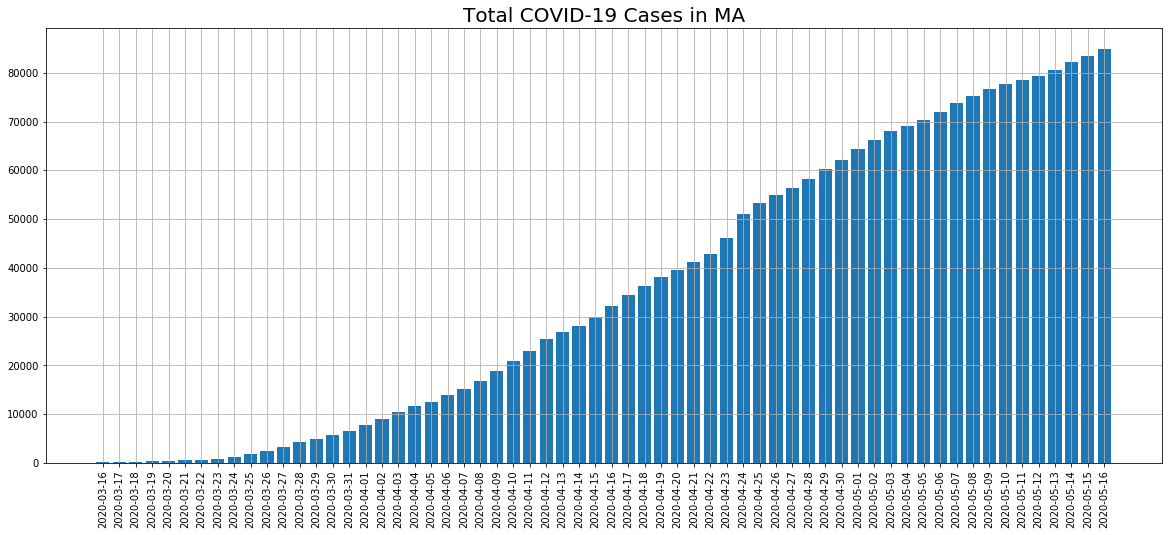

In [94]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total COVID-19 Cases in MA', fontsize = '20')
plt.bar(covid_st_MA_summ.index, covid_st_MA_summ.cases)

# y_ticks = np.linspace(0,55000,12)
plt.xticks(covid_st_MA_summ.index, fontsize = '10', rotation = 90);
# plt.yticks(y_ticks);

In [95]:
covid_MA_daily = covid_st_MA_summ.diff()
covid_MA_daily.columns = ['newcases_daily', 'newdeaths_daily']

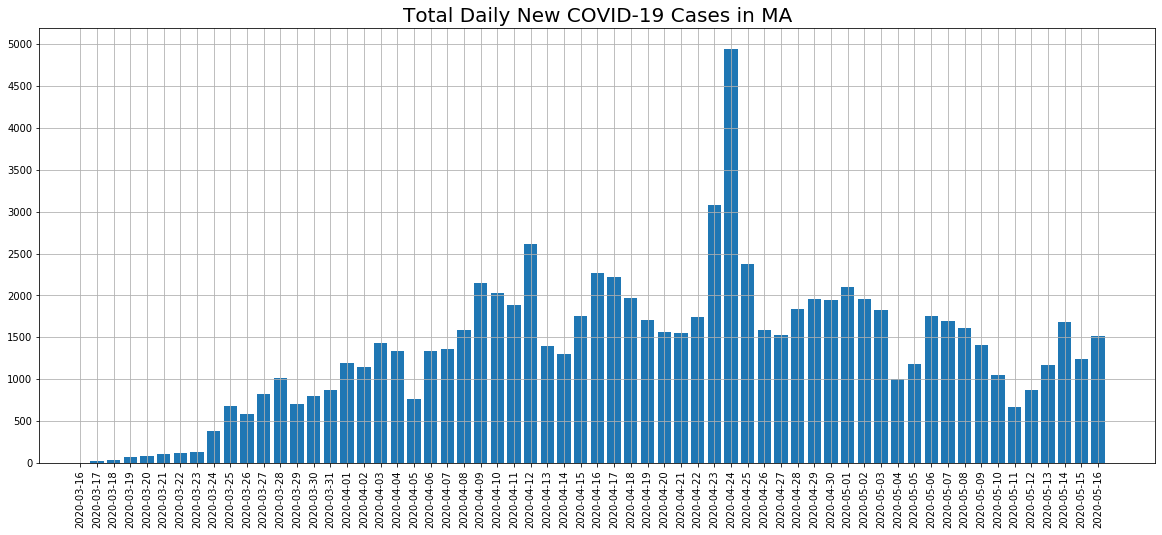

In [96]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total Daily New COVID-19 Cases in MA', fontsize = '20')
plt.bar(covid_MA_daily.index, covid_MA_daily.newcases_daily)

y_ticks = np.linspace(0,5000,11)
plt.xticks(covid_MA_daily.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [97]:
covid_MA_pct = covid_st_MA_summ.pct_change()
covid_MA_pct.columns = ['cases_dailypctchange', 'deaths_dailypctchange']

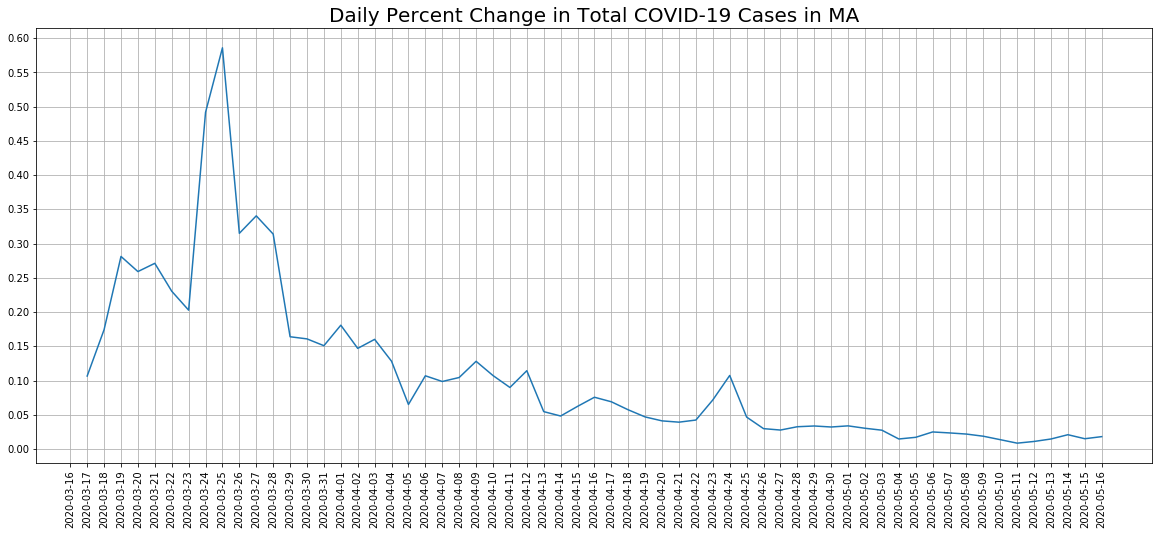

In [98]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily Percent Change in Total COVID-19 Cases in MA', fontsize = '20')
plt.plot(covid_MA_pct.index, covid_MA_pct.cases_dailypctchange)

y_ticks = np.linspace(0,0.6,13)
plt.xticks(covid_MA_pct.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [99]:
covid_data[covid_data['date'] == covid_data.date.max()][covid_data['state'] == 
                                                        'Massachusetts'].sort_values(by = 'cases', ascending=False)

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


date             county          state     FIPS  cases  deaths  \
61105 2020-05-16   Middlesex County  Massachusetts  25017.0  18883    1370   
61407 2020-05-16     Suffolk County  Massachusetts  25025.0  16346     778   
60850 2020-05-16       Essex County  Massachusetts  25009.0  12314     766   
61539 2020-05-16   Worcester County  Massachusetts  25027.0   9067     554   
61238 2020-05-16     Norfolk County  Massachusetts  25021.0   7412     719   
61301 2020-05-16    Plymouth County  Massachusetts  25023.0   6987     455   
60729 2020-05-16     Bristol County  Massachusetts  25005.0   5748     313   
60973 2020-05-16     Hampden County  Massachusetts  25013.0   5133     506   
60594 2020-05-16  Barnstable County  Massachusetts  25001.0   1147      90   
61032 2020-05-16   Hampshire County  Massachusetts  25015.0    751      69   
60665 2020-05-16   Berkshire County  Massachusetts  25003.0    495      37   
61469 2020-05-16     Unknown County  Massachusetts    100.0    309       3   
60910 2020-05-16    Franklin County  Massachusetts  25011.0    304      44   
60782 2020-05-16       Dukes County  Massachusetts  25007.0     25       1   
61162 2020-05-16   Nantucket County  Massachusetts  25019.0     12       0   

       MedianHHInc_2018                     State_County  2019EstPop  \
61105          100374.0   Massachusetts_Middlesex County   1611699.0   
61407           68743.0     Massachusetts_Suffolk County    803907.0   
60850           76373.0       Massachusetts_Essex County    789034.0   
61539           71767.0   Massachusetts_Worcester County    830622.0   
61238          100184.0     Massachusetts_Norfolk County    706775.0   
61301           89678.0    Massachusetts_Plymouth County    521202.0   
60729           66005.0     Massachusetts_Bristol County    565217.0   
60973           52682.0     Massachusetts_Hampden County    466372.0   
60594           69001.0  Massachusetts_Barnstable County    212990.0   
61032           74456.0   Massachusetts_Hampshire County    160830.0   
60665           58375.0   Massachusetts_Berkshire County    124944.0   
61469               NaN     Massachusetts_Unknown County         NaN   
60910           58992.0    Massachusetts_Franklin County     70180.0   
60782           70224.0       Massachusetts_Dukes County     17332.0   
61162           97525.0   Massachusetts_Nantucket County     11399.0   

       CasesPer100000  DeathsPer100000  
61105     1171.620755        85.003465  
61407     2033.319775        96.777364  
60850     1560.642507        97.080734  
61539     1091.591602        66.697005  
61238     1048.707156       101.729688  
61301     1340.555101        87.298207  
60729     1016.954550        55.376961  
60973     1100.623537       108.497080  
60594      538.522935        42.255505  
61032      466.952683        42.902444  
60665      396.177488        29.613267  
61469             NaN              NaN  
60910      433.171844        62.695925  
60782      144.241865         5.769675  
61162      105.272392         0.000000

In [100]:
covid_st_LA_summ_daily = covid_st_LA_summ.diff()
covid_st_LA_summ_daily.columns = ['newcases_daily', 'newdeaths_daily']

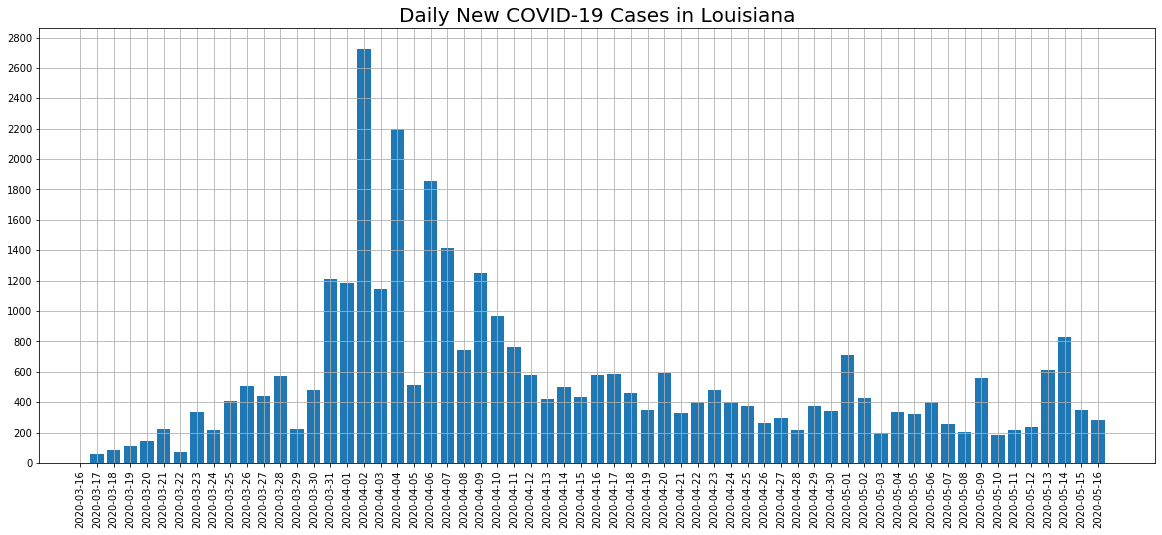

In [101]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily New COVID-19 Cases in Louisiana', fontsize = '20')
plt.bar(covid_st_LA_summ_daily.index, covid_st_LA_summ_daily.newcases_daily)

y_ticks = np.linspace(0,2800,15)
plt.xticks(covid_st_LA_summ_daily.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [102]:
# large spike in cases on 3/13/2020 so look after that date
covid_st_LA_summ_pct = covid_st_LA_summ[covid_st_LA_summ.index > '2020-03-14'].pct_change()
covid_st_LA_summ_pct.columns = ['cases_dailypctchange', 'deaths_dailypctchange']

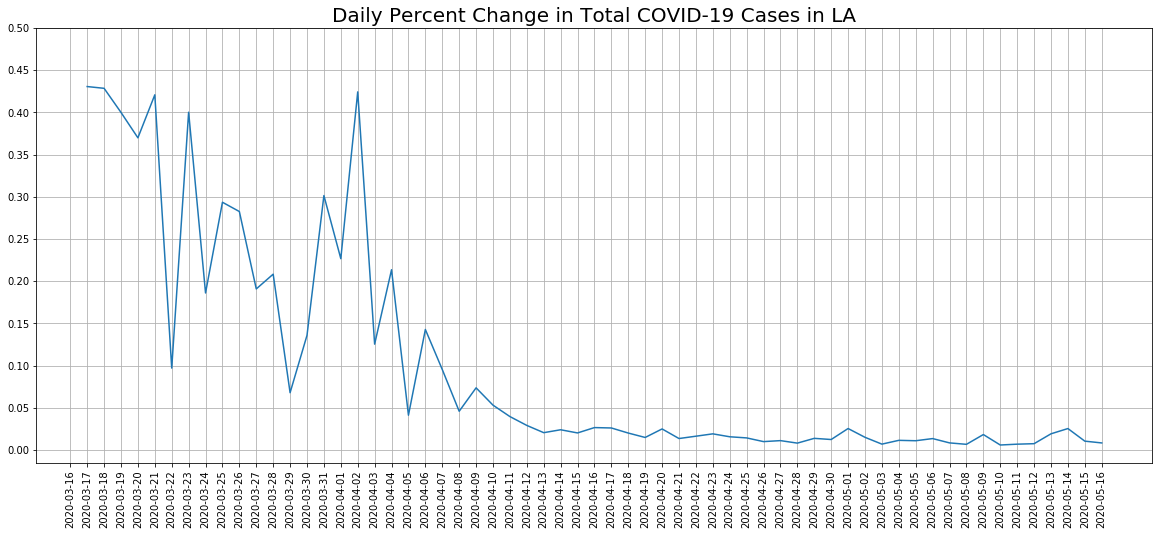

In [103]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily Percent Change in Total COVID-19 Cases in LA', fontsize = '20')
plt.plot(covid_st_LA_summ_pct.index, covid_st_LA_summ_pct.cases_dailypctchange)

y_ticks = np.linspace(0,0.50,11)
plt.xticks(covid_st_LA_summ_pct.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [104]:
covid_st_WA_summ_pct = covid_st_WA_summ.pct_change()
covid_st_WA_summ_pct.columns = ['cases_dailypctchange', 'deaths_dailypctchange']

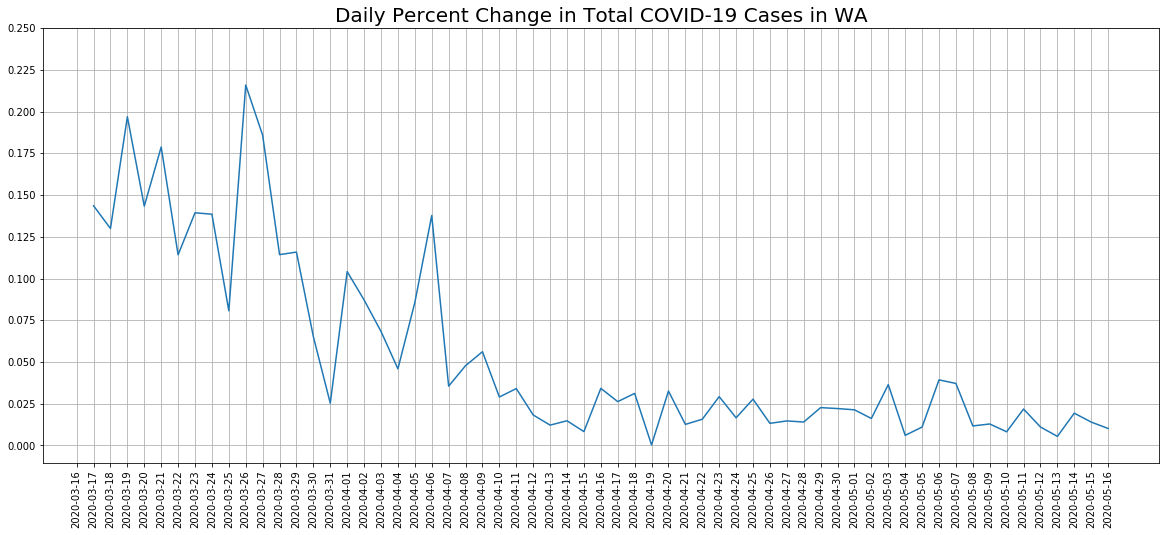

In [105]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily Percent Change in Total COVID-19 Cases in WA', fontsize = '20')
plt.plot(covid_st_WA_summ_pct.index, covid_st_WA_summ_pct.cases_dailypctchange)

y_ticks = np.linspace(0,0.25,11)
plt.xticks(covid_st_WA_summ_pct.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [106]:
covid_st_FL_summ_pct = covid_st_FL_summ.pct_change()
covid_st_FL_summ_pct.columns = ['cases_dailypctchange', 'deaths_dailypctchange']

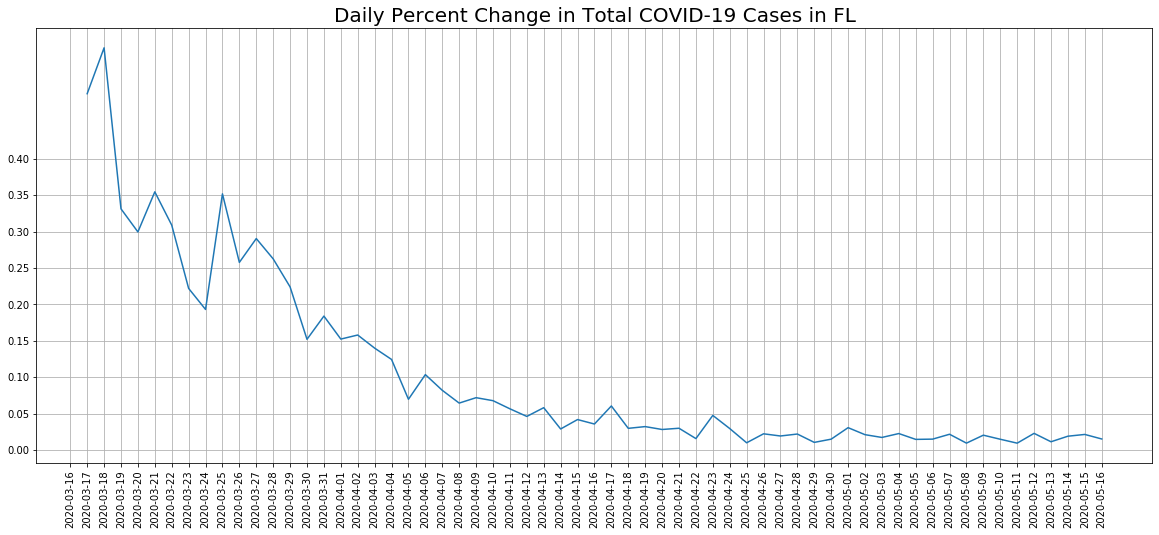

In [107]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily Percent Change in Total COVID-19 Cases in FL', fontsize = '20')
plt.plot(covid_st_FL_summ_pct.index, covid_st_FL_summ_pct.cases_dailypctchange)

y_ticks = np.linspace(0,0.4,9)
plt.xticks(covid_st_FL_summ_pct.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [108]:
covid_st_CA[covid_st_CA['date'] == covid_st_CA.date.max()].sort_values(by='cases', ascending=False).head(15)

date                 county       state    FIPS  cases  deaths  \
10135 2020-05-16     Los Angeles County  California  6037.0  37303    1793   
11296 2020-05-16       San Diego County  California  6073.0   5725     235   
10985 2020-05-16       Riverside County  California  6065.0   5618     255   
10791 2020-05-16          Orange County  California  6059.0   4281      86   
11199 2020-05-16  San Bernardino County  California  6071.0   3463     155   
11779 2020-05-16     Santa Clara County  California  6085.0   2418     137   
9106  2020-05-16         Alameda County  California  6001.0   2372      85   
11401 2020-05-16   San Francisco County  California  6075.0   2065      36   
11609 2020-05-16       San Mateo County  California  6081.0   1612      67   
9931  2020-05-16            Kern County  California  6029.0   1483      25   
12377 2020-05-16          Tulare County  California  6107.0   1426      67   
11672 2020-05-16   Santa Barbara County  California  6083.0   1412      11   
11071 2020-05-16      Sacramento County  California  6067.0   1221      55   
9622  2020-05-16          Fresno County  California  6019.0   1192      16   
9449  2020-05-16    Contra Costa County  California  6013.0   1121      33   

       MedianHHInc_2018                      State_County  2019EstPop  \
10135           67986.0     California_Los Angeles County  10039107.0   
11296           78777.0       California_San Diego County   3338330.0   
10985           66793.0       California_Riverside County   2470546.0   
10791           89373.0          California_Orange County   3175692.0   
11199           63310.0  California_San Bernardino County   2180085.0   
11779          125933.0     California_Santa Clara County   1927852.0   
9106           101744.0         California_Alameda County   1671329.0   
11401          110601.0   California_San Francisco County    881549.0   
11609          122930.0       California_San Mateo County    766573.0   
9931            51586.0            California_Kern County    900202.0   
12377           48763.0          California_Tulare County    466195.0   
11672           75646.0   California_Santa Barbara County    446499.0   
11071           69475.0      California_Sacramento County   1552058.0   
9622            52318.0          California_Fresno County    999101.0   
9449           101463.0    California_Contra Costa County   1153526.0   

       CasesPer100000  DeathsPer100000  
10135      371.576874        17.860154  
11296      171.492932         7.039448  
10985      227.399126        10.321605  
10791      134.805264         2.708071  
11199      158.847017         7.109815  
11779      125.424566         7.106355  
9106       141.922985         5.085773  
11401      234.246763         4.083721  
11609      210.286561         8.740198  
9931       164.740803         2.777154  
12377      305.880586        14.371669  
11672      316.238110         2.463611  
11071       78.669740         3.543682  
9622       119.307257         1.601440  
9449        97.180298         2.860794

In [109]:
covid_st_CA_SF_summ = covid_st_CA[covid_st_CA['county'] == 'San Francisco County'].groupby('date')['cases','deaths'].sum()

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


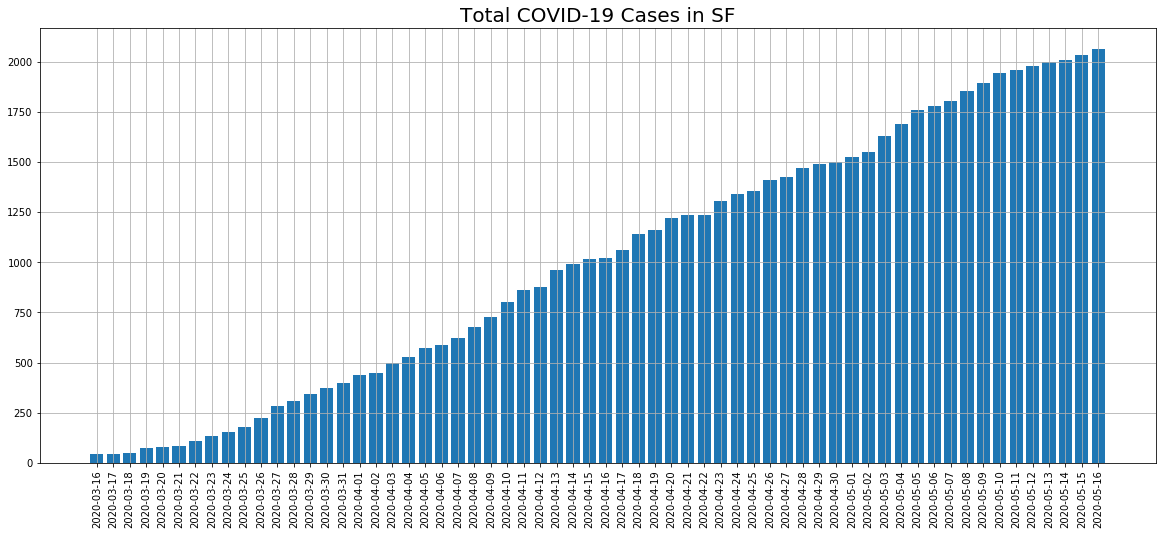

In [110]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total COVID-19 Cases in SF', fontsize = '20')
plt.bar(covid_st_CA_SF_summ.index, covid_st_CA_SF_summ.cases)

# y_ticks = np.linspace(0,1400,15)
plt.xticks(covid_st_CA_SF_summ.index, fontsize = '10', rotation = 90);
# plt.yticks(y_ticks);

In [111]:
covid_CA_SF_pct = covid_st_CA_SF_summ.pct_change()
covid_CA_SF_pct.columns = ['cases_dailypctchange', 'deaths_dailypctchange']

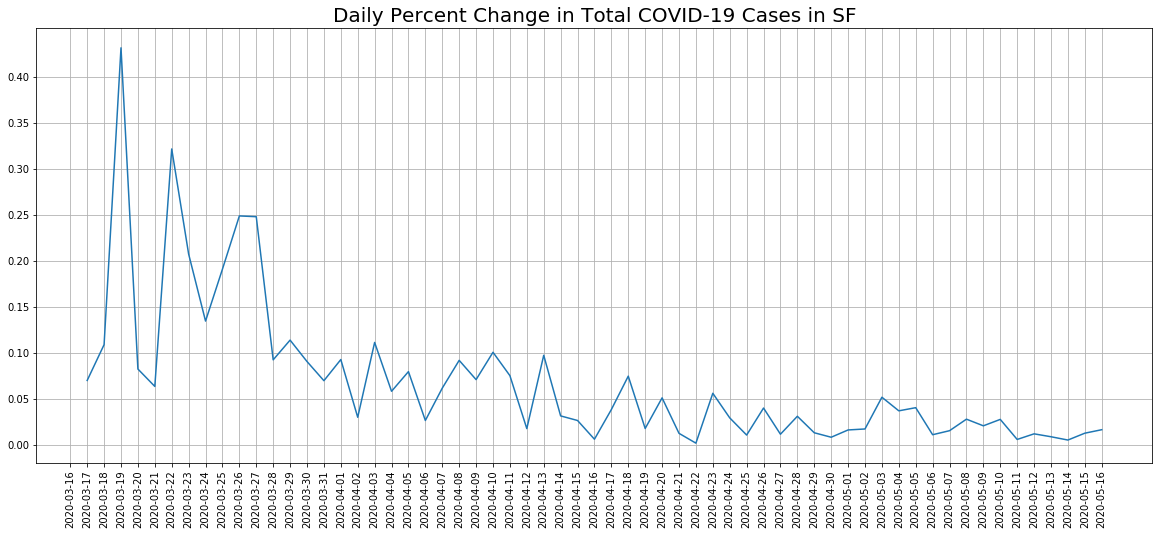

In [112]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily Percent Change in Total COVID-19 Cases in SF', fontsize = '20')
plt.plot(covid_CA_SF_pct.index, covid_CA_SF_pct.cases_dailypctchange)

y_ticks = np.linspace(0,0.40,9)
plt.xticks(covid_CA_SF_pct.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [113]:
covid_st_CA_summ_pct = covid_st_CA_summ.pct_change()
covid_st_CA_summ_pct.columns = ['cases_dailypctchange', 'deaths_dailypctchange']

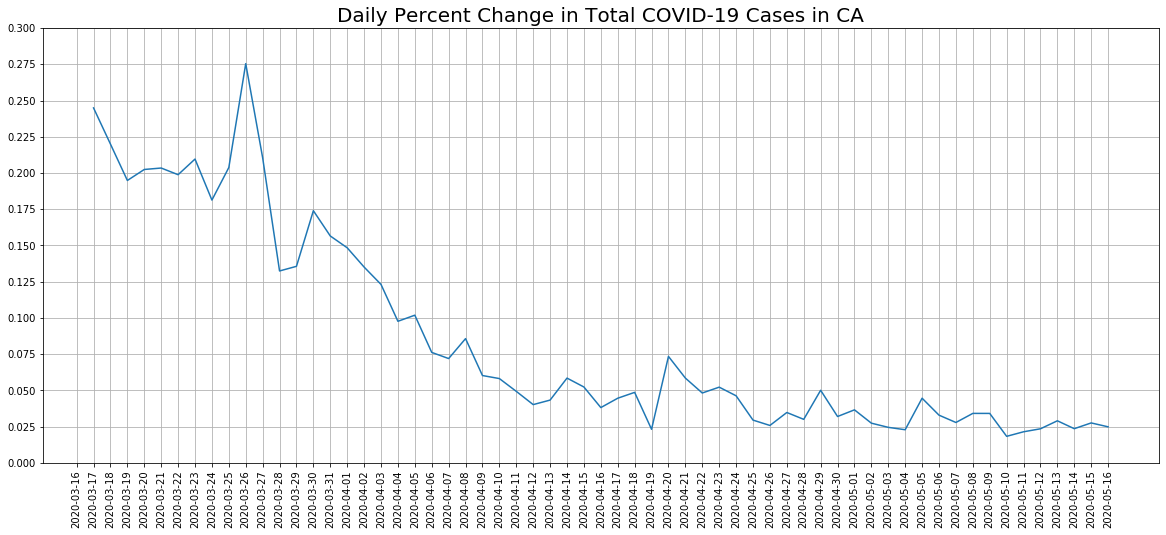

In [114]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily Percent Change in Total COVID-19 Cases in CA', fontsize = '20')
plt.plot(covid_st_CA_summ_pct.index, covid_st_CA_summ_pct.cases_dailypctchange)

y_ticks = np.linspace(0,0.30,13)
plt.xticks(covid_st_CA_summ_pct.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [115]:
covid_data_CA_LA = covid_data[covid_data['State_County'] == 
                              'California_Los Angeles County'][covid_data['date'] 
                                                               > '2020-03-10'][['date','cases','deaths']]

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [116]:
covid_data_CA_LA.set_index('date', inplace=True)

In [117]:
covid_data_CA_LA_daily = covid_data_CA_LA.diff()
covid_data_CA_LA_daily.columns = ['newcases_daily', 'newdeaths_daily']

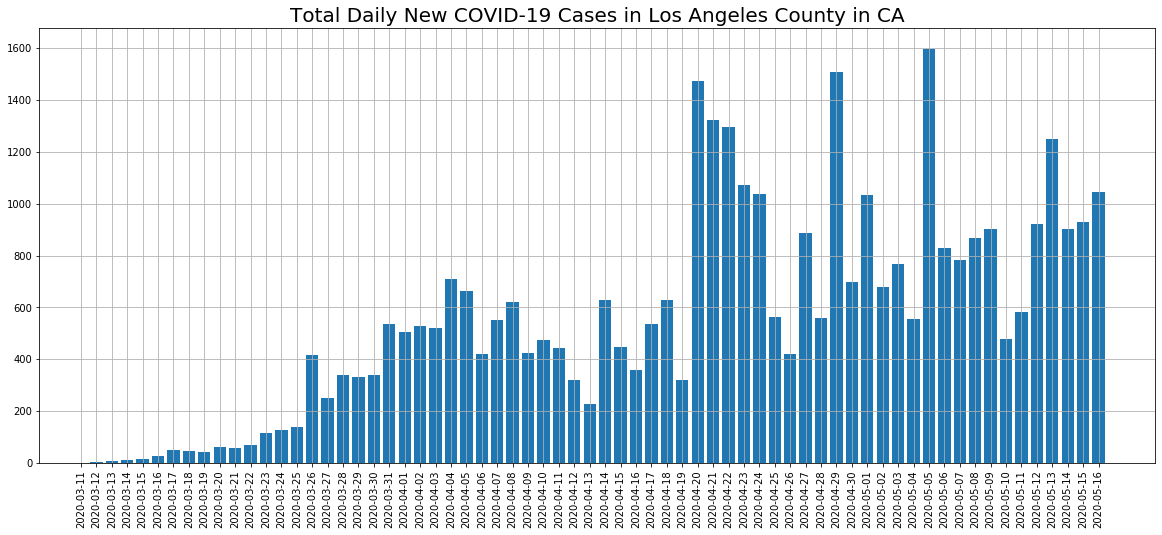

In [118]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total Daily New COVID-19 Cases in Los Angeles County in CA', fontsize = '20')
plt.bar(covid_data_CA_LA_daily.index, covid_data_CA_LA_daily.newcases_daily)

plt.xticks(covid_data_CA_LA_daily.index, fontsize = '10', rotation = 90);

In [119]:
covid_data_CA_LA_pct = covid_data_CA_LA.pct_change()
covid_data_CA_LA_pct.columns = ['cases_dailypctchange', 'deaths_dailypctchange']

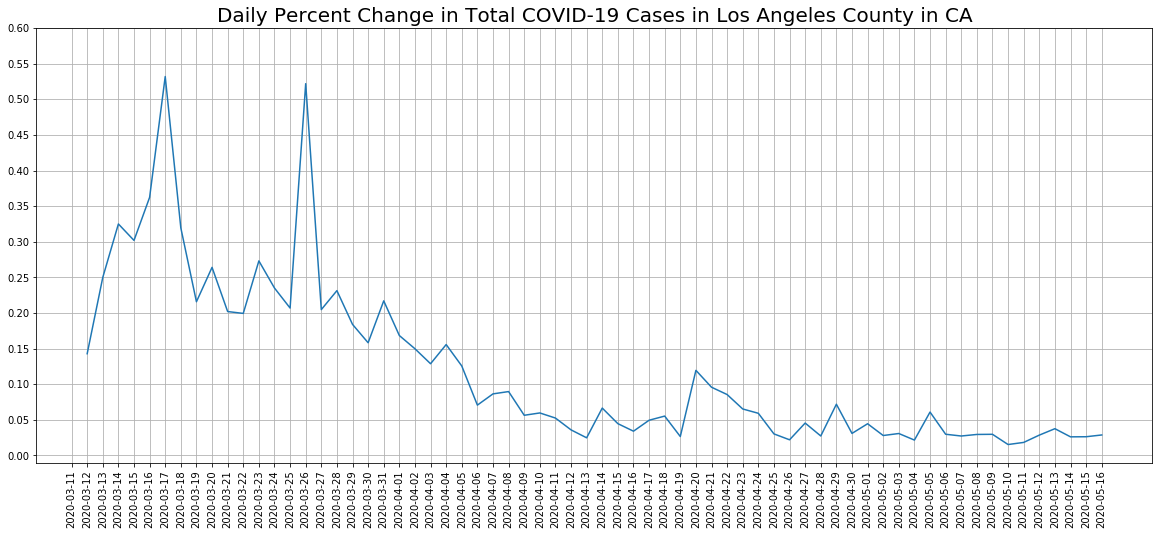

In [120]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily Percent Change in Total COVID-19 Cases in Los Angeles County in CA', fontsize = '20')
plt.plot(covid_data_CA_LA_pct.index, covid_data_CA_LA_pct.cases_dailypctchange)

y_ticks = np.linspace(0,0.60,13)
plt.xticks(covid_data_CA_LA_pct.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [121]:
covid_data_NY_Nassau = covid_data[covid_data['State_County'] 
                                  == 'New York_Nassau County'][covid_data['date'] 
                                                               > '2020-03-10'][['date', 'cases', 'deaths']]
covid_data_NY_Nassau.set_index('date', inplace=True)
covid_data_NY_Nassau.tail(10)

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


cases  deaths
date                     
2020-05-07  37593    2340
2020-05-08  37812    2362
2020-05-09  38028    2388
2020-05-10  38217    2413
2020-05-11  38337    2425
2020-05-12  38434    2453
2020-05-13  38587    2468
2020-05-14  38743    2485
2020-05-15  38864    2499
2020-05-16  39033    2507

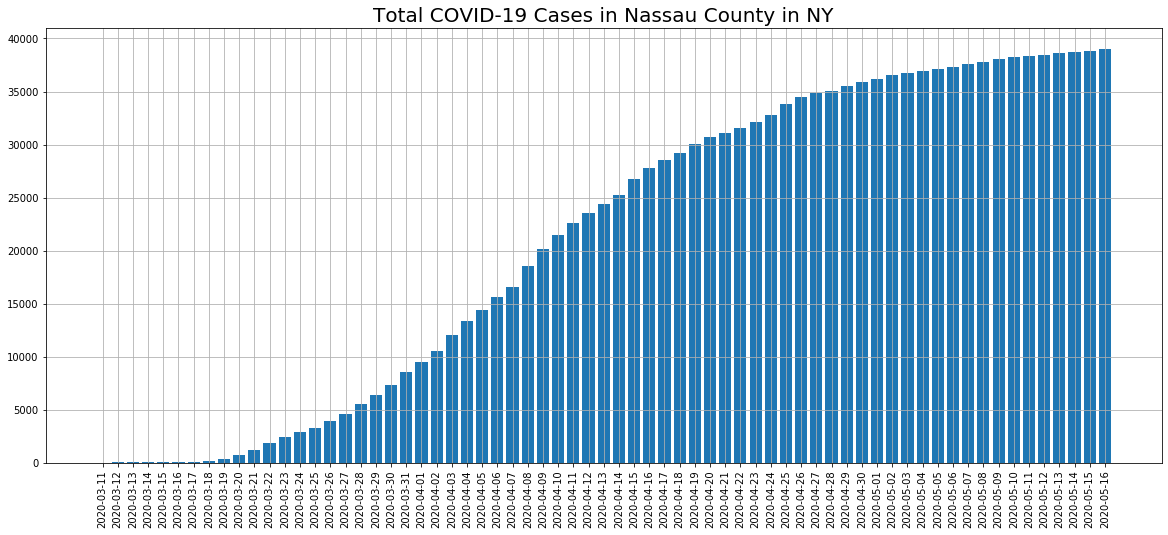

In [122]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total COVID-19 Cases in Nassau County in NY', fontsize = '20')
plt.bar(covid_data_NY_Nassau.index, covid_data_NY_Nassau.cases)

y_ticks = np.linspace(0,40000,9)
plt.xticks(covid_data_NY_Nassau.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

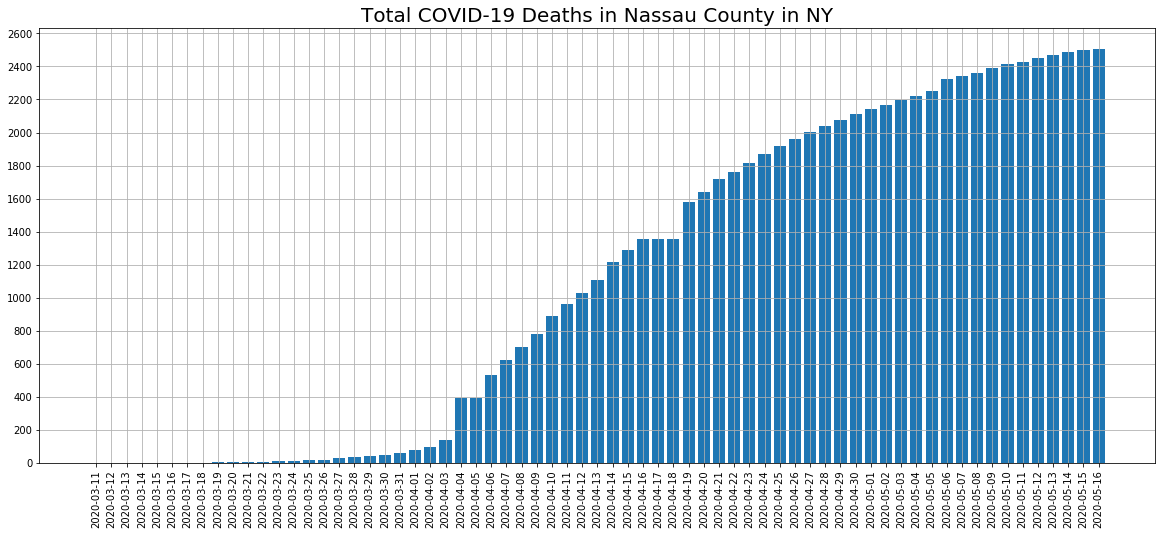

In [123]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total COVID-19 Deaths in Nassau County in NY', fontsize = '20')
plt.bar(covid_data_NY_Nassau.index, covid_data_NY_Nassau.deaths)

y_ticks = np.linspace(0,2600,14)
plt.xticks(covid_data_NY_Nassau.index, fontsize = '10', rotation = 90);
plt.yticks(y_ticks);

In [124]:
covid_data_NY_Nassau_daily = covid_data_NY_Nassau.diff()
covid_data_NY_Nassau_daily.columns = ['newcases_daily', 'newdeaths_daily']

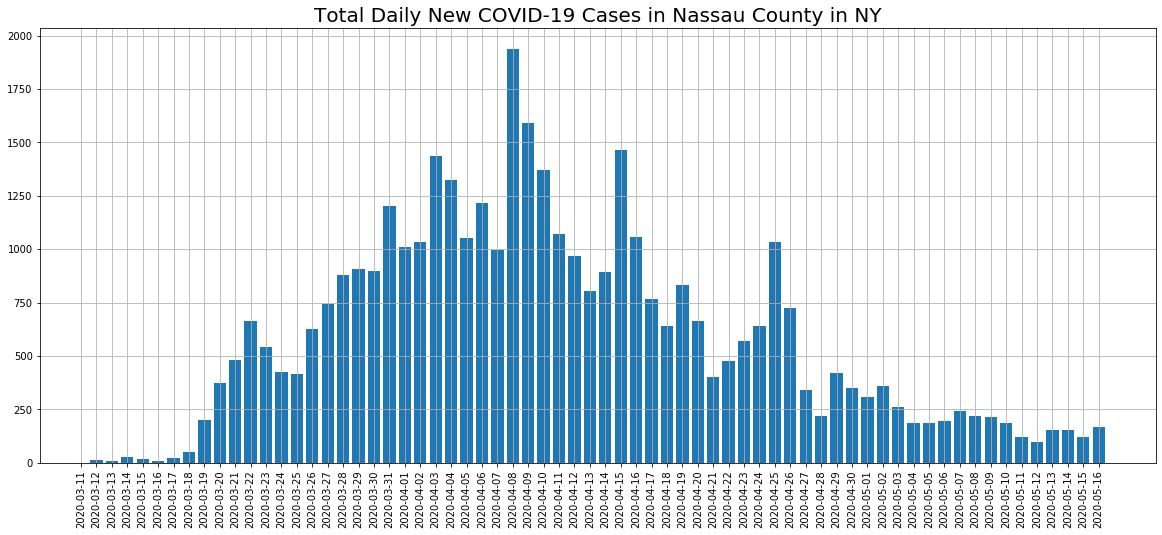

In [125]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total Daily New COVID-19 Cases in Nassau County in NY', fontsize = '20')
plt.bar(covid_data_NY_Nassau_daily.index, covid_data_NY_Nassau_daily.newcases_daily)

plt.xticks(covid_data_NY_Nassau_daily.index, fontsize = '10', rotation = 90);

In [126]:
# may comment out line below or execute it (date filter)
covid_data_NY_Nassau = covid_data_NY_Nassau[covid_data_NY_Nassau.index >= '2020-04-16']

In [127]:
covid_data_NY_Nassau_pct = covid_data_NY_Nassau.pct_change()
covid_data_NY_Nassau_pct.columns = ['cases_dailypctchange', 'deaths_dailypctchange']

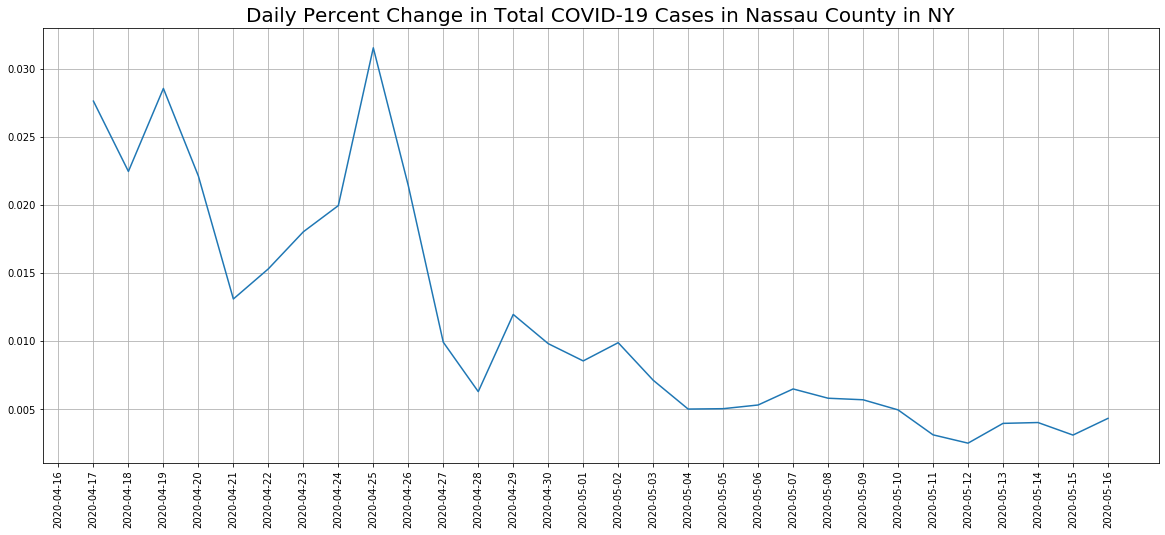

In [128]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily Percent Change in Total COVID-19 Cases in Nassau County in NY', fontsize = '20')
plt.plot(covid_data_NY_Nassau_pct.index, covid_data_NY_Nassau_pct.cases_dailypctchange)

# y_ticks = np.linspace(0,1.2,13)
plt.xticks(covid_data_NY_Nassau_pct.index, fontsize = '10', rotation = 90);
# plt.yticks(y_ticks);

## Latest COVID-19 Data Compare VS 2 Weeks Ago

In [129]:
covid_data_latest = covid_data[covid_data['date'] == covid_data.date.max()]

In [130]:
covid_data_top20_pop = covid_data_latest.sort_values(by='2019EstPop',ascending=False).head(20)

In [131]:
top_20_pop_counties = list(covid_data_top20_pop.State_County)

In [132]:
weeks = 2
num = 7*weeks
date_2wksago = covid_data_latest.date.max() - pd.DateOffset(num)

In [133]:
covid_data_2wksago = covid_data[covid_data['date'] == date_2wksago][['date','State_County', 'cases', 'deaths']]
covid_data_2wksago.reset_index(drop=True, inplace=True)
covid_data_2wksago.head()

date            State_County  cases  deaths
0 2020-05-02  Alabama_Autauga County     45       3
1 2020-05-02  Alabama_Baldwin County    181       4
2 2020-05-02  Alabama_Barbour County     43       1
3 2020-05-02     Alabama_Bibb County     42       0
4 2020-05-02   Alabama_Blount County     40       0

In [134]:
date_2wksago_str = date_2wksago.strftime('%Y%m%d')
date_2wksago_str

'20200502'

In [135]:
covid_data_2wksago.rename(columns={'cases':'cases_' + date_2wksago_str, 'deaths':'deaths_' + date_2wksago_str},inplace=True)
covid_data_2wksago.head()

date            State_County  cases_20200502  deaths_20200502
0 2020-05-02  Alabama_Autauga County              45                3
1 2020-05-02  Alabama_Baldwin County             181                4
2 2020-05-02  Alabama_Barbour County              43                1
3 2020-05-02     Alabama_Bibb County              42                0
4 2020-05-02   Alabama_Blount County              40                0

In [136]:
today = covid_data_latest.date.max()
today = today.strftime('%Y%m%d')
today

'20200516'

In [137]:
covid_data_today = covid_data_latest[['date', 'State_County', '2019EstPop', 'cases', 'deaths']]
covid_data_today.rename(columns={'cases':'cases_' + today, 'deaths':'deaths_' + today},inplace=True)
covid_data_today.reset_index(drop=True, inplace=True)
covid_data_today.head()

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


date            State_County  2019EstPop  cases_20200516  \
0 2020-05-16  Alabama_Autauga County     55869.0             110   
1 2020-05-16  Alabama_Baldwin County    223234.0             254   
2 2020-05-16  Alabama_Barbour County     24686.0              79   
3 2020-05-16     Alabama_Bibb County     22394.0              50   
4 2020-05-16   Alabama_Blount County     57826.0              45   

   deaths_20200516  
0                4  
1                8  
2                1  
3                1  
4                0

In [138]:
covid_data_2wkcomp = pd.merge(covid_data_today, covid_data_2wksago, on = 'State_County', how = 'left')
covid_data_2wkcomp.drop(columns=['date_y'],inplace=True)
covid_data_2wkcomp.rename(columns = {'date_x':'date'},inplace=True)
covid_data_2wkcomp.replace(np.nan,0,inplace=True)

In [139]:
covid_data_2wkcomp.head()

date            State_County  2019EstPop  cases_20200516  \
0 2020-05-16  Alabama_Autauga County     55869.0             110   
1 2020-05-16  Alabama_Baldwin County    223234.0             254   
2 2020-05-16  Alabama_Barbour County     24686.0              79   
3 2020-05-16     Alabama_Bibb County     22394.0              50   
4 2020-05-16   Alabama_Blount County     57826.0              45   

   deaths_20200516  cases_20200502  deaths_20200502  
0                4            45.0              3.0  
1                8           181.0              4.0  
2                1            43.0              1.0  
3                1            42.0              0.0  
4                0            40.0              0.0

In [140]:
covid_data_2wkcomp['Change_Cases_2wks'] = covid_data_2wkcomp[covid_data_2wkcomp.columns[3]] - covid_data_2wkcomp[covid_data_2wkcomp.columns[5]]
covid_data_2wkcomp['Change_Deaths_2wks'] = covid_data_2wkcomp[covid_data_2wkcomp.columns[4]] - covid_data_2wkcomp[covid_data_2wkcomp.columns[6]]
covid_data_2wkcomp['Pct_Change_Cases_2wks'] = covid_data_2wkcomp[covid_data_2wkcomp.columns[3]] / covid_data_2wkcomp[covid_data_2wkcomp.columns[5]] - 1
covid_data_2wkcomp['Pct_Change_Deaths_2wks'] = covid_data_2wkcomp[covid_data_2wkcomp.columns[4]] / covid_data_2wkcomp[covid_data_2wkcomp.columns[6]] - 1

In [141]:
covid_data_2wkcomp.sort_values(by=list(covid_data_2wkcomp.columns)[3], ascending=False).head(10)

date                      State_County  2019EstPop  cases_20200516  \
1728 2020-05-16            New York_New York City   8336817.0          196481   
583  2020-05-16              Illinois_Cook County   5150233.0           61212   
1727 2020-05-16            New York_Nassau County   1356924.0           39033   
1747 2020-05-16           New York_Suffolk County   1476601.0           37942   
189  2020-05-16     California_Los Angeles County  10039107.0           37303   
1755 2020-05-16       New York_Westchester County    967506.0           32096   
2140 2020-05-16  Pennsylvania_Philadelphia County   1584064.0           19606   
1254 2020-05-16             Michigan_Wayne County   1749343.0           19016   
1169 2020-05-16    Massachusetts_Middlesex County   1611699.0           18883   
1656 2020-05-16          New Jersey_Hudson County    672391.0           17326   

      deaths_20200516  cases_20200502  deaths_20200502  Change_Cases_2wks  \
1728            20071        177490.0          18021.0            18991.0   
583              2814         40227.0           1743.0            20985.0   
1727             2507         36519.0           2167.0             2514.0   
1747             1783         34478.0           1277.0             3464.0   
189              1793         24894.0           1209.0            12409.0   
1755             1398         29626.0           1183.0             2470.0   
2140             1031         15527.0            705.0             4079.0   
1254             2212         17106.0           1884.0             1910.0   
1169             1370         15048.0            923.0             3835.0   
1656             1045         15401.0            834.0             1925.0   

      Change_Deaths_2wks  Pct_Change_Cases_2wks  Pct_Change_Deaths_2wks  
1728              2050.0               0.106998                0.113756  
583               1071.0               0.521665                0.614458  
1727               340.0               0.068841                0.156899  
1747               506.0               0.100470                0.396241  
189                584.0               0.498474                0.483044  
1755               215.0               0.083373                0.181741  
2140               326.0               0.262704                0.462411  
1254               328.0               0.111657                0.174098  
1169               447.0               0.254851                0.484290  
1656               211.0               0.124992                0.252998

In [142]:
covid_data_2wkcomp.replace(np.inf, np.nan, inplace=True)

In [143]:
covid_data_2wkcomp = covid_data_2wkcomp[~covid_data_2wkcomp['Pct_Change_Cases_2wks'].isnull()]

In [144]:
covid_data_2wkcomp = covid_data_2wkcomp.sort_values(by='Pct_Change_Cases_2wks', ascending=False)
covid_data_2wkcomp.reset_index(drop=True, inplace=True)

In [145]:
# covid_data_2wkcomp['Pct_Change_Cases_2wks'] = covid_data_2wkcomp['Pct_Change_Cases_2wks'].map("{:.2%}".format)
# covid_data_2wkcomp['Pct_Change_Deaths_2wks'] = covid_data_2wkcomp['Pct_Change_Deaths_2wks'].map("{:.2%}".format)

In [146]:
covid_CT_Hartford = covid_data[covid_data.State_County == 'Connecticut_Hartford County'][['date', 'cases', 'deaths']]
covid_CT_Hartford.set_index('date', inplace=True)

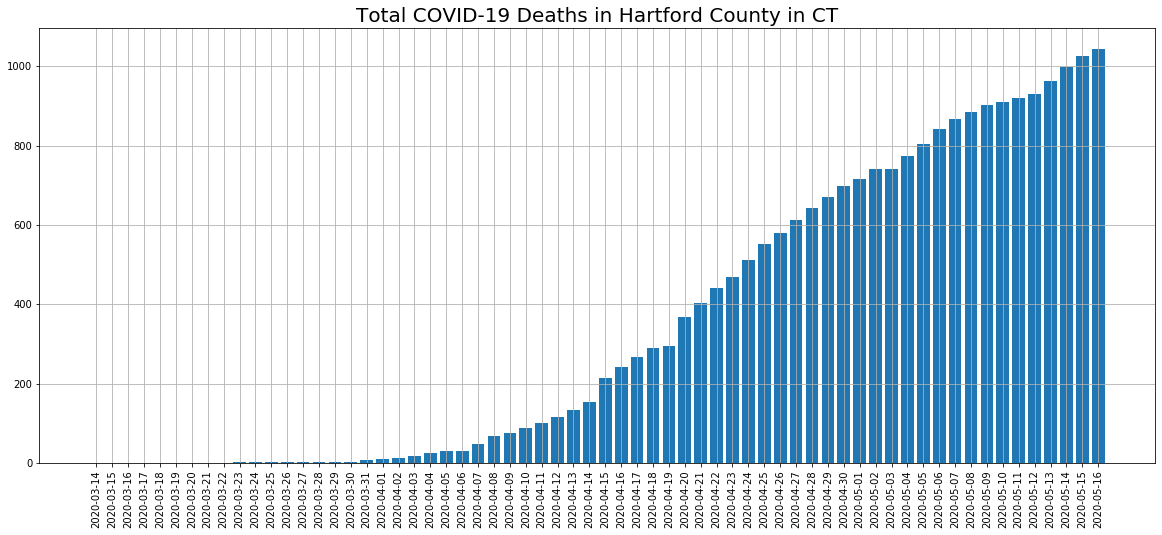

In [147]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total COVID-19 Deaths in Hartford County in CT', fontsize = '20')
plt.bar(covid_CT_Hartford.index, covid_CT_Hartford.deaths)

plt.xticks(covid_CT_Hartford.index, fontsize = '10', rotation = 90);

In [148]:
covid_CT_Hartford_daily = covid_CT_Hartford.diff()
covid_CT_Hartford_daily.columns = ['newcases_daily', 'newdeaths_daily']

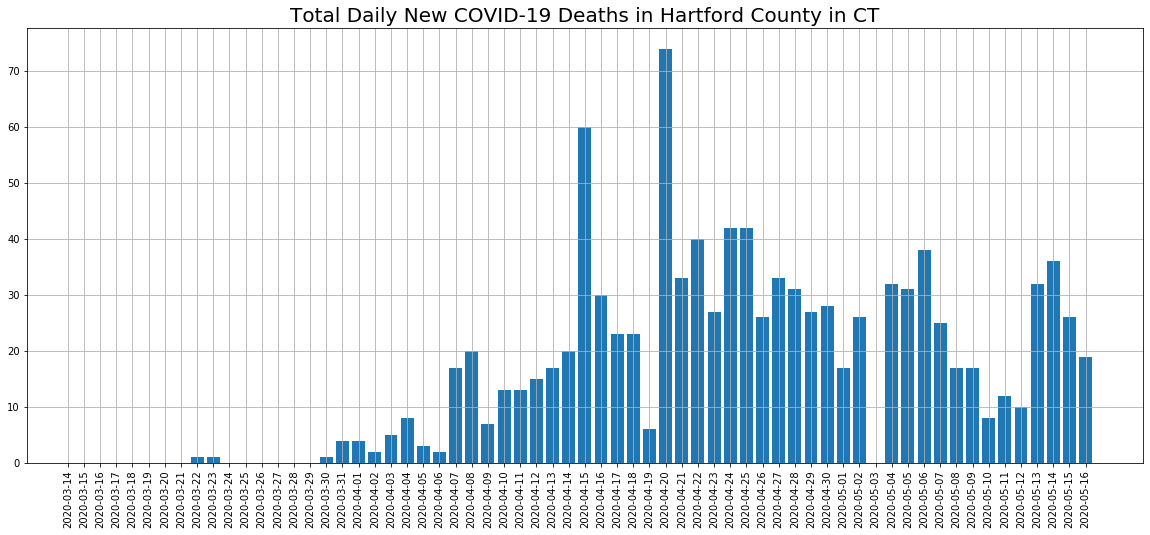

In [149]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total Daily New COVID-19 Deaths in Hartford County in CT', fontsize = '20')
plt.bar(covid_CT_Hartford_daily.index, covid_CT_Hartford_daily.newdeaths_daily)

plt.xticks(covid_CT_Hartford_daily.index, fontsize = '10', rotation = 90);

In [150]:
covid_data_2wkcomp[covid_data_2wkcomp[covid_data_2wkcomp.columns[6]] >= 
                   50].sort_values(by=
                                   covid_data_2wkcomp.columns[len(covid_data_2wkcomp.columns)-1], ascending=False)

date                           State_County  2019EstPop  \
1349 2020-05-16         Rhode Island_Providence County    638931.0   
1299 2020-05-16           New Jersey_Gloucester County    291636.0   
735  2020-05-16                   Ohio_Franklin County   1316756.0   
1578 2020-05-16                 New York_Albany County    305506.0   
1762 2020-05-16        Pennsylvania_Northampton County    305285.0   
...         ...                                    ...         ...   
1426 2020-05-16                Virginia_Henrico County    330818.0   
2319 2020-05-16  Louisiana_St. John the Baptist Parish     42837.0   
1703 2020-05-16                 Indiana_Madison County    129569.0   
2274 2020-05-16               Georgia_Dougherty County     87956.0   
1107 2020-05-16            Rhode Island_Unknown County         0.0   

      cases_20200516  deaths_20200516  cases_20200502  deaths_20200502  \
1349            9112              342          6822.0            132.0   
1299            1811              113          1334.0             50.0   
735             4420              169          2698.0             78.0   
1578            1572              127          1238.0             60.0   
1762            2659              196          2182.0             94.0   
...              ...              ...             ...              ...   
1426            1226              113           926.0            104.0   
2319             829               77           772.0             71.0   
1703             547               66           443.0             61.0   
2274            1662              134          1534.0            124.0   
1107            1645               64          1142.0            149.0   

      Change_Cases_2wks  Change_Deaths_2wks  Pct_Change_Cases_2wks  \
1349             2290.0               210.0               0.335679   
1299              477.0                63.0               0.357571   
735              1722.0                91.0               0.638251   
1578              334.0                67.0               0.269790   
1762              477.0               102.0               0.218607   
...                 ...                 ...                    ...   
1426              300.0                 9.0               0.323974   
2319               57.0                 6.0               0.073834   
1703              104.0                 5.0               0.234763   
2274              128.0                10.0               0.083442   
1107              503.0               -85.0               0.440455   

      Pct_Change_Deaths_2wks  
1349                1.590909  
1299                1.260000  
735                 1.166667  
1578                1.116667  
1762                1.085106  
...                      ...  
1426                0.086538  
2319                0.084507  
1703                0.081967  
2274                0.080645  
1107               -0.570470  

[144 rows x 11 columns]

In [151]:
covid_data_2wkcomp[covid_data_2wkcomp.State_County.str.contains('Illinois')].sort_values(by
                                                                =covid_data_2wkcomp.columns[3], ascending=False)

date             State_County  2019EstPop  cases_20200516  \
903  2020-05-16     Illinois_Cook County   5150233.0           61212   
779  2020-05-16     Illinois_Lake County    696535.0            6382   
676  2020-05-16   Illinois_DuPage County    922921.0            5780   
881  2020-05-16     Illinois_Will County    690743.0            4312   
282  2020-05-16     Illinois_Kane County    532403.0            4263   
...         ...                      ...         ...             ...   
2433 2020-05-16    Illinois_Stark County      5342.0               1   
2434 2020-05-16   Illinois_Wabash County     11520.0               1   
2437 2020-05-16     Illinois_Pike County     15561.0               1   
2452 2020-05-16   Illinois_Hardin County      3821.0               1   
2491 2020-05-16  Illinois_Calhoun County      4739.0               1   

      deaths_20200516  cases_20200502  deaths_20200502  Change_Cases_2wks  \
903              2814         40227.0           1743.0            20985.0   
779               209          3975.0            141.0             2407.0   
676               293          3432.0            189.0             2348.0   
881               240          2796.0            164.0             1516.0   
282               109          1803.0             57.0             2460.0   
...               ...             ...              ...                ...   
2433                0             1.0              0.0                0.0   
2434                0             1.0              0.0                0.0   
2437                0             1.0              0.0                0.0   
2452                0             1.0              0.0                0.0   
2491                0             1.0              0.0                0.0   

      Change_Deaths_2wks  Pct_Change_Cases_2wks  Pct_Change_Deaths_2wks  
903               1071.0               0.521665                0.614458  
779                 68.0               0.605535                0.482270  
676                104.0               0.684149                0.550265  
881                 76.0               0.542203                0.463415  
282                 52.0               1.364393                0.912281  
...                  ...                    ...                     ...  
2433                 0.0               0.000000                     NaN  
2434                 0.0               0.000000                     NaN  
2437                 0.0               0.000000                     NaN  
2452                 0.0               0.000000                     NaN  
2491                 0.0               0.000000                     NaN  

[97 rows x 11 columns]

In [152]:
# filter for counties that had at least 15 cases 2 weeks ago
covid_data_2wkcomp_top10 = covid_data_2wkcomp[covid_data_2wkcomp[covid_data_2wkcomp.columns[5]] >= 15].head(10)
covid_data_2wkcomp_top10

date                  State_County  2019EstPop  cases_20200516  \
8  2020-05-16           Iowa_Wapello County     34969.0             360   
13 2020-05-16         Minnesota_Rice County     66972.0             221   
16 2020-05-16          Iowa_Crawford County     16820.0             348   
20 2020-05-16     Tennessee_Hardeman County     25050.0             183   
33 2020-05-16         Tennessee_Lake County      7016.0             401   
37 2020-05-16  North Carolina_Wilkes County     68412.0             405   
44 2020-05-16         Illinois_Union County     16653.0             122   
45 2020-05-16            Texas_Titus County     32750.0              96   
56 2020-05-16       Minnesota_Steele County     36649.0             100   
60 2020-05-16          Iowa_Plymouth County     25177.0              82   

    deaths_20200516  cases_20200502  deaths_20200502  Change_Cases_2wks  \
8                 2            27.0              0.0              333.0   
13                2            18.0              1.0              203.0   
16                1            31.0              1.0              317.0   
20                0            17.0              0.0              166.0   
33                0            55.0              0.0              346.0   
37                1            59.0              1.0              346.0   
44                4            21.0              0.0              101.0   
45                1            17.0              0.0               79.0   
56                0            20.0              0.0               80.0   
60                0            17.0              0.0               65.0   

    Change_Deaths_2wks  Pct_Change_Cases_2wks  Pct_Change_Deaths_2wks  
8                  2.0              12.333333                     NaN  
13                 1.0              11.277778                     1.0  
16                 0.0              10.225806                     0.0  
20                 0.0               9.764706                     NaN  
33                 0.0               6.290909                     NaN  
37                 0.0               5.864407                     0.0  
44                 4.0               4.809524                     NaN  
45                 1.0               4.647059                     NaN  
56                 0.0               4.000000                     NaN  
60                 0.0               3.823529                     NaN

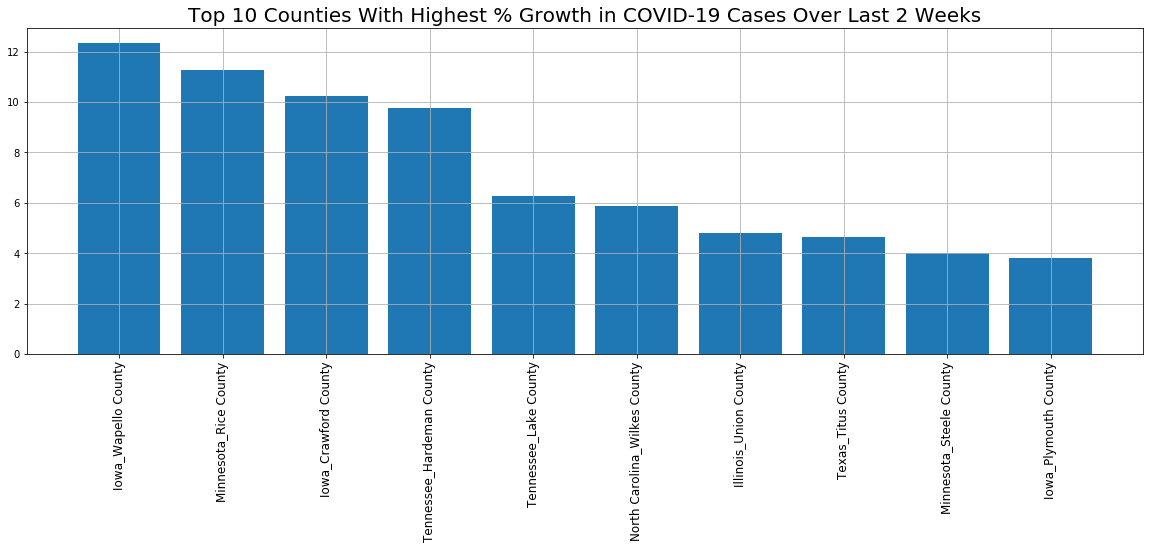

In [153]:
plt.figure(figsize=[20,6])
plt.grid()
plt.title('Top 10 Counties With Highest % Growth in COVID-19 Cases Over Last 2 Weeks', fontsize = '20')
plt.bar(covid_data_2wkcomp_top10.State_County, covid_data_2wkcomp_top10.Pct_Change_Cases_2wks)

# y_ticks = np.linspace(0,45,10)
plt.xticks(covid_data_2wkcomp_top10.State_County, fontsize = '12', rotation = 90);
# plt.yticks(y_ticks);

In [154]:
covid_data[covid_data['county'] == 'Trousdale County']

date            county      state     FIPS  cases  deaths  \
121194 2020-03-28  Trousdale County  Tennessee  47169.0      1       0   
121195 2020-03-29  Trousdale County  Tennessee  47169.0      1       0   
121196 2020-03-30  Trousdale County  Tennessee  47169.0      3       0   
121197 2020-03-31  Trousdale County  Tennessee  47169.0      3       0   
121198 2020-04-01  Trousdale County  Tennessee  47169.0      5       1   
121199 2020-04-02  Trousdale County  Tennessee  47169.0      6       1   
121200 2020-04-03  Trousdale County  Tennessee  47169.0      7       1   
121201 2020-04-04  Trousdale County  Tennessee  47169.0      7       1   
121202 2020-04-05  Trousdale County  Tennessee  47169.0      8       1   
121203 2020-04-06  Trousdale County  Tennessee  47169.0     11       1   
121204 2020-04-07  Trousdale County  Tennessee  47169.0     14       1   
121205 2020-04-08  Trousdale County  Tennessee  47169.0     14       1   
121206 2020-04-09  Trousdale County  Tennessee  47169.0     14       1   
121207 2020-04-10  Trousdale County  Tennessee  47169.0     14       1   
121208 2020-04-11  Trousdale County  Tennessee  47169.0     17       1   
121209 2020-04-12  Trousdale County  Tennessee  47169.0     17       1   
121210 2020-04-13  Trousdale County  Tennessee  47169.0     20       1   
121211 2020-04-14  Trousdale County  Tennessee  47169.0     20       1   
121212 2020-04-15  Trousdale County  Tennessee  47169.0     20       1   
121213 2020-04-16  Trousdale County  Tennessee  47169.0     20       1   
121214 2020-04-17  Trousdale County  Tennessee  47169.0     20       1   
121215 2020-04-18  Trousdale County  Tennessee  47169.0     20       1   
121216 2020-04-19  Trousdale County  Tennessee  47169.0     22       1   
121217 2020-04-20  Trousdale County  Tennessee  47169.0     22       1   
121218 2020-04-21  Trousdale County  Tennessee  47169.0     23       1   
121219 2020-04-22  Trousdale County  Tennessee  47169.0     27       1   
121220 2020-04-23  Trousdale County  Tennessee  47169.0     27       1   
121221 2020-04-24  Trousdale County  Tennessee  47169.0     29       1   
121222 2020-04-25  Trousdale County  Tennessee  47169.0     47       1   
121223 2020-04-26  Trousdale County  Tennessee  47169.0     48       1   
121224 2020-04-27  Trousdale County  Tennessee  47169.0     48       1   
121225 2020-04-28  Trousdale County  Tennessee  47169.0     50       1   
121226 2020-04-29  Trousdale County  Tennessee  47169.0    122       1   
121227 2020-04-30  Trousdale County  Tennessee  47169.0    123       1   
121228 2020-05-01  Trousdale County  Tennessee  47169.0   1020       1   
121229 2020-05-02  Trousdale County  Tennessee  47169.0   1344       1   
121230 2020-05-03  Trousdale County  Tennessee  47169.0   1346       1   
121231 2020-05-04  Trousdale County  Tennessee  47169.0   1348       1   
121232 2020-05-05  Trousdale County  Tennessee  47169.0   1352       2   
121233 2020-05-06  Trousdale County  Tennessee  47169.0   1355       2   
121234 2020-05-07  Trousdale County  Tennessee  47169.0   1356       2   
121235 2020-05-08  Trousdale County  Tennessee  47169.0   1355       2   
121236 2020-05-09  Trousdale County  Tennessee  47169.0   1357       2   
121237 2020-05-10  Trousdale County  Tennessee  47169.0   1357       2   
121238 2020-05-11  Trousdale County  Tennessee  47169.0   1363       2   
121239 2020-05-12  Trousdale County  Tennessee  47169.0   1364       3   
121240 2020-05-13  Trousdale County  Tennessee  47169.0   1381       3   
121241 2020-05-14  Trousdale County  Tennessee  47169.0   1382       3   
121242 2020-05-15  Trousdale County  Tennessee  47169.0   1382       4   
121243 2020-05-16  Trousdale County  Tennessee  47169.0   1382       4   

        MedianHHInc_2018                State_County  2019EstPop  \
121194           49280.0  Tennessee_Trousdale County     11284.0   
121195           49280.0  Tennessee_Trousdale County     11284.0   
121196           49280.0  Tennesse

In [155]:
covid_TN_Trousdale = covid_data[covid_data['county'] == 'Trousdale County'][['date', 'cases', 'deaths']]
covid_TN_Trousdale.set_index('date', inplace=True)

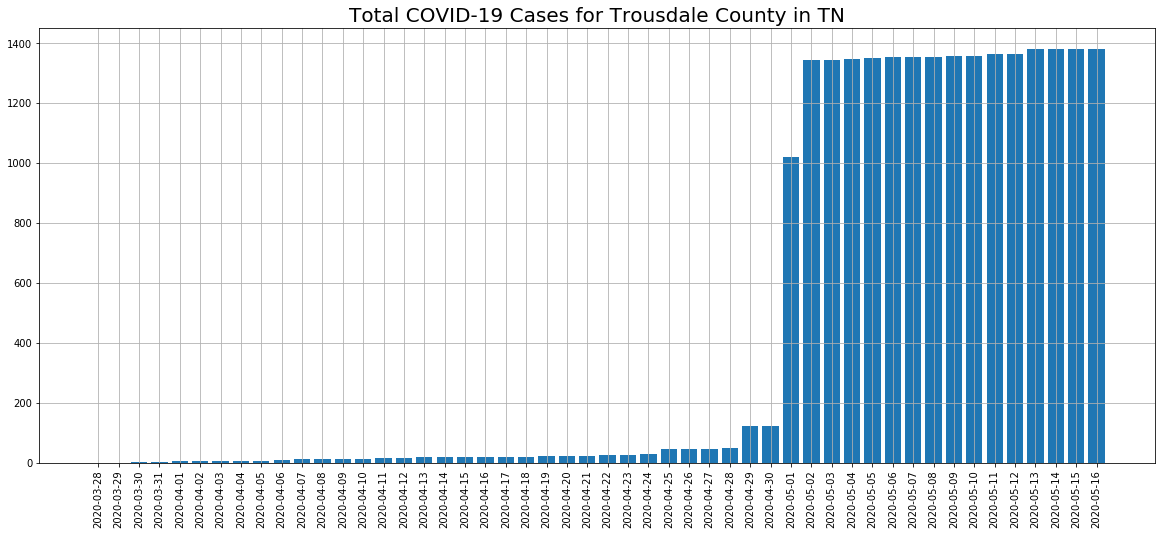

In [156]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total COVID-19 Cases for Trousdale County in TN', fontsize = '20')
plt.bar(covid_TN_Trousdale.index, covid_TN_Trousdale.cases)

# y_ticks = np.linspace(0,1400,8)
plt.xticks(covid_TN_Trousdale.index, fontsize = '10', rotation = 90);
# plt.yticks(y_ticks, fontsize = '10');

In [157]:
covid_OH_Marion = covid_data[covid_data.State_County == 'Ohio_Marion County'][['date', 'cases', 'deaths']]
covid_OH_Marion.set_index('date', inplace=True)
covid_OH_Marion = covid_OH_Marion[covid_OH_Marion.index > '2020-04-03']

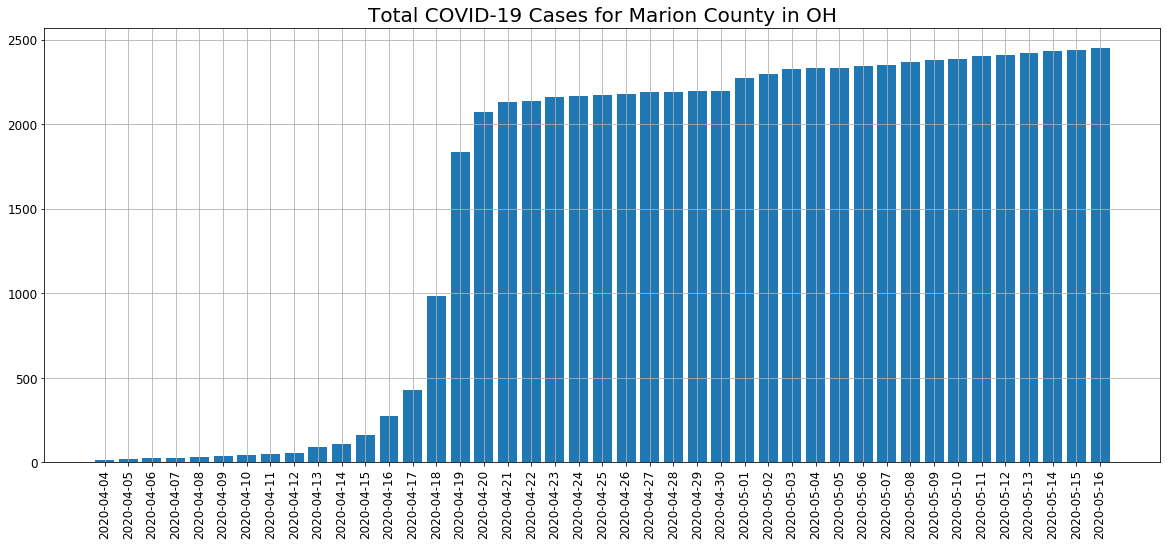

In [158]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total COVID-19 Cases for Marion County in OH', fontsize = '20')
plt.bar(covid_OH_Marion.index, covid_OH_Marion.cases)

y_ticks = np.linspace(0,2500,6)
plt.xticks(covid_OH_Marion.index, fontsize = '12', rotation = 90)
plt.yticks(y_ticks, fontsize = '12');

In [159]:
covid_data_2wkcomp_MI = covid_data_2wkcomp[covid_data_2wkcomp.State_County.str.contains('Michigan')]
covid_data_2wkcomp_MI.sort_values(by='cases_'+today, ascending=False)

date              State_County  2019EstPop  cases_20200516  \
2176 2020-05-16     Michigan_Wayne County   1749343.0           19016   
2322 2020-05-16   Michigan_Oakland County   1257584.0            8023   
2172 2020-05-16    Michigan_Macomb County    873972.0            6304   
741  2020-05-16      Michigan_Kent County    656955.0            2766   
1800 2020-05-16   Michigan_Unknown County         0.0            2336   
...         ...                       ...         ...             ...   
947  2020-05-16      Michigan_Lake County     11853.0               3   
942  2020-05-16  Michigan_Chippewa County     37349.0               3   
2787 2020-05-16  Michigan_Houghton County     35684.0               2   
414  2020-05-16      Michigan_Luce County      6229.0               2   
2808 2020-05-16    Michigan_Baraga County      8209.0               1   

      deaths_20200516  cases_20200502  deaths_20200502  Change_Cases_2wks  \
2176             2212         17106.0           1884.0             1910.0   
2322              910          7475.0            745.0              548.0   
2172              739          5666.0            625.0              638.0   
741                54          1697.0             36.0             1069.0   
1800               59          1934.0             44.0              402.0   
...               ...             ...              ...                ...   
947                 0             2.0              0.0                1.0   
942                 0             2.0              0.0                1.0   
2787                0             2.0              0.0                0.0   
414                 0             1.0              0.0                1.0   
2808                0             1.0              0.0                0.0   

      Change_Deaths_2wks  Pct_Change_Cases_2wks  Pct_Change_Deaths_2wks  
2176               328.0               0.111657                0.174098  
2322               165.0               0.073311                0.221477  
2172               114.0               0.112601                0.182400  
741                 18.0               0.629935                0.500000  
1800                15.0               0.207859                0.340909  
...                  ...                    ...                     ...  
947                  0.0               0.500000                     NaN  
942                  0.0               0.500000                     NaN  
2787                 0.0               0.000000                     NaN  
414                  0.0               1.000000                     NaN  
2808                 0.0               0.000000                     NaN  

[80 rows x 11 columns]

In [160]:
covid_data_2wkcomp_top20 = covid_data_2wkcomp[covid_data_2wkcomp.State_County.isin(top_20_pop_counties)][['State_County', '2019EstPop', 'cases_' + today, 'cases_' + date_2wksago_str, 'Pct_Change_Cases_2wks']]
covid_data_2wkcomp_top20 = covid_data_2wkcomp_top20.sort_values(by='2019EstPop', ascending=False)
covid_data_2wkcomp_top20.reset_index(drop=True, inplace=True)
covid_data_2wkcomp_top20

State_County  2019EstPop  cases_20200516  \
0      California_Los Angeles County  10039107.0           37303   
1             New York_New York City   8336817.0          196481   
2               Illinois_Cook County   5150233.0           61212   
3                Texas_Harris County   4713325.0            9126   
4            Arizona_Maricopa County   4485414.0            7096   
5        California_San Diego County   3338330.0            5725   
6           California_Orange County   3175692.0            4281   
7          Florida_Miami-Dade County   2716940.0           15365   
8                Texas_Dallas County   2635516.0            7250   
9        California_Riverside County   2470546.0            5618   
10               Nevada_Clark County   2266715.0            5298   
11            Washington_King County   2252782.0            7759   
12  California_San Bernardino County   2180085.0            3463   
13              Texas_Tarrant County   2102515.0            4350   
14                Texas_Bexar County   2003554.0            2120   
15            Florida_Broward County   1952778.0            6201   
16     California_Santa Clara County   1927852.0            2418   
17             Michigan_Wayne County   1749343.0           19016   
18         California_Alameda County   1671329.0            2372   
19    Massachusetts_Middlesex County   1611699.0           18883   

    cases_20200502  Pct_Change_Cases_2wks  
0          24894.0               0.498474  
1         177490.0               0.106998  
2          40227.0               0.521665  
3           6708.0               0.360465  
4           4421.0               0.605067  
5           3905.0               0.466069  
6           2660.0               0.609398  
7          12631.0               0.216452  
8           3899.0               0.859451  
9           4164.0               0.349183  
10          4225.0               0.253964  
11          6507.0               0.192408  
12          2182.0               0.587076  
13          2503.0               0.737915  
14          1585.0               0.337539  
15          5257.0               0.179570  
16          2204.0               0.097096  
17         17106.0               0.111657  
18          1726.0               0.374276  
19         15048.0               0.254851

In [161]:
covid_data_2wkcomp_top20.describe()

2019EstPop  cases_20200516  cases_20200502  Pct_Change_Cases_2wks
count  2.000000e+01       20.000000       20.000000              20.000000
mean   3.339029e+06    21066.850000    16967.100000               0.385979
std    2.261877e+06    43687.702515    38994.050773               0.218648
min    1.611699e+06     2120.000000     1585.000000               0.097096
25%    1.990860e+06     4332.750000     2620.750000               0.210441
50%    2.368630e+06     6648.500000     4323.000000               0.354824
75%    3.625101e+06    16244.500000    13235.250000               0.538017
max    1.003911e+07   196481.000000   177490.000000               0.859451

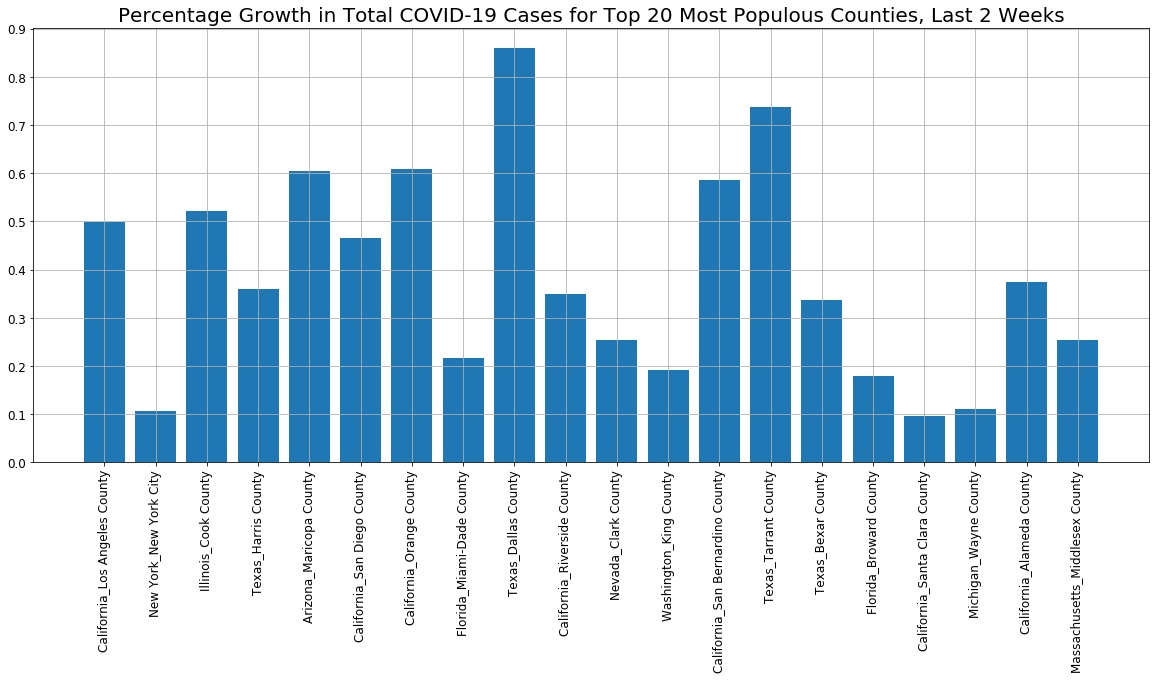

In [162]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Percentage Growth in Total COVID-19 Cases for Top 20 Most Populous Counties, Last 2 Weeks', fontsize = '20')
plt.bar(covid_data_2wkcomp_top20.State_County, covid_data_2wkcomp_top20.Pct_Change_Cases_2wks)

y_ticks = np.linspace(0,0.9,10)
plt.xticks(covid_data_2wkcomp_top20.index, fontsize = '12', rotation = 90)
plt.yticks(y_ticks, fontsize = '12');

In [163]:
top20counties_cases_latest = list(covid_data_latest[~covid_data_latest.county.isin(['Unknown County'])].sort_values(by='cases', ascending=False).head(20)['State_County'])
top20counties_cases_latest

['New York_New York City',
 'Illinois_Cook County',
 'New York_Nassau County',
 'New York_Suffolk County',
 'California_Los Angeles County',
 'New York_Westchester County',
 'Pennsylvania_Philadelphia County',
 'Michigan_Wayne County',
 'Massachusetts_Middlesex County',
 'New Jersey_Hudson County',
 'New Jersey_Bergen County',
 'Massachusetts_Suffolk County',
 'New Jersey_Essex County',
 'Florida_Miami-Dade County',
 'New Jersey_Passaic County',
 'New Jersey_Union County',
 'New Jersey_Middlesex County',
 'Connecticut_Fairfield County',
 'New York_Rockland County',
 'Massachusetts_Essex County']

In [164]:
covid_data_2wkcomp_top20_cases = covid_data_2wkcomp[covid_data_2wkcomp.State_County.isin(top20counties_cases_latest)][['State_County', '2019EstPop', 'cases_' + today, 'cases_' + date_2wksago_str, 'Pct_Change_Cases_2wks']]
covid_data_2wkcomp_top20_cases = covid_data_2wkcomp_top20_cases.sort_values(by='cases_' + today, ascending=False)
covid_data_2wkcomp_top20_cases.reset_index(drop=True, inplace=True)
covid_data_2wkcomp_top20_cases

State_County  2019EstPop  cases_20200516  \
0             New York_New York City   8336817.0          196481   
1               Illinois_Cook County   5150233.0           61212   
2             New York_Nassau County   1356924.0           39033   
3            New York_Suffolk County   1476601.0           37942   
4      California_Los Angeles County  10039107.0           37303   
5        New York_Westchester County    967506.0           32096   
6   Pennsylvania_Philadelphia County   1584064.0           19606   
7              Michigan_Wayne County   1749343.0           19016   
8     Massachusetts_Middlesex County   1611699.0           18883   
9           New Jersey_Hudson County    672391.0           17326   
10          New Jersey_Bergen County    932202.0           17246   
11      Massachusetts_Suffolk County    803907.0           16346   
12           New Jersey_Essex County    798975.0           16032   
13         Florida_Miami-Dade County   2716940.0           15365   
14         New Jersey_Passaic County    501826.0           15031   
15           New Jersey_Union County    556341.0           14569   
16       New Jersey_Middlesex County    825062.0           14514   
17      Connecticut_Fairfield County    943332.0           14140   
18          New York_Rockland County    325789.0           12688   
19        Massachusetts_Essex County    789034.0           12314   

    cases_20200502  Pct_Change_Cases_2wks  
0         177490.0               0.106998  
1          40227.0               0.521665  
2          36519.0               0.068841  
3          34478.0               0.100470  
4          24894.0               0.498474  
5          29626.0               0.083373  
6          15527.0               0.262704  
7          17106.0               0.111657  
8          15048.0               0.254851  
9          15401.0               0.124992  
10         15974.0               0.079629  
11         13606.0               0.201382  
12         14248.0               0.125211  
13         12631.0               0.216452  
14         13082.0               0.148983  
15         12996.0               0.121037  
16         12213.0               0.188406  
17         11801.0               0.198204  
18         11945.0               0.062202  
19          9362.0               0.315317

In [165]:
covid_data_2wkcomp_top20_cases.describe()

2019EstPop  cases_20200516  cases_20200502  Pct_Change_Cases_2wks
count  2.000000e+01       20.000000       20.000000              20.000000
mean   2.106905e+06    31357.150000    26708.700000               0.189542
std    2.655709e+06    40841.800734    36658.136814               0.130125
min    3.257890e+05    12314.000000     9362.000000               0.062202
25%    7.964898e+05    14915.500000    12904.750000               0.105366
50%    9.554190e+05    17286.000000    15224.500000               0.137097
75%    1.646110e+06    33397.750000    26077.000000               0.226051
max    1.003911e+07   196481.000000   177490.000000               0.521665

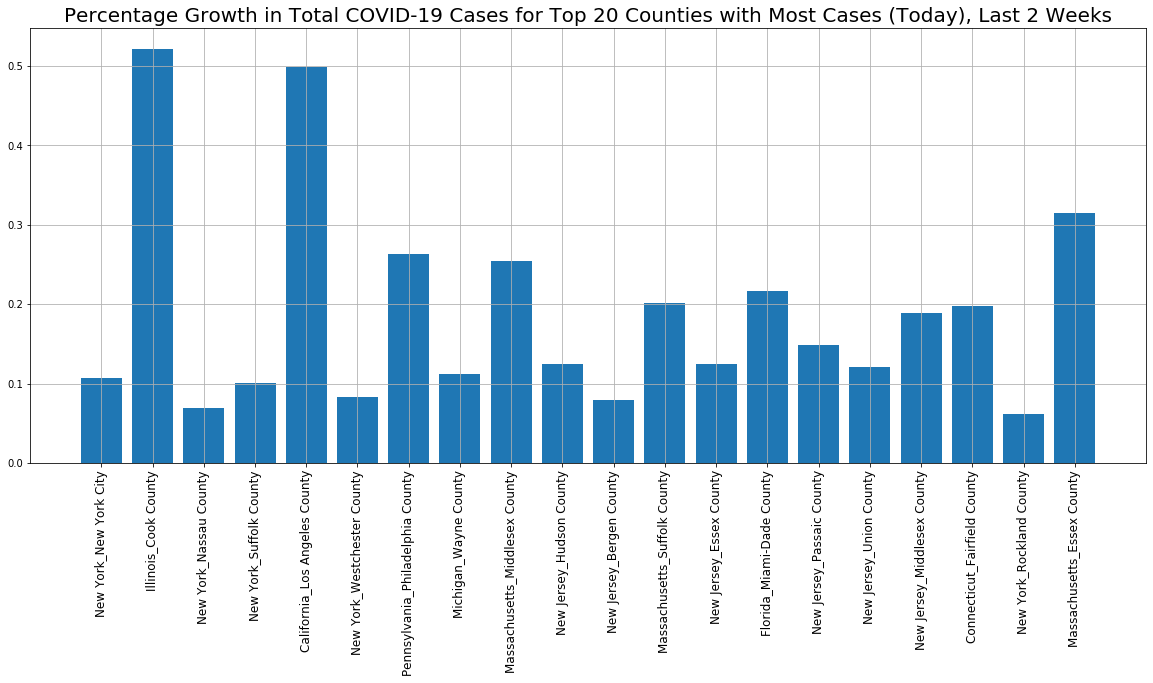

In [166]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Percentage Growth in Total COVID-19 Cases for Top 20 Counties with Most Cases (Today), Last 2 Weeks', fontsize = '20')
plt.bar(covid_data_2wkcomp_top20_cases.State_County, covid_data_2wkcomp_top20_cases.Pct_Change_Cases_2wks)

plt.xticks(covid_data_2wkcomp_top20_cases.index, fontsize = '12', rotation = 90)
plt.rc('ytick', labelsize='10');

In [167]:
covid_data_2wkcomp_top10_changecases = covid_data_2wkcomp.sort_values(by='Change_Cases_2wks', ascending=False).head(10)
covid_data_2wkcomp_top10_changecases

date                      State_County  2019EstPop  cases_20200516  \
903  2020-05-16              Illinois_Cook County   5150233.0           61212   
2203 2020-05-16            New York_New York City   8336817.0          196481   
1001 2020-05-16     California_Los Angeles County  10039107.0           37303   
1599 2020-05-16  Pennsylvania_Philadelphia County   1584064.0           19606   
844  2020-05-16   Maryland_Prince George's County    909327.0           11052   
1618 2020-05-16    Massachusetts_Middlesex County   1611699.0           18883   
2220 2020-05-16           New York_Suffolk County   1476601.0           37942   
534  2020-05-16               Texas_Dallas County   2635516.0            7250   
555  2020-05-16           Virginia_Fairfax County   1147532.0            7386   
753  2020-05-16        Maryland_Montgomery County   1050688.0            8026   

      deaths_20200516  cases_20200502  deaths_20200502  Change_Cases_2wks  \
903              2814         40227.0           1743.0            20985.0   
2203            20071        177490.0          18021.0            18991.0   
1001             1793         24894.0           1209.0            12409.0   
1599             1031         15527.0            705.0             4079.0   
844               420          7053.0            269.0             3999.0   
1618             1370         15048.0            923.0             3835.0   
2220             1783         34478.0           1277.0             3464.0   
534               170          3899.0            110.0             3351.0   
555               278          4046.0            153.0             3340.0   
753               461          4945.0            282.0             3081.0   

      Change_Deaths_2wks  Pct_Change_Cases_2wks  Pct_Change_Deaths_2wks  
903               1071.0               0.521665                0.614458  
2203              2050.0               0.106998                0.113756  
1001               584.0               0.498474                0.483044  
1599               326.0               0.262704                0.462411  
844                151.0               0.566993                0.561338  
1618               447.0               0.254851                0.484290  
2220               506.0               0.100470                0.396241  
534                 60.0               0.859451                0.545455  
555                125.0               0.825507                0.816993  
753                179.0               0.623054                0.634752

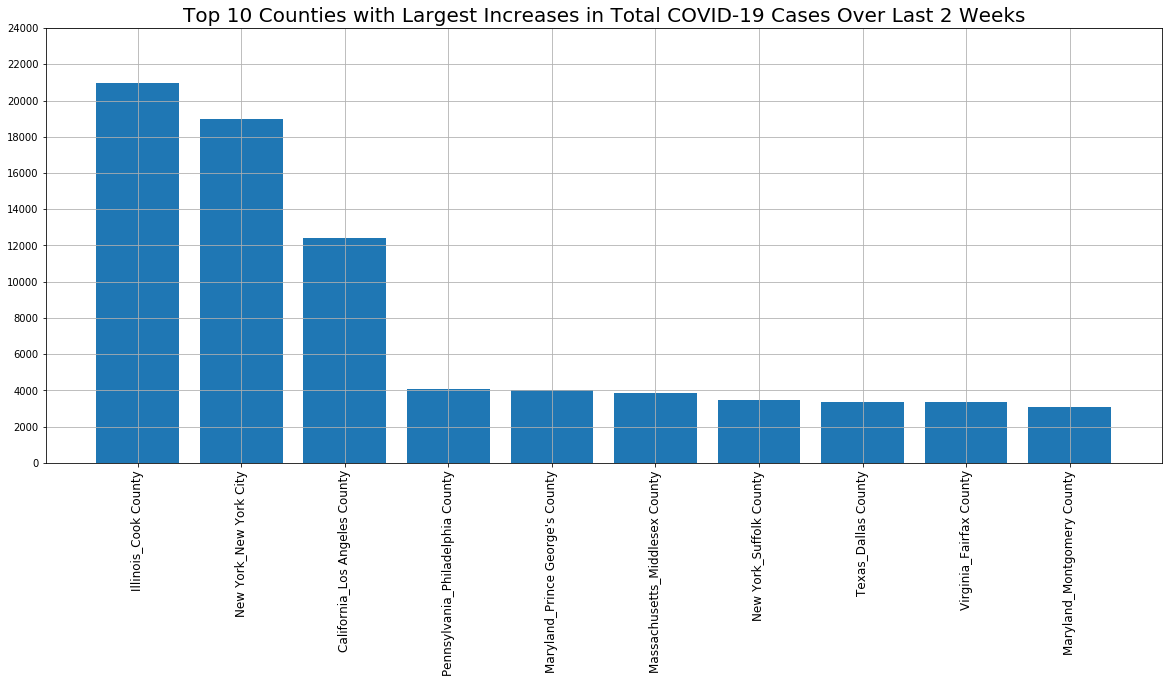

In [168]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Top 10 Counties with Largest Increases in Total COVID-19 Cases Over Last 2 Weeks', fontsize = '20')
plt.bar(covid_data_2wkcomp_top10_changecases.State_County, covid_data_2wkcomp_top10_changecases.Change_Cases_2wks)

y_ticks = np.linspace(0,24000,13)
plt.xticks(covid_data_2wkcomp_top10_changecases.State_County, fontsize = '12', rotation = 90)
plt.yticks(y_ticks);

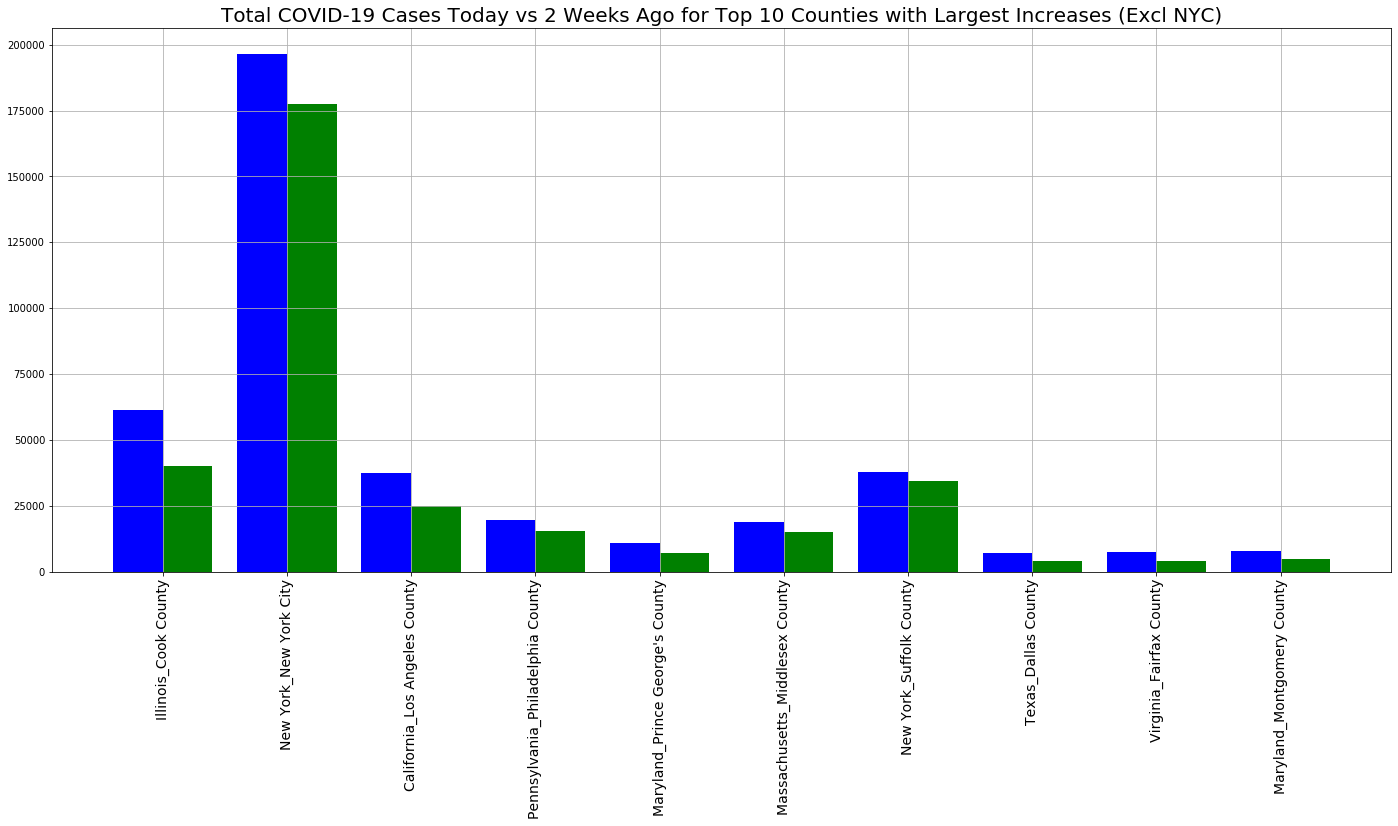

In [169]:
X = list(covid_data_2wkcomp_top10_changecases.State_County)
Y1 = list(covid_data_2wkcomp_top10_changecases['cases_' + today])
Y2 = list(covid_data_2wkcomp_top10_changecases['cases_' + date_2wksago_str])
X_val = np.arange(len(X))
# y_ticks = np.linspace(0,50000,11)

plt.figure(figsize=[24,10])
plt.grid()
plt.title('Total COVID-19 Cases Today vs 2 Weeks Ago for Top 10 Counties with Largest Increases (Excl NYC)', fontsize = '20')
plt.bar(X_val - 0.2, Y1, 0.4, color = 'b')
plt.bar(X_val + 0.2, Y2, 0.4, color = 'g')
plt.xticks(X_val, X, fontsize = '14', rotation=90) # set labels manually
# plt.yticks(y_ticks, fontsize = '14')
plt.show()

In [170]:
covid_data_PA_Luz = covid_data[covid_data['State_County'] == 'Pennsylvania_Luzerne County'][['date', 'cases', 'deaths']]
covid_data_PA_Luz.set_index('date', inplace=True)

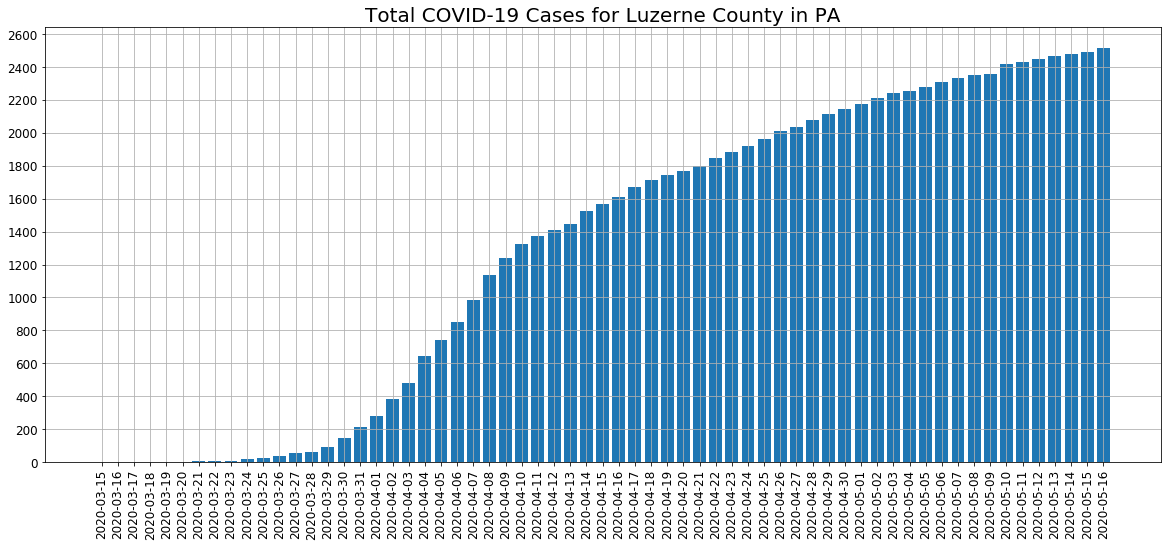

In [171]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total COVID-19 Cases for Luzerne County in PA', fontsize = '20')
plt.bar(covid_data_PA_Luz.index, covid_data_PA_Luz.cases)

y_ticks = np.linspace(0,2600,14)
plt.xticks(covid_data_PA_Luz.index, fontsize = '12', rotation = 90)
plt.yticks(y_ticks, fontsize = '12');

In [172]:
covid_data_PA_Luz_daily = covid_data_PA_Luz.diff()
covid_data_PA_Luz_daily.columns = ['cases_newdaily', 'deaths_newdaily']

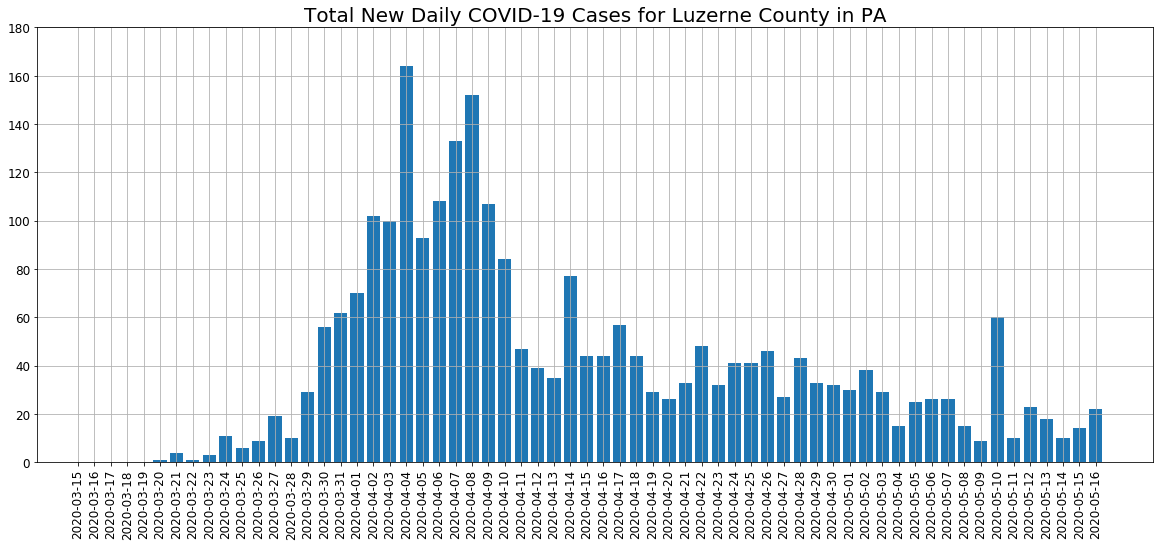

In [173]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total New Daily COVID-19 Cases for Luzerne County in PA', fontsize = '20')
plt.bar(covid_data_PA_Luz_daily.index, covid_data_PA_Luz_daily.cases_newdaily)

y_ticks = np.linspace(0,180,10)
plt.xticks(covid_data_PA_Luz_daily.index, fontsize = '12', rotation = 90)
plt.yticks(y_ticks, fontsize = '12')
plt.rc('ytick', labelsize='10');

In [174]:
# large % increase on 2020-03-21 so look at data after that
covid_data_PA_Luz_pct = covid_data_PA_Luz[covid_data_PA_Luz.index > '2020-03-21'].pct_change()
covid_data_PA_Luz_pct.columns = ['cases_dailypctchange', 'deaths_dailypctchange']

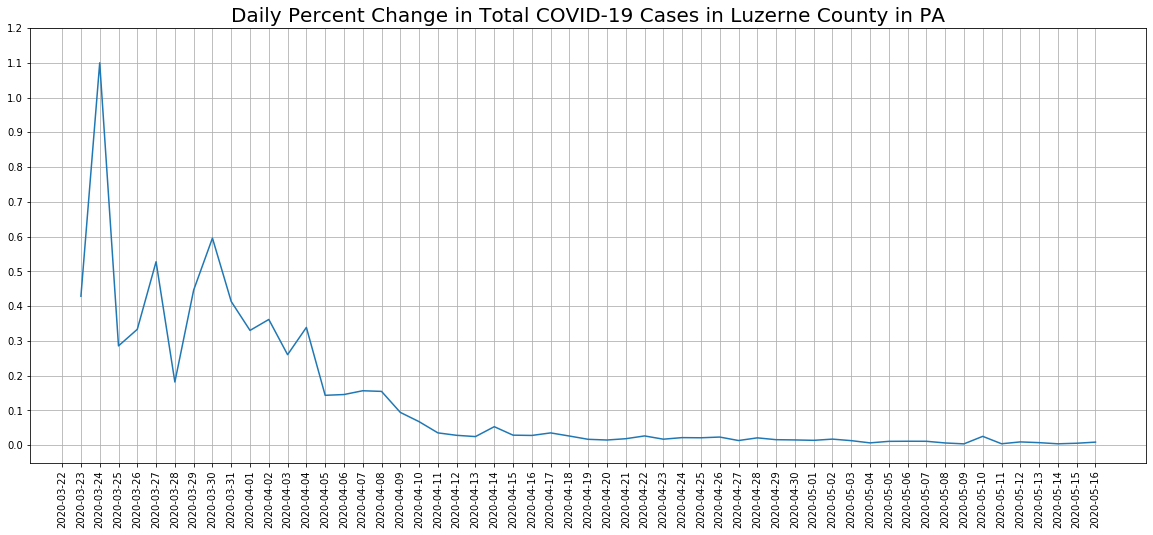

In [175]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily Percent Change in Total COVID-19 Cases in Luzerne County in PA', fontsize = '20')
plt.plot(covid_data_PA_Luz_pct.index, covid_data_PA_Luz_pct.cases_dailypctchange)

y_ticks = np.linspace(0,1.2,13)
plt.xticks(covid_data_PA_Luz_pct.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [176]:
covid_data_PA_Phil = covid_data[covid_data['State_County'] == 'Pennsylvania_Philadelphia County'][['date', 'cases', 'deaths']]
covid_data_PA_Phil.set_index('date', inplace=True)
covid_data_PA_Phil.tail()

cases  deaths
date                     
2020-05-12  18537     908
2020-05-13  18779     986
2020-05-14  19093    1008
2020-05-15  19349    1021
2020-05-16  19606    1031

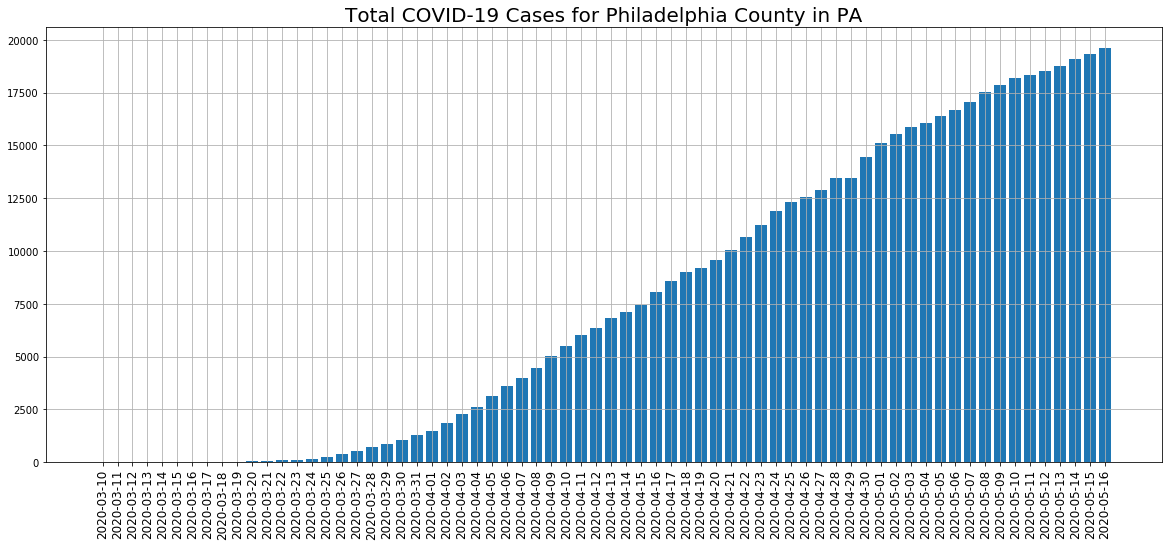

In [177]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total COVID-19 Cases for Philadelphia County in PA', fontsize = '20')
plt.bar(covid_data_PA_Phil.index, covid_data_PA_Phil.cases)

# y_ticks = np.linspace(0,12000,13)
plt.xticks(covid_data_PA_Phil.index, fontsize = '12', rotation = 90);
# plt.yticks(y_ticks, fontsize = '12');

In [178]:
covid_data_PA_Phil_daily = covid_data_PA_Phil.diff()
covid_data_PA_Phil_daily.columns = ['cases_newdaily', 'deaths_newdaily']

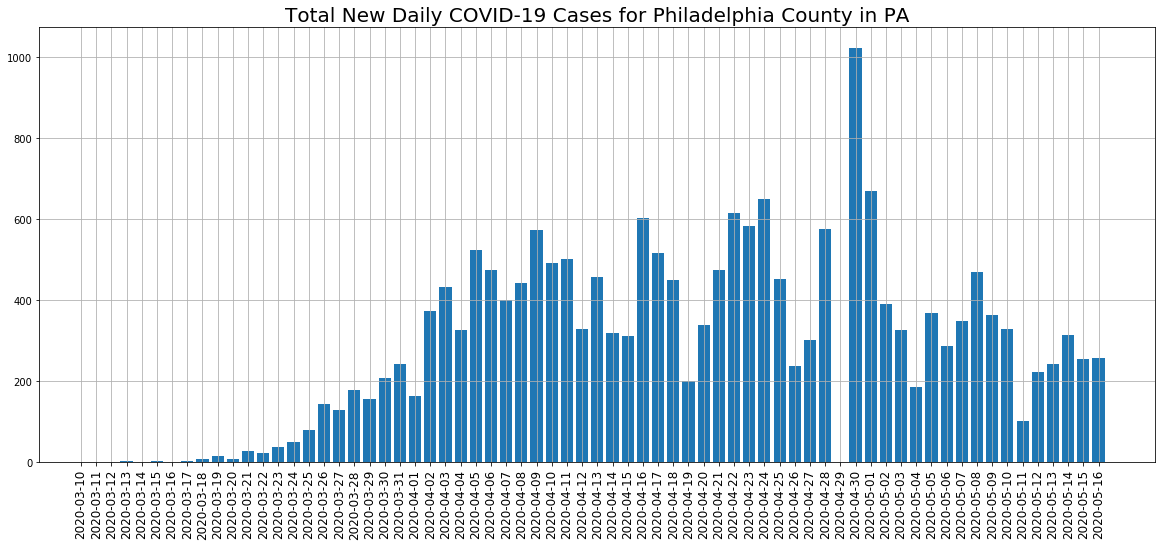

In [179]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total New Daily COVID-19 Cases for Philadelphia County in PA', fontsize = '20')
plt.bar(covid_data_PA_Phil_daily.index, covid_data_PA_Phil_daily.cases_newdaily)

# y_ticks = np.linspace(0,600,7)
plt.xticks(covid_data_PA_Phil_daily.index, fontsize = '12', rotation = 90);
# plt.yticks(y_ticks, fontsize = '12');

## COVID-19 Data (Latest Data)

In [180]:
covid_data_latest_sum = covid_data_latest.groupby('state')['cases','deaths'].sum()

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [181]:
covid_data_latest_sum = covid_data_latest_sum.sort_values(by='cases', ascending=False)

In [182]:
covid_data_latest_sum.reset_index()

state   cases  deaths
0                   New York  353136   27953
1                 New Jersey  145089   10249
2                   Illinois   92669    4149
3              Massachusetts   84933    5705
4                 California   78933    3254
5               Pennsylvania   65228    4490
6                   Michigan   50416    4880
7                      Texas   47866    1330
8                    Florida   44803    1963
9                   Maryland   38083    1957
10               Connecticut   36703    3339
11                   Georgia   35655    1573
12                 Louisiana   34117    2413
13                  Virginia   29683    1002
14                   Indiana   27919    1741
15                      Ohio   27476    1610
16                  Colorado   21604    1192
17                Washington   19426    1015
18            North Carolina   18009     671
19                 Tennessee   17204     292
20                 Minnesota   14978     709
21                      Iowa   14328     346
22                   Arizona   13631     679
23              Rhode Island   12434     489
24                 Wisconsin   12368     453
25                   Alabama   11674     485
26               Mississippi   11123     510
27                  Missouri   10794     595
28                  Nebraska   10220     129
29            South Carolina    8661     380
30                    Kansas    8060     189
31                  Kentucky    7773     346
32                  Delaware    7547     286
33                      Utah    7068      78
34      District of Columbia    7042     375
35                    Nevada    6819     349
36                New Mexico    5847     259
37                  Oklahoma    5237     288
38                  Arkansas    4578      98
39              South Dakota    3959      44
40                    Oregon    3612     137
41             New Hampshire    3556     171
42               Puerto Rico    2589     122
43                     Idaho    2419      73
44              North Dakota    1848      42
45                     Maine    1648      70
46             West Virginia    1470      65
47                      Guam    1123       6
48                   Vermont     934      53
49                   Wyoming     741       7
50                    Hawaii     629      17
51                   Montana     468      16
52                    Alaska     392       8
53            Virgin Islands      69       6
54  Northern Mariana Islands      21       2

In [183]:
covid_data_latest_sum['death_rate'] = covid_data_latest_sum['deaths'] / covid_data_latest_sum['cases']

In [184]:
covid_data_latest.loc[:,'CasesPer100000_dup'] = covid_data_latest['CasesPer100000']
covid_data_latest.loc[:,'DeathsPer100000_dup'] = covid_data_latest['DeathsPer100000']
covid_data_latest.loc[:,'2019EstPop_dup'] = covid_data_latest['2019EstPop']

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [185]:
covid_data_latest.loc[:, 'CasesPer100000_dup'] = covid_data_latest.rank(pct=True)
covid_data_latest.loc[:, 'DeathsPer100000_dup'] = covid_data_latest.rank(pct=True)
covid_data_latest.loc[:, '2019EstPop_dup'] = covid_data_latest.rank(pct=True)

In [186]:
covid_data_latest.rename(columns={'CasesPer100000_dup':'Pctile_CasesPer100000', 'DeathsPer100000_dup':'Pctile_DeathsPer100000', '2019EstPop_dup':'Pctile_2019EstPop'}, inplace=True)

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [187]:
covid_data_latest['Diff_Pct2019Pop_VS_PctCases'] = covid_data_latest['Pctile_2019EstPop'] - covid_data_latest['Pctile_CasesPer100000']

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [188]:
covid_data_latest['death_rate'] = covid_data_latest['deaths'] / covid_data_latest['cases']

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [189]:
covid_data_latest.head()

date          county    state    FIPS  cases  deaths  \
53  2020-05-16  Autauga County  Alabama  1001.0    110       4   
117 2020-05-16  Baldwin County  Alabama  1003.0    254       8   
161 2020-05-16  Barbour County  Alabama  1005.0     79       1   
209 2020-05-16     Bibb County  Alabama  1007.0     50       1   
262 2020-05-16   Blount County  Alabama  1009.0     45       0   

     MedianHHInc_2018            State_County  2019EstPop  CasesPer100000  \
53            59338.0  Alabama_Autauga County     55869.0      196.889151   
117           57588.0  Alabama_Baldwin County    223234.0      113.781951   
161           34382.0  Alabama_Barbour County     24686.0      320.019444   
209           46064.0     Alabama_Bibb County     22394.0      223.274091   
262           50412.0   Alabama_Blount County     57826.0       77.819666   

     DeathsPer100000  Pctile_CasesPer100000  Pctile_DeathsPer100000  \
53          7.159606               0.688233                0.706719   
117         3.583683               0.529684                0.582652   
161         4.050879               0.804479                0.601138   
209         4.465482               0.721294                0.616779   
262         0.000000               0.396729                0.221827   

     Pctile_2019EstPop  Diff_Pct2019Pop_VS_PctCases  death_rate  
53            0.681123                    -0.007110    0.036364  
117           0.893352                     0.363669    0.031496  
161           0.442232                    -0.362247    0.012658  
209           0.412371                    -0.308923    0.020000  
262           0.689300                     0.292570    0.000000

In [190]:
covid_data_latest = covid_data_latest[['date', 'county', 'state', 'cases', 'deaths', 'death_rate', 'MedianHHInc_2018', 
                                       'State_County', '2019EstPop', 'CasesPer100000', 'DeathsPer100000', 
                                       'Pctile_CasesPer100000', 'Pctile_DeathsPer100000', 'Pctile_2019EstPop', 
                                       'Diff_Pct2019Pop_VS_PctCases']]

In [191]:
covid_data_latest.sort_values(by='MedianHHInc_2018',ascending=False).head(20)

date                 county       state  cases  deaths  \
137609 2020-05-16         Loudoun County    Virginia   1430      48   
136013 2020-05-16      Falls Church city    Virginia     42       4   
11779  2020-05-16     Santa Clara County  California   2418     137   
86761  2020-05-16      Los Alamos County  New Mexico      6       0   
10287  2020-05-16           Marin County  California    299      14   
11609  2020-05-16       San Mateo County  California   1612      67   
135942 2020-05-16         Fairfax County    Virginia   7386     278   
134660 2020-05-16       Arlington County    Virginia   1560      74   
13549  2020-05-16         Douglas County    Colorado    637      38   
85839  2020-05-16        Somerset County  New Jersey   4212     363   
59899  2020-05-16          Howard County    Maryland   1354      43   
121741 2020-05-16      Williamson County   Tennessee    471      10   
89243  2020-05-16          Nassau County    New York  39033    2507   
85586  2020-05-16          Morris County  New Jersey   6012     561   
85320  2020-05-16       Hunterdon County  New Jersey    795      49   
11401  2020-05-16   San Francisco County  California   2065      36   
139937 2020-05-16        Stafford County    Virginia    458       4   
60025  2020-05-16      Montgomery County    Maryland   8026     461   
59361  2020-05-16         Calvert County    Maryland    238      13   
139080 2020-05-16  Prince William County    Virginia   3563      69   

        death_rate  MedianHHInc_2018                     State_County  \
137609    0.033566          140382.0          Virginia_Loudoun County   
136013    0.095238          137551.0       Virginia_Falls Church city   
11779     0.056658          125933.0    California_Santa Clara County   
86761     0.000000          124947.0     New Mexico_Los Alamos County   
10287     0.046823          122933.0          California_Marin County   
11609     0.041563          122930.0      California_San Mateo County   
135942    0.037639          122035.0          Virginia_Fairfax County   
134660    0.047436          120950.0        Virginia_Arlington County   
13549     0.059655          120670.0          Colorado_Douglas County   
85839     0.086182          119731.0       New Jersey_Somerset County   
59899     0.031758          116719.0           Maryland_Howard County   
121741    0.021231          115930.0      Tennessee_Williamson County   
89243     0.064228          115301.0           New York_Nassau County   
85586     0.093313          112396.0         New Jersey_Morris County   
85320     0.061635          112335.0      New Jersey_Hunterdon County   
11401     0.017433          110601.0  California_San Francisco County   
139937    0.008734          108421.0         Virginia_Stafford County   
60025     0.057438          107758.0       Maryland_Montgomery County   
59361     0.054622          106270.0          Maryland_Calvert County   
139080    0.019366          106200.0   Virginia_Prince William County   

        2019EstPop  CasesPer100000  DeathsPer100000  Pctile_CasesPer100000  \
137609    413538.0      345.796517        11.607156               0.822609   
136013     14617.0      287.336663        27.365396               0.779595   
11779    1927852.0      125.424566         7.106355               0.560256   
86761      19369.0       30.977335         0.000000               0.137220   
10287     258826.0      115.521625         5.409039               0.533950   
11609     766573.0      210.286561         8.740198               0.706363   
135942   1147532.0      643.642182        24.225904               0.921081   
134660    236842.0      658.666959        31.244458               0.924280   
13549     351154.0      181.401892        10.821463               0.667259   
85839     328934.0     1280.500040       110.356485               0.971561   
59899     325690.0      415.732752        13.202739               0.862069   
121741    238412.0      197.557170         4.194420

In [192]:
covid_data_deadliest = covid_data_latest[~covid_data_latest.county.isin(['Unknown County'])][covid_data_latest['deaths'] >= 10].sort_values(by='death_rate', ascending=False).head(10)

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [193]:
covid_data_deadliest

date                   county      state  cases  deaths  \
58957  2020-05-16             Waldo County      Maine     50      14   
36842  2020-05-16           Daviess County    Indiana     63      17   
13110  2020-05-16           Chaffee County   Colorado     69      17   
54896  2020-05-16         Bienville County  Louisiana     82      20   
30943  2020-05-16         Nez Perce County      Idaho     79      19   
102465 2020-05-16             Wayne County       Ohio    200      48   
57262  2020-05-16        St. Landry Parish  Louisiana    230      51   
51524  2020-05-16           Jackson County   Kentucky     57      12   
57996  2020-05-16  West Baton Rouge Parish  Louisiana    148      30   
69694  2020-05-16            Winona County  Minnesota     75      15   

        death_rate  MedianHHInc_2018                       State_County  \
58957     0.280000           49482.0                 Maine_Waldo County   
36842     0.269841           55434.0             Indiana_Daviess County   
13110     0.246377           56168.0            Colorado_Chaffee County   
54896     0.243902           34047.0         Louisiana_Bienville County   
30943     0.240506           54476.0             Idaho_Nez Perce County   
102465    0.240000           59142.0                  Ohio_Wayne County   
57262     0.221739           36624.0        Louisiana_St. Landry Parish   
51524     0.210526           35317.0            Kentucky_Jackson County   
57996     0.202703           58205.0  Louisiana_West Baton Rouge Parish   
69694     0.200000           56076.0            Minnesota_Winona County   

        2019EstPop  CasesPer100000  DeathsPer100000  Pctile_CasesPer100000  \
58957      39715.0      125.897016        35.251165               0.560611   
36842      33351.0      188.899883        50.972984               0.678990   
13110      20356.0      338.966398        83.513460               0.817632   
54896          NaN             NaN              NaN                    NaN   
30943      40408.0      195.505840        47.020392               0.686456   
102465    115710.0      172.845908        41.483018               0.650196   
57262      82124.0      280.064293        62.101213               0.775684   
51524      13329.0      427.638983        90.029260               0.866690   
57996      26465.0      559.229171       113.357264               0.901884   
69694      50484.0      148.561921        29.712384               0.609314   

        Pctile_DeathsPer100000  Pctile_2019EstPop  Diff_Pct2019Pop_VS_PctCases  
58957                 0.920014           0.588340                     0.027728  
36842                 0.952720           0.532528                    -0.146463  
13110                 0.977604           0.379310                    -0.438322  
54896                      NaN                NaN                          NaN  
30943                 0.944188           0.595450                    -0.091006  
102465                0.933523           0.814077                     0.163882  
57262                 0.961962           0.760754                    -0.014931  
51524                 0.980448           0.246356                    -0.620334  
57996                 0.989691           0.464984                    -0.436900  
69694                 0.899751           0.659261                     0.049947

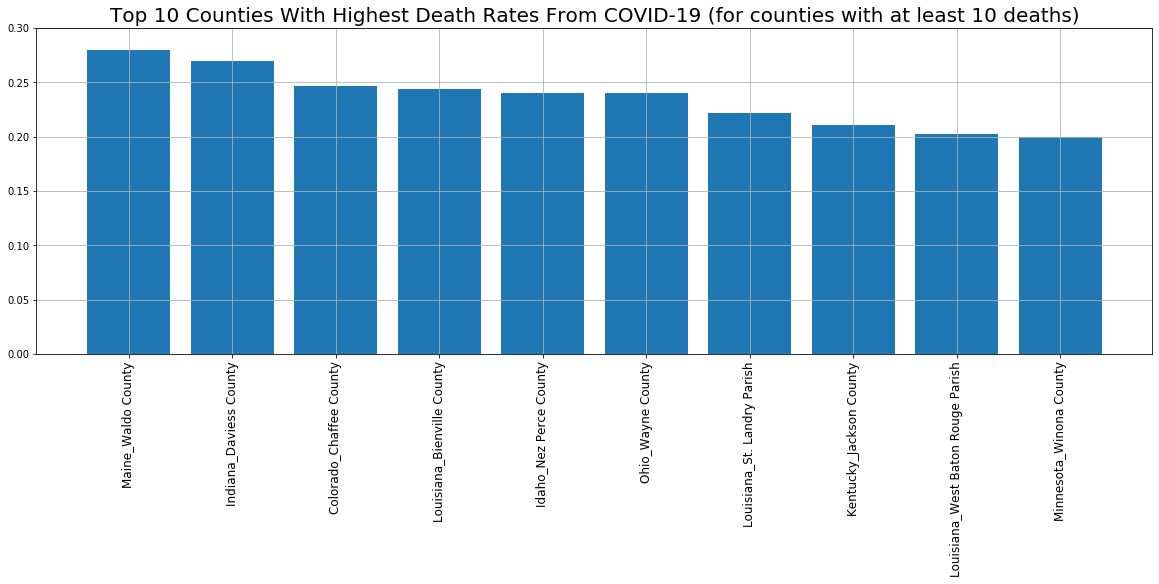

In [194]:
plt.figure(figsize=[20,6])
plt.grid()
plt.title('Top 10 Counties With Highest Death Rates From COVID-19 (for counties with at least 10 deaths)', fontsize = '20')
plt.bar(covid_data_deadliest.State_County, covid_data_deadliest.death_rate)

y_ticks = np.linspace(0, 0.30, 7)
plt.xticks(covid_data_deadliest.State_County, fontsize = '12', rotation = 90)
plt.yticks(y_ticks);

In [195]:
covid_data_latest[covid_data_latest['state'] == 'Georgia'].sort_values(by='CasesPer100000', ascending=False)

date            county    state  cases  deaths  death_rate  \
27215 2020-05-16   Randolph County  Georgia    169      21    0.124260   
27975 2020-05-16    Terrell County  Georgia    199      24    0.120603   
23389 2020-05-16      Early County  Georgia    233      28    0.120172   
21682 2020-05-16    Calhoun County  Georgia    123       7    0.056911   
23272 2020-05-16  Dougherty County  Georgia   1662     134    0.080626   
...          ...               ...      ...    ...     ...         ...   
27819 2020-05-16   Tattnall County  Georgia     11       0    0.000000   
23615 2020-05-16      Evans County  Georgia      4       0    0.000000   
24055 2020-05-16   Glascock County  Georgia      1       0    0.000000   
25642 2020-05-16       Long County  Georgia      6       0    0.000000   
28502 2020-05-16    Unknown County  Georgia   1787       0    0.000000   

       MedianHHInc_2018              State_County  2019EstPop  CasesPer100000  \
27215           28298.0   Georgia_Randolph County      6778.0     2493.360873   
27975           35290.0    Georgia_Terrell County      8531.0     2332.669089   
23389           34984.0      Georgia_Early County     10190.0     2286.555447   
21682           33393.0    Georgia_Calhoun County      6189.0     1987.396995   
23272           38806.0  Georgia_Dougherty County     87956.0     1889.581154   
...                 ...                       ...         ...             ...   
27819           41440.0   Georgia_Tattnall County     25286.0       43.502333   
23615           37319.0      Georgia_Evans County     10654.0       37.544584   
24055           42820.0   Georgia_Glascock County      2971.0       33.658701   
25642           46428.0       Georgia_Long County     19559.0       30.676415   
28502               NaN    Georgia_Unknown County         NaN             NaN   

       DeathsPer100000  Pctile_CasesPer100000  Pctile_DeathsPer100000  \
27215       309.825907               0.990402                1.000000   
27975       281.326925               0.988980                0.999645   
23389       274.779195               0.988269                0.999289   
21682       113.103894               0.984714                0.989335   
23272       152.348902               0.983292                0.996090   
...                ...                    ...                     ...   
27819         0.000000               0.216850                0.221827   
23615         0.000000               0.178102                0.221827   
24055         0.000000               0.152862                0.221827   
25642         0.000000               0.135443                0.221827   
28502              NaN                    NaN                     NaN   

       Pctile_2019EstPop  Diff_Pct2019Pop_VS_PctCases  
27215           0.096338                    -0.894063  
27975           0.140775                    -0.848205  
23389           0.178813                    -0.809456  
21682           0.083896                    -0.900818  
23272           0.771418                    -0.211873  
...                  ...                          ...  
27819           0.450409                     0.233558  
23615           0.189833                     0.011731  
24055           0.024884                    -0.127977  
25642           0.363669                     0.228226  
28502                NaN                          NaN  

[160 rows x 15 columns]

In [196]:
covid_data_latest[covid_data_latest['state'] == 
                  'Georgia'][covid_data_latest.county.isin(['DeKalb County', 'Fulton County'])]

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


date         county    state  cases  deaths  death_rate  \
23055 2020-05-16  DeKalb County  Georgia   2800      81    0.028929   
23997 2020-05-16  Fulton County  Georgia   3749     165    0.044012   

       MedianHHInc_2018           State_County  2019EstPop  CasesPer100000  \
23055           63477.0  Georgia_DeKalb County    759297.0      368.762158   
23997           70808.0  Georgia_Fulton County   1063937.0      352.370488   

       DeathsPer100000  Pctile_CasesPer100000  Pctile_DeathsPer100000  \
23055        10.667762               0.836829                0.774262   
23997        15.508437               0.826164                0.826520   

       Pctile_2019EstPop  Diff_Pct2019Pop_VS_PctCases  
23055           0.970139                     0.133310  
23997           0.986491                     0.160327

In [197]:
covid_data_deadliest_v2 = covid_data_latest[covid_data_latest['county'] != 'Unknown County'][covid_data_latest['cases'] >= 100].sort_values(by='death_rate', ascending=False).head(10)
covid_data_deadliest_v2

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


date                   county           state  cases  deaths  \
102465 2020-05-16             Wayne County            Ohio    200      48   
57262  2020-05-16        St. Landry Parish       Louisiana    230      51   
57996  2020-05-16  West Baton Rouge Parish       Louisiana    148      30   
98024  2020-05-16             Allen County            Ohio    165      30   
101514 2020-05-16           Portage County            Ohio    290      51   
102566 2020-05-16              Wood County            Ohio    241      42   
39367  2020-05-16            Orange County         Indiana    122      21   
40820  2020-05-16           Warrick County         Indiana    149      25   
63675  2020-05-16            Lapeer County        Michigan    180      30   
92892  2020-05-16          Franklin County  North Carolina    121      20   

        death_rate  MedianHHInc_2018                       State_County  \
102465    0.240000           59142.0                  Ohio_Wayne County   
57262     0.221739           36624.0        Louisiana_St. Landry Parish   
57996     0.202703           58205.0  Louisiana_West Baton Rouge Parish   
98024     0.181818           50301.0                  Ohio_Allen County   
101514    0.175862           63689.0                Ohio_Portage County   
102566    0.174274           64282.0                   Ohio_Wood County   
39367     0.172131           44968.0              Indiana_Orange County   
40820     0.167785           75534.0             Indiana_Warrick County   
63675     0.166667           65209.0             Michigan_Lapeer County   
92892     0.165289           57710.0     North Carolina_Franklin County   

        2019EstPop  CasesPer100000  DeathsPer100000  Pctile_CasesPer100000  \
102465    115710.0      172.845908        41.483018               0.650196   
57262      82124.0      280.064293        62.101213               0.775684   
57996      26465.0      559.229171       113.357264               0.901884   
98024     102351.0      161.209954        29.310901               0.630999   
101514    162466.0      178.498886        31.391183               0.664415   
102566    130817.0      184.226821        32.105919               0.675435   
39367      19646.0      620.991550       106.891988               0.915393   
40820      62998.0      236.515445        39.683799               0.738713   
63675      87607.0      205.463034        34.243839               0.699609   
92892      69685.0      173.638516        28.700581               0.652328   

        Pctile_DeathsPer100000  Pctile_2019EstPop  Diff_Pct2019Pop_VS_PctCases  
102465                0.933523           0.814077                     0.163882  
57262                 0.961962           0.760754                    -0.014931  
57996                 0.989691           0.464984                    -0.436900  
98024                 0.897974           0.794525                     0.163526  
101514                0.906506           0.858159                     0.193743  
102566                0.909705           0.830430                     0.154995  
39367                 0.986847           0.365802                    -0.549591  
40820                 0.931745           0.707430                    -0.031283  
63675                 0.916459           0.770352                     0.070743  
92892                 0.896552           0.730892                     0.078564

In [198]:
covid_data_deadliest_v3 = covid_data_latest[covid_data_latest['county'] != 
                                            'Unknown County'][covid_data_latest['2019EstPop'] >= 
                                                              500000].sort_values(by='death_rate', 
                                                                                  ascending=False).head(20)
covid_data_deadliest_v3

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


date             county          state   cases  deaths  \
16053  2020-05-16    Hartford County    Connecticut    8299    1044   
64007  2020-05-16      Macomb County       Michigan    6304     739   
65729  2020-05-16       Wayne County       Michigan   19016    2212   
64696  2020-05-16     Oakland County       Michigan    8023     910   
102041 2020-05-16      Summit County           Ohio     995     110   
110446 2020-05-16  Montgomery County   Pennsylvania    5797     614   
108744 2020-05-16     Chester County   Pennsylvania    2143     222   
109860 2020-05-16   Lancaster County   Pennsylvania    2470     255   
89320  2020-05-16      New York City       New York  196481   20071   
61238  2020-05-16     Norfolk County  Massachusetts    7412     719   
108405 2020-05-16       Bucks County   Pennsylvania    4391     421   
85128  2020-05-16       Essex County     New Jersey   16032    1522   
67118  2020-05-16    Hennepin County      Minnesota    4930     454   
108010 2020-05-16   Allegheny County   Pennsylvania    1595     143   
4945   2020-05-16        Pima County        Arizona    1781     157   
88397  2020-05-16        Erie County       New York    4867     428   
47122  2020-05-16     Johnson County         Kansas     648      56   
109193 2020-05-16    Delaware County   Pennsylvania    5555     478   
84805  2020-05-16      Bergen County     New Jersey   17246    1450   
78597  2020-05-16   St. Louis County       Missouri    4106     329   

        death_rate  MedianHHInc_2018                    State_County  \
16053     0.125798           73037.0     Connecticut_Hartford County   
64007     0.117227           62191.0          Michigan_Macomb County   
65729     0.116323           46440.0           Michigan_Wayne County   
64696     0.113424           80319.0         Michigan_Oakland County   
102041    0.110553           58890.0              Ohio_Summit County   
110446    0.105917           90155.0  Pennsylvania_Montgomery County   
108744    0.103593           99224.0     Pennsylvania_Chester County   
109860    0.103239           66270.0   Pennsylvania_Lancaster County   
89320     0.102152               NaN          New York_New York City   
61238     0.097005          100184.0    Massachusetts_Norfolk County   
108405    0.095878           88538.0       Pennsylvania_Bucks County   
85128     0.094935           62875.0         New Jersey_Essex County   
67118     0.092089           76067.0       Minnesota_Hennepin County   
108010    0.089655           59881.0   Pennsylvania_Allegheny County   
4945      0.088153           53395.0             Arizona_Pima County   
88397     0.087939           56375.0            New York_Erie County   
47122     0.086420           87087.0           Kansas_Johnson County   
109193    0.086049           71961.0    Pennsylvania_Delaware County   
84805     0.084077          100181.0        New Jersey_Bergen County   
78597     0.080127           66992.0       Missouri_St. Louis County   

        2019EstPop  CasesPer100000  DeathsPer100000  Pctile_CasesPer100000  \
16053     891720.0      930.673306       117.077109               0.950587   
64007     873972.0      721.304573        84.556485               0.932812   
65729    1749343.0     1087.036676       126.447472               0.963029   
64696    1257584.0      637.969313        72.360972               0.920014   
102041    541013.0      183.914250        20.332229               0.674369   
110446    830915.0      697.664623        73.894442               0.930679   
108744    524989.0      408.199029        42.286600               0.859225   
109860    545724.0      452.609744        46.726917               0.873800   
89320    8336817.0     2356.786769       240.751356               0.989335   
61238     706775.0     1048.707156       101.729688               0.959829   
108405    628270.0      698.903338        67.009407               0.931034   
85128     798975.0     2006.570919       190.494071               0.9850

In [199]:
covid_data_deadliest_v4 = covid_data_latest[covid_data_latest['county'] != 
                                            'Unknown County'][covid_data_latest['deaths'] 
                                                              >= 20].sort_values(by='death_rate', ascending=False).head(30)
covid_data_deadliest_v4

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


date                   county           state  cases  deaths  \
54896  2020-05-16         Bienville County       Louisiana     82      20   
102465 2020-05-16             Wayne County            Ohio    200      48   
57262  2020-05-16        St. Landry Parish       Louisiana    230      51   
57996  2020-05-16  West Baton Rouge Parish       Louisiana    148      30   
98024  2020-05-16             Allen County            Ohio    165      30   
101514 2020-05-16           Portage County            Ohio    290      51   
102566 2020-05-16              Wood County            Ohio    241      42   
39367  2020-05-16            Orange County         Indiana    122      21   
40820  2020-05-16           Warrick County         Indiana    149      25   
63675  2020-05-16            Lapeer County        Michigan    180      30   
92892  2020-05-16          Franklin County  North Carolina    121      20   
38692  2020-05-16          Lawrence County         Indiana    134      22   
108125 2020-05-16            Beaver County    Pennsylvania    518      83   
3316   2020-05-16        Tallapoosa County         Alabama    357      57   
37003  2020-05-16           Decatur County         Indiana    226      34   
37619  2020-05-16            Greene County         Indiana    158      23   
60910  2020-05-16          Franklin County   Massachusetts    304      44   
39261  2020-05-16             Noble County         Indiana    149      21   
63025  2020-05-16         Hillsdale County        Michigan    166      23   
16179  2020-05-16         Middlesex County     Connecticut    898     124   
93396  2020-05-16         Henderson County  North Carolina    279      38   
94580  2020-05-16            Orange County  North Carolina    269      36   
101977 2020-05-16             Stark County            Ohio    553      74   
72824  2020-05-16       Pearl River County     Mississippi    195      26   
37294  2020-05-16             Floyd County         Indiana    299      39   
85898  2020-05-16            Sussex County      New Jersey   1053     137   
51485  2020-05-16           Hopkins County        Kentucky    217      28   
36438  2020-05-16             Boone County         Indiana    274      35   
16053  2020-05-16          Hartford County     Connecticut   8299    1044   
55554  2020-05-16    East Feliciana County       Louisiana    176      22   

        death_rate  MedianHHInc_2018                       State_County  \
54896     0.243902           34047.0         Louisiana_Bienville County   
102465    0.240000           59142.0                  Ohio_Wayne County   
57262     0.221739           36624.0        Louisiana_St. Landry Parish   
57996     0.202703           58205.0  Louisiana_West Baton Rouge Parish   
98024     0.181818           50301.0                  Ohio_Allen County   
101514    0.175862           63689.0                Ohio_Portage County   
102566    0.174274           64282.0                   Ohio_Wood County   
39367     0.172131           44968.0              Indiana_Orange County   
40820     0.167785           75534.0             Indiana_Warrick County   
63675     0.166667           65209.0             Michigan_Lapeer County   
92892     0.165289           57710.0     North Carolina_Franklin County   
38692     0.164179           53187.0            Indiana_Lawrence County   
108125    0.160232           54823.0         Pennsylvania_Beaver County   
3316      0.159664           42205.0          Alabama_Tallapoosa County   
37003     0.150442           57441.0             Indiana_Decatur County   
37619     0.145570           46835.0              Indiana_Greene County   
60910     0.144737           58992.0      Massachusetts_Franklin County   
39261     0.140940           61341.0               Indiana_Noble County   
63025     0.138554           50388.0          Michigan_Hillsdale County   
16179     0.138085           88709.0       Connecticut_Middlesex County   
93396     0.136201           54012.0    North Caro

In [200]:
covid_data.head()

date          county    state    FIPS  cases  deaths  \
0 2020-03-24  Autauga County  Alabama  1001.0      1       0   
1 2020-03-25  Autauga County  Alabama  1001.0      4       0   
2 2020-03-26  Autauga County  Alabama  1001.0      6       0   
3 2020-03-27  Autauga County  Alabama  1001.0      6       0   
4 2020-03-28  Autauga County  Alabama  1001.0      6       0   

   MedianHHInc_2018            State_County  2019EstPop  CasesPer100000  \
0           59338.0  Alabama_Autauga County     55869.0        1.789901   
1           59338.0  Alabama_Autauga County     55869.0        7.159606   
2           59338.0  Alabama_Autauga County     55869.0       10.739408   
3           59338.0  Alabama_Autauga County     55869.0       10.739408   
4           59338.0  Alabama_Autauga County     55869.0       10.739408   

   DeathsPer100000  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0

In [203]:
covid_data_MA_Franklin = covid_data[covid_data['State_County'] == 'Massachusetts_Franklin County'][['date', 'cases', 'deaths']]
covid_data_MA_Franklin.set_index('date', inplace=True)
covid_data_MA_Franklin = covid_data_MA_Franklin[covid_data_MA_Franklin.index > '2020-03-25']
covid_data_MA_Franklin['death_rate'] = covid_data_MA_Franklin['deaths'] / covid_data_MA_Franklin['cases']
covid_data_MA_Franklin.tail()

cases  deaths  death_rate
date                                 
2020-05-12    297      42    0.141414
2020-05-13    302      43    0.142384
2020-05-14    302      43    0.142384
2020-05-15    304      43    0.141447
2020-05-16    304      44    0.144737

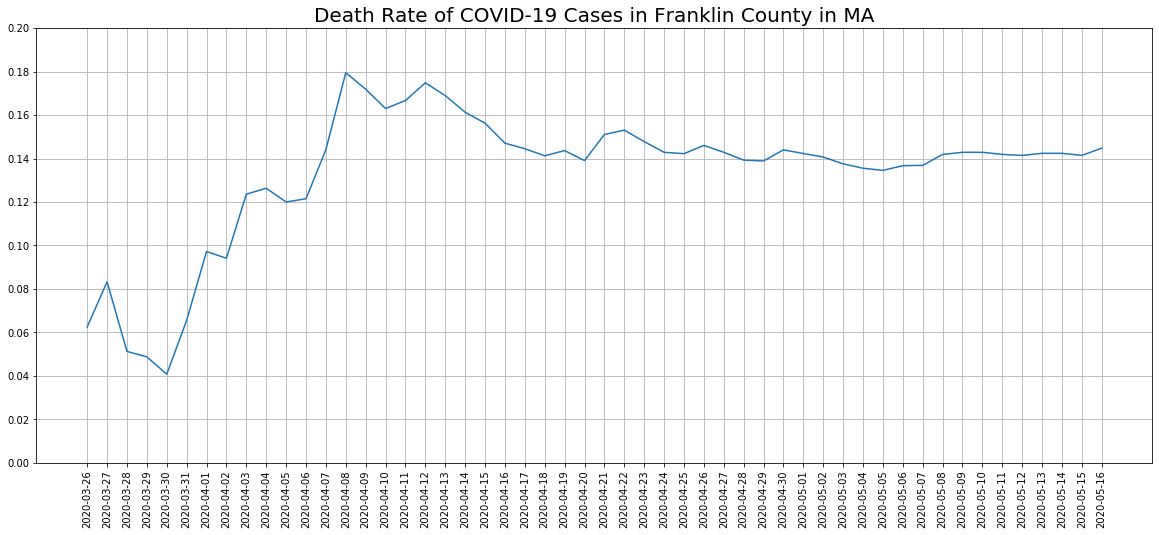

In [204]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Death Rate of COVID-19 Cases in Franklin County in MA', fontsize = '20')
plt.plot(covid_data_MA_Franklin.index, covid_data_MA_Franklin.death_rate)

y_ticks = np.linspace(0,0.20,11)
plt.xticks(covid_data_MA_Franklin.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [205]:
covid_data_latest[~covid_data_latest.county.isin(['Unknown County'])].sort_values(by='deaths', ascending=False).head(20)

date               county          state   cases  deaths  \
89320  2020-05-16        New York City       New York  196481   20071   
32091  2020-05-16          Cook County       Illinois   61212    2814   
89243  2020-05-16        Nassau County       New York   39033    2507   
65729  2020-05-16         Wayne County       Michigan   19016    2212   
10135  2020-05-16   Los Angeles County     California   37303    1793   
90461  2020-05-16       Suffolk County       New York   37942    1783   
85128  2020-05-16         Essex County     New Jersey   16032    1522   
84805  2020-05-16        Bergen County     New Jersey   17246    1450   
90980  2020-05-16   Westchester County       New York   32096    1398   
61105  2020-05-16     Middlesex County  Massachusetts   18883    1370   
15989  2020-05-16     Fairfield County    Connecticut   14140    1125   
85258  2020-05-16        Hudson County     New Jersey   17326    1045   
16053  2020-05-16      Hartford County    Connecticut    8299    1044   
110738 2020-05-16  Philadelphia County   Pennsylvania   19606    1031   
85967  2020-05-16         Union County     New Jersey   14569     946   
64696  2020-05-16       Oakland County       Michigan    8023     910   
85451  2020-05-16     Middlesex County     New Jersey   14514     872   
85721  2020-05-16       Passaic County     New Jersey   15031     831   
16243  2020-05-16     New Haven County    Connecticut   10075     800   
61407  2020-05-16       Suffolk County  Massachusetts   16346     778   

        death_rate  MedianHHInc_2018                      State_County  \
89320     0.102152               NaN            New York_New York City   
32091     0.045971           63347.0              Illinois_Cook County   
89243     0.064228          115301.0            New York_Nassau County   
65729     0.116323           46440.0             Michigan_Wayne County   
10135     0.048066           67986.0     California_Los Angeles County   
90461     0.046993          100075.0           New York_Suffolk County   
85128     0.094935           62875.0           New Jersey_Essex County   
84805     0.084077          100181.0          New Jersey_Bergen County   
90980     0.043557           94521.0       New York_Westchester County   
61105     0.072552          100374.0    Massachusetts_Middlesex County   
15989     0.079562           91183.0      Connecticut_Fairfield County   
85258     0.060314           73337.0          New Jersey_Hudson County   
16053     0.125798           73037.0       Connecticut_Hartford County   
110738    0.052586           46149.0  Pennsylvania_Philadelphia County   
85967     0.064932           80737.0           New Jersey_Union County   
64696     0.113424           80319.0           Michigan_Oakland County   
85451     0.060080           87666.0       New Jersey_Middlesex County   
85721     0.055286           71959.0         New Jersey_Passaic County   
16243     0.079404           67720.0      Connecticut_New Haven County   
61407     0.047596           68743.0      Massachusetts_Suffolk County   

        2019EstPop  CasesPer100000  DeathsPer100000  Pctile_CasesPer100000  \
89320    8336817.0     2356.786769       240.751356               0.989335   
32091    5150233.0     1188.528752        54.638305               0.969072   
89243    1356924.0     2876.579676       184.756110               0.993246   
65729    1749343.0     1087.036676       126.447472               0.963029   
10135   10039107.0      371.576874        17.860154               0.838606   
90461    1476601.0     2569.549933       120.750291               0.990757   
85128     798975.0     2006.570919       190.494071               0.985069   
84805     932202.0     1850.028213       155.545686               0.982581   
90980     967506.0     3317.395448       144.495228               0.994668   
61105    1611699.0     1171.620755        85.003465               0.967295   
15989     943332.0     1498.942048       119.258119               

In [206]:
covid_data_top20_pop['death_rate'] = covid_data_latest['deaths'] / covid_data_latest['cases']

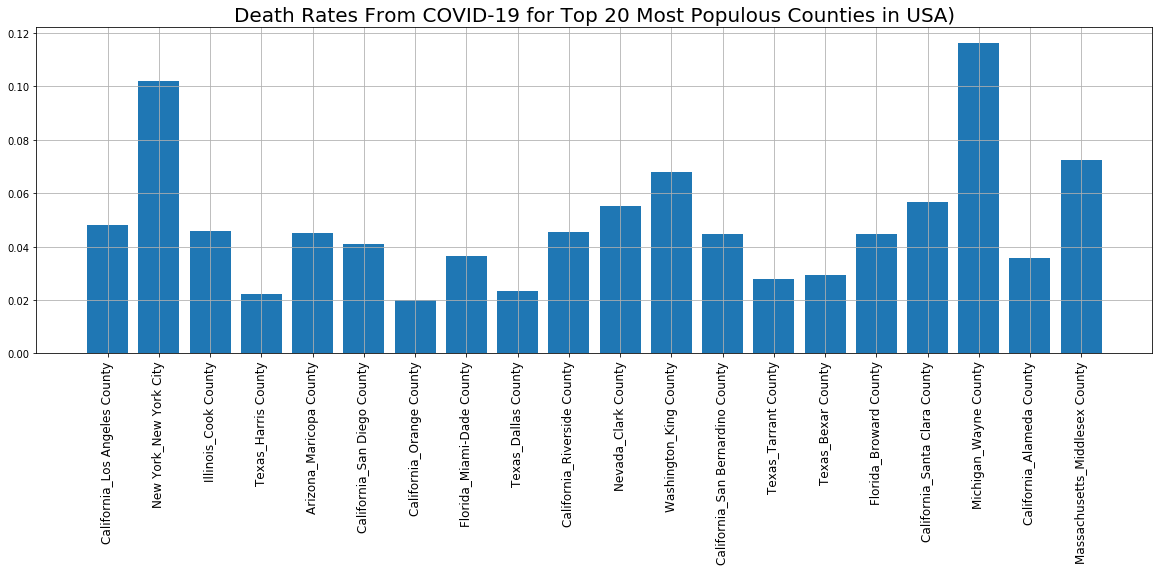

In [207]:
plt.figure(figsize=[20,6])
plt.grid()
plt.title('Death Rates From COVID-19 for Top 20 Most Populous Counties in USA)', fontsize = '20')
plt.bar(covid_data_top20_pop.State_County, covid_data_top20_pop.death_rate)

plt.xticks(covid_data_top20_pop.State_County, fontsize = '12', rotation = 90)
plt.rc('ytick', labelsize='10');

In [208]:
covid_data_latest_underperformers = covid_data_latest.sort_values(by='Diff_Pct2019Pop_VS_PctCases').head(10)
covid_data_latest_underperformers

date           county      state  cases  deaths  death_rate  \
45945  2020-05-16     Clark County     Kansas     20       0    0.000000   
20888  2020-05-16     Baker County    Georgia     33       2    0.060606   
22312  2020-05-16      Clay County    Georgia     29       3    0.103448   
47157  2020-05-16    Kearny County     Kansas     36       0    0.000000   
81791  2020-05-16    Gosper County   Nebraska     13       0    0.000000   
130220 2020-05-16   Sherman County      Texas     23       0    0.000000   
124508 2020-05-16    Donley County      Texas     26       0    0.000000   
21682  2020-05-16   Calhoun County    Georgia    123       7    0.056911   
119318 2020-05-16      Lake County  Tennessee    401       0    0.000000   
27215  2020-05-16  Randolph County    Georgia    169      21    0.124260   

        MedianHHInc_2018             State_County  2019EstPop  CasesPer100000  \
45945            51235.0      Kansas_Clark County      1994.0     1003.009027   
20888            38288.0     Georgia_Baker County      3038.0     1086.240948   
22312            30239.0      Georgia_Clay County      2834.0     1023.288638   
47157            63248.0     Kansas_Kearny County      3838.0      937.988536   
81791            59722.0   Nebraska_Gosper County      1990.0      653.266332   
130220           57052.0     Texas_Sherman County      3022.0      761.085374   
124508           40945.0      Texas_Donley County      3278.0      793.166565   
21682            33393.0   Georgia_Calhoun County      6189.0     1987.396995   
119318           33709.0    Tennessee_Lake County      7016.0     5715.507412   
27215            28298.0  Georgia_Randolph County      6778.0     2493.360873   

        DeathsPer100000  Pctile_CasesPer100000  Pctile_DeathsPer100000  \
45945          0.000000               0.955919                0.221827   
20888         65.832785               0.962673                0.967650   
22312        105.857445               0.957341                0.986491   
47157          0.000000               0.952009                0.221827   
81791          0.000000               0.923569                0.221827   
130220         0.000000               0.938500                0.221827   
124508         0.000000               0.942410                0.221827   
21682        113.103894               0.984714                0.989335   
119318         0.000000               0.998578                0.221827   
27215        309.825907               0.990402                1.000000   

        Pctile_2019EstPop  Diff_Pct2019Pop_VS_PctCases  
45945            0.009243                    -0.946676  
20888            0.026662                    -0.936011  
22312            0.022752                    -0.934589  
47157            0.036260                    -0.915748  
81791            0.008887                    -0.914682  
130220           0.025951                    -0.912549  
124508           0.030217                    -0.912193  
21682            0.083896                    -0.900818  
119318           0.103448                    -0.895130  
27215            0.096338                    -0.894063

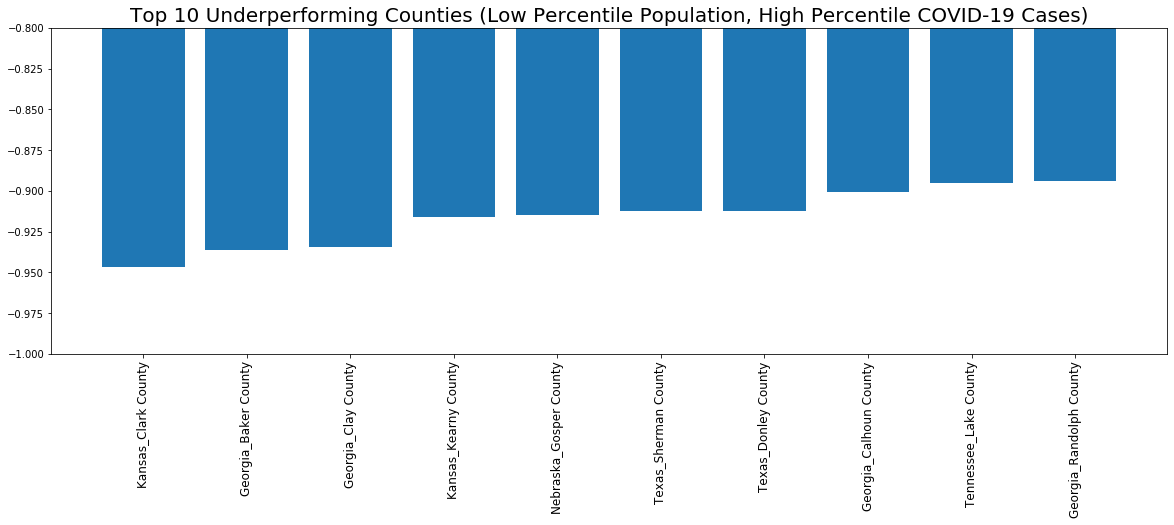

In [210]:
plt.figure(figsize=[20,6])
plt.title('Top 10 Underperforming Counties (Low Percentile Population, High Percentile COVID-19 Cases)', fontsize = '20')
plt.bar(covid_data_latest_underperformers.State_County, covid_data_latest_underperformers.Diff_Pct2019Pop_VS_PctCases)

plt.xticks(covid_data_latest_underperformers.State_County, fontsize = '12', rotation = 90)
plt.rc('ytick', labelsize='10')
plt.ylim(-1,-0.80);

In [211]:
covid_data_latest_outperformers = covid_data_latest.sort_values(by='Diff_Pct2019Pop_VS_PctCases', ascending=False).head(10)
covid_data_latest_outperformers

date            county       state  cases  deaths  death_rate  \
107001 2020-05-16       Lane County      Oregon     64       2    0.031250   
9269   2020-05-16      Butte County  California     22       0    0.000000   
11919  2020-05-16     Shasta County  California     34       4    0.117647   
106779 2020-05-16    Jackson County      Oregon     50       0    0.000000   
8442   2020-05-16  Sebastian County    Arkansas     15       0    0.000000   
29461  2020-05-16   Honolulu County      Hawaii    415      11    0.026506   
76060  2020-05-16     Greene County    Missouri    105       8    0.076190   
147348 2020-05-16   Marathon County   Wisconsin     32       1    0.031250   
76443  2020-05-16     Jasper County    Missouri     27       0    0.000000   
9551   2020-05-16  El Dorado County  California     64       0    0.000000   

        MedianHHInc_2018                 State_County  2019EstPop  \
107001           53161.0           Oregon_Lane County    382067.0   
9269             50945.0      California_Butte County    219186.0   
11919            53908.0     California_Shasta County    180080.0   
106779           55511.0        Oregon_Jackson County    220944.0   
8442             46843.0    Arkansas_Sebastian County    127827.0   
29461            83695.0       Hawaii_Honolulu County    974563.0   
76060            44799.0       Missouri_Greene County    293086.0   
147348           63442.0    Wisconsin_Marathon County    135692.0   
76443            46596.0       Missouri_Jasper County    121328.0   
9551             81869.0  California_El Dorado County    192843.0   

        CasesPer100000  DeathsPer100000  Pctile_CasesPer100000  \
107001       16.750989         0.523468               0.055101   
9269         10.037137         0.000000               0.019197   
11919        18.880498         2.221235               0.067544   
106779       22.630169         0.000000               0.089229   
8442         11.734610         0.000000               0.027373   
29461        42.583189         1.128711               0.210451   
76060        35.825662         2.729574               0.167437   
147348       23.582820         0.736963               0.096694   
76443        22.253725         0.000000               0.086029   
9551         33.187619         0.000000               0.150373   

        Pctile_DeathsPer100000  Pctile_2019EstPop  Diff_Pct2019Pop_VS_PctCases  
107001                0.444721           0.935300                     0.880199  
9269                  0.221827           0.891930                     0.872734  
11919                 0.515108           0.872023                     0.804479  
106779                0.221827           0.892997                     0.803768  
8442                  0.221827           0.826164                     0.798791  
29461                 0.460007           0.984003                     0.773551  
76060                 0.547458           0.917526                     0.750089  
147348                0.447920           0.834341                     0.737647  
76443                 0.221827           0.820121                     0.734092  
9551                  0.221827           0.879488                     0.729115

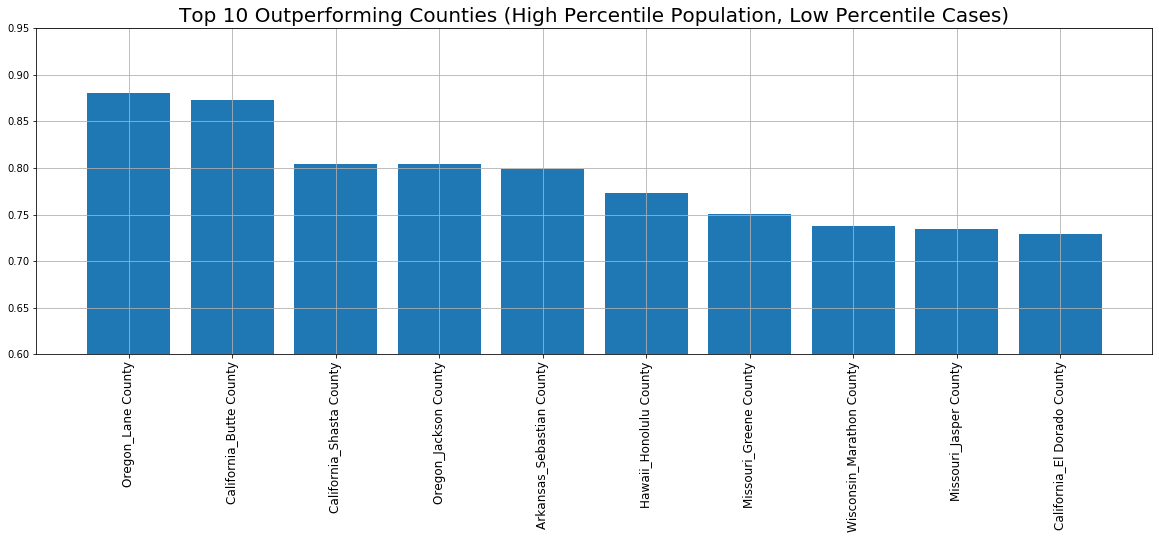

In [212]:
plt.figure(figsize=[20,6])
plt.grid()
plt.title('Top 10 Outperforming Counties (High Percentile Population, Low Percentile Cases)', fontsize = '20')
plt.bar(covid_data_latest_outperformers.State_County, covid_data_latest_outperformers.Diff_Pct2019Pop_VS_PctCases)
plt.xticks(covid_data_latest_outperformers.State_County, fontsize = '12', rotation = 90)
plt.rc('ytick', labelsize='10')
plt.ylim(0.6,0.95);

In [215]:
covid_data_latest[covid_data_latest['state'] == 'Iowa'].sort_values(by='cases', ascending = False).head(20)

date                county state  cases  deaths  death_rate  \
44433 2020-05-16           Polk County  Iowa   2845      78    0.027417   
45401 2020-05-16       Woodbury County  Iowa   2157      16    0.007418   
41439 2020-05-16     Black Hawk County  Iowa   1571      29    0.018460   
43620 2020-05-16           Linn County  Iowa    892      70    0.078475   
43898 2020-05-16       Marshall County  Iowa    778       5    0.006427   
42276 2020-05-16         Dallas County  Iowa    773      10    0.012937   
43366 2020-05-16        Johnson County  Iowa    567       7    0.012346   
44163 2020-05-16      Muscatine County  Iowa    524      32    0.061069   
45063 2020-05-16        Wapello County  Iowa    360       2    0.005556   
44849 2020-05-16           Tama County  Iowa    354      16    0.045198   
42212 2020-05-16       Crawford County  Iowa    348       1    0.002874   
43664 2020-05-16         Louisa County  Iowa    306       3    0.009804   
44630 2020-05-16          Scott County  Iowa    301       8    0.026578   
42496 2020-05-16        Dubuque County  Iowa    258      10    0.038760   
43251 2020-05-16         Jasper County  Iowa    242      12    0.049587   
45177 2020-05-16     Washington County  Iowa    170       8    0.047059   
44502 2020-05-16  Pottawattamie County  Iowa    150       2    0.013333   
44736 2020-05-16          Sioux County  Iowa    131       0    0.000000   
41225 2020-05-16      Allamakee County  Iowa    116       4    0.034483   
44558 2020-05-16      Poweshiek County  Iowa     85       8    0.094118   

       MedianHHInc_2018               State_County  2019EstPop  \
44433           68479.0           Iowa_Polk County    490161.0   
45401           60059.0       Iowa_Woodbury County    103107.0   
41439           52320.0     Iowa_Black Hawk County    131228.0   
43620           64878.0           Iowa_Linn County    226706.0   
43898           59552.0       Iowa_Marshall County     39369.0   
42276           87267.0         Iowa_Dallas County     93453.0   
43366           64387.0        Iowa_Johnson County    151140.0   
44163           58465.0      Iowa_Muscatine County     42664.0   
45063           48226.0        Iowa_Wapello County     34969.0   
44849           56954.0           Iowa_Tama County     16854.0   
42212           54828.0       Iowa_Crawford County     16820.0   
43664           49585.0         Iowa_Louisa County     11035.0   
44630           59865.0          Iowa_Scott County    172943.0   
42496           60367.0        Iowa_Dubuque County     97311.0   
43251           60378.0         Iowa_Jasper County     37185.0   
45177           65849.0     Iowa_Washington County     21965.0   
44502           56337.0  Iowa_Pottawattamie County     93206.0   
44736           70162.0          Iowa_Sioux County     34855.0   
41225           53359.0      Iowa_Allamakee County     13687.0   
44558           56170.0      Iowa_Poweshiek County     18504.0   

       CasesPer100000  DeathsPer100000  Pctile_CasesPer100000  \
44433      580.421535        15.913139               0.905084   
45401     2092.001513        15.517860               0.986491   
41439     1197.153047        22.098942               0.969428   
43620      393.461135        30.876995               0.850693   
43898     1976.174147        12.700348               0.984358   
42276      827.153756        10.700566               0.944543   
43366      375.148869         4.631468               0.840028   
44163     1228.201763        75.004688               0.970850   
45063     1029.483257         5.719351               0.957696   
44849     2100.391598        94.932954               0.986847   
42212     2068.965517         5.945303               0.986136   
43664     2772.995016        27.186226               0.992890   
44630      174.045784         4.625802               0.653750   
42496      265.129328        10.276331               0.760043   
43251      650.800054        32.271077               0.922858   
45177    

In [216]:
covid_data_IA_Louisa = covid_data[covid_data['State_County'] == 'Iowa_Louisa County'][['date', 'cases', 'deaths', '2019EstPop', 'CasesPer100000']]
covid_data_IA_Louisa.set_index('date', inplace=True)
covid_data_IA_Louisa.tail()

cases  deaths  2019EstPop  CasesPer100000
date                                                 
2020-05-12    287       3     11035.0     2600.815587
2020-05-13    289       3     11035.0     2618.939737
2020-05-14    291       3     11035.0     2637.063888
2020-05-15    304       3     11035.0     2754.870865
2020-05-16    306       3     11035.0     2772.995016

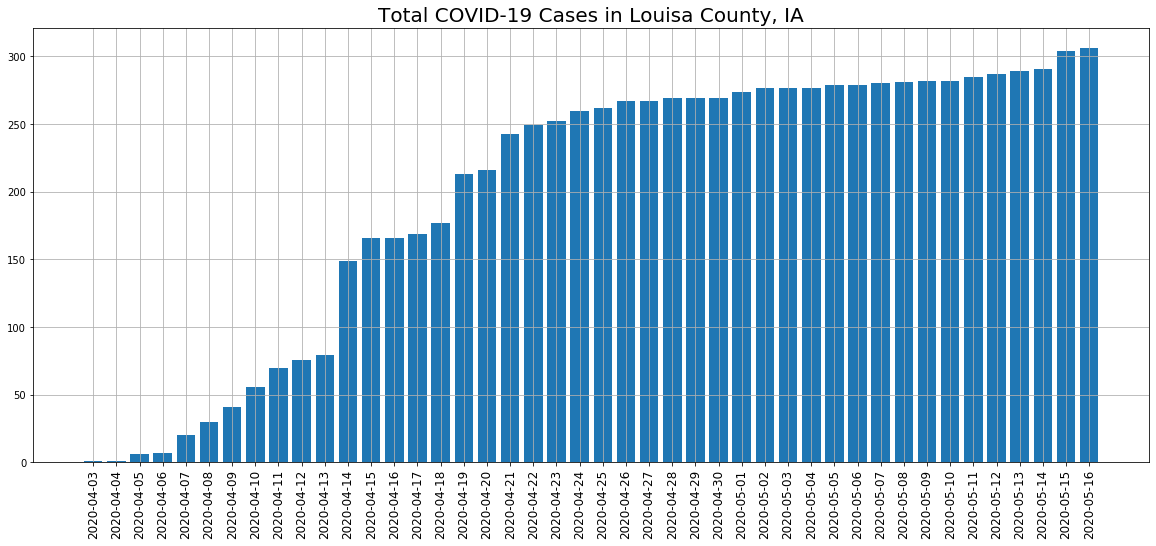

In [217]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total COVID-19 Cases in Louisa County, IA', fontsize = '20')
plt.bar(covid_data_IA_Louisa.index, covid_data_IA_Louisa.cases)

plt.xticks(covid_data_IA_Louisa.index, fontsize = '12', rotation = 90);

In [221]:
covid_data_top_counties_cases = covid_data_latest.sort_values(by='CasesPer100000',ascending=False).head(20)
covid_data_top_counties_cases

date              county       state  cases  deaths  death_rate  \
121243 2020-05-16    Trousdale County   Tennessee   1382       4    0.002894   
81353  2020-05-16       Dakota County    Nebraska   1509      14    0.009278   
7262   2020-05-16      Lincoln County    Arkansas    955       8    0.008377   
68163  2020-05-16       Nobles County   Minnesota   1353       2    0.001478   
119318 2020-05-16         Lake County   Tennessee    401       0    0.000000   
81231  2020-05-16       Colfax County    Nebraska    508       1    0.001969   
36590  2020-05-16         Cass County     Indiana   1555       6    0.003859   
117037 2020-05-16      Bledsoe County   Tennessee    607       1    0.001647   
89986  2020-05-16     Rockland County    New York  12688     439    0.034600   
46522  2020-05-16         Ford County      Kansas   1299       2    0.001540   
100723 2020-05-16       Marion County        Ohio   2449      15    0.006125   
48554  2020-05-16       Seward County      Kansas    758       1    0.001319   
101408 2020-05-16     Pickaway County        Ohio   2011      25    0.012432   
81417  2020-05-16       Dawson County    Nebraska    804       7    0.008706   
46461  2020-05-16       Finney County      Kansas   1234       5    0.004052   
90980  2020-05-16  Westchester County    New York  32096    1398    0.043557   
105768 2020-05-16        Texas County    Oklahoma    658       4    0.006079   
85721  2020-05-16      Passaic County  New Jersey  15031     831    0.055286   
82830  2020-05-16       Saline County    Nebraska    413       1    0.002421   
89243  2020-05-16       Nassau County    New York  39033    2507    0.064228   

        MedianHHInc_2018                 State_County  2019EstPop  \
121243           49280.0   Tennessee_Trousdale County     11284.0   
81353            55522.0       Nebraska_Dakota County     20026.0   
7262             44951.0      Arkansas_Lincoln County     13024.0   
68163            55766.0      Minnesota_Nobles County     21629.0   
119318           33709.0        Tennessee_Lake County      7016.0   
81231            55787.0       Nebraska_Colfax County     10709.0   
36590            48598.0          Indiana_Cass County     37689.0   
117037           40195.0     Tennessee_Bledsoe County     15064.0   
89986            88960.0     New York_Rockland County    325789.0   
46522            56052.0           Kansas_Ford County     33619.0   
100723           45419.0           Ohio_Marion County     65093.0   
48554            50671.0         Kansas_Seward County     21428.0   
101408           58742.0         Ohio_Pickaway County     58457.0   
81417            56818.0       Nebraska_Dawson County     23595.0   
46461            56206.0         Kansas_Finney County     36467.0   
90980            94521.0  New York_Westchester County    967506.0   
105768           51812.0        Oklahoma_Texas County     19983.0   
85721            71959.0    New Jersey_Passaic County    501826.0   
82830            54569.0       Nebraska_Saline County     14224.0   
89243           115301.0       New York_Nassau County   1356924.0   

        CasesPer100000  DeathsPer100000  Pctile_CasesPer100000  \
121243    12247.429989        35.448423               1.000000   
81353      7535.204234        69.909118               0.999645   
7262       7332.616708        61.425061               0.999289   
68163      6255.490314         9.246845               0.998934   
119318     5715.507412         0.000000               0.998578   
81231      4743.673546         9.337940               0.998223   
36590      4125.872270        15.919764               0.997867   
117037     4029.474243         6.638343               0.997512   
89986      3894.545242       134.749792               0.997156   
46522      3863.886493         5.949017               0.996801   
100723     3762.309311        23.043952               0.996445   
48554      3537.427665         4.666791               0.996090   
101408     3440.135484  

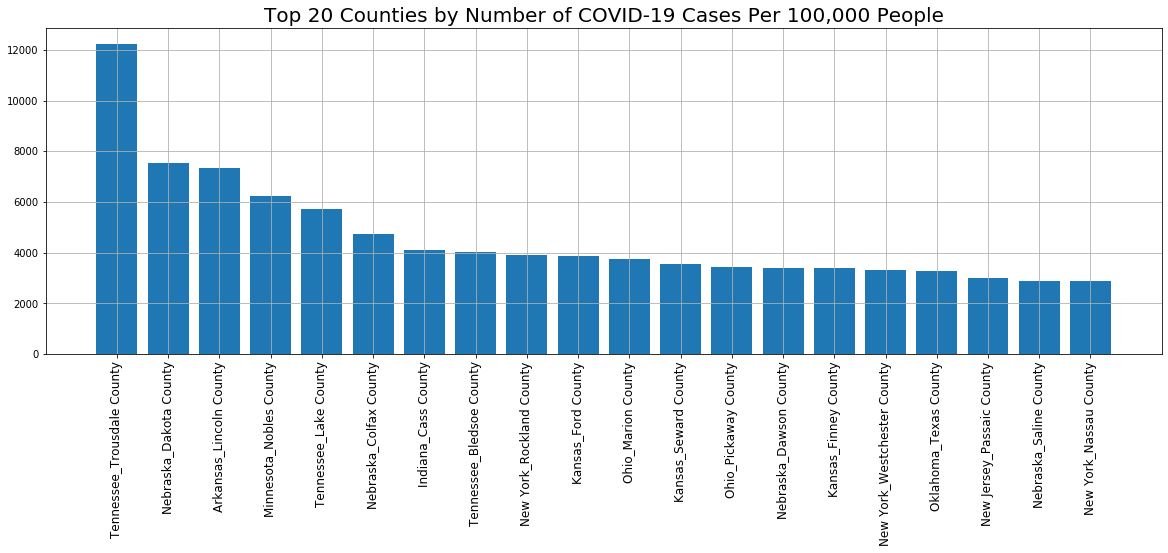

In [222]:
plt.figure(figsize=[20,6])
plt.grid()
plt.title('Top 20 Counties by Number of COVID-19 Cases Per 100,000 People', fontsize = '20')
plt.bar(covid_data_top_counties_cases.State_County, covid_data_top_counties_cases.CasesPer100000)

# y_ticks = np.linspace(0,5500,12)
plt.xticks(covid_data_top_counties_cases.State_County, fontsize = '12', rotation = 90);
# plt.yticks(y_ticks);

In [406]:
covid_NE_Dakota = covid_data[covid_data['State_County'] == 'Nebraska_Dakota County'][['date', 'cases', 'deaths']]

In [408]:
covid_NE_Dakota.set_index('date', inplace=True)

In [428]:
covid_NE_Dakota.head(10)

cases  deaths
date                     
2020-04-12      2       0
2020-04-13      2       0
2020-04-14      2       0
2020-04-15      3       0
2020-04-16      7       0
2020-04-17     22       0
2020-04-18     28       0
2020-04-19     29       0
2020-04-20     51       0
2020-04-21     73       0

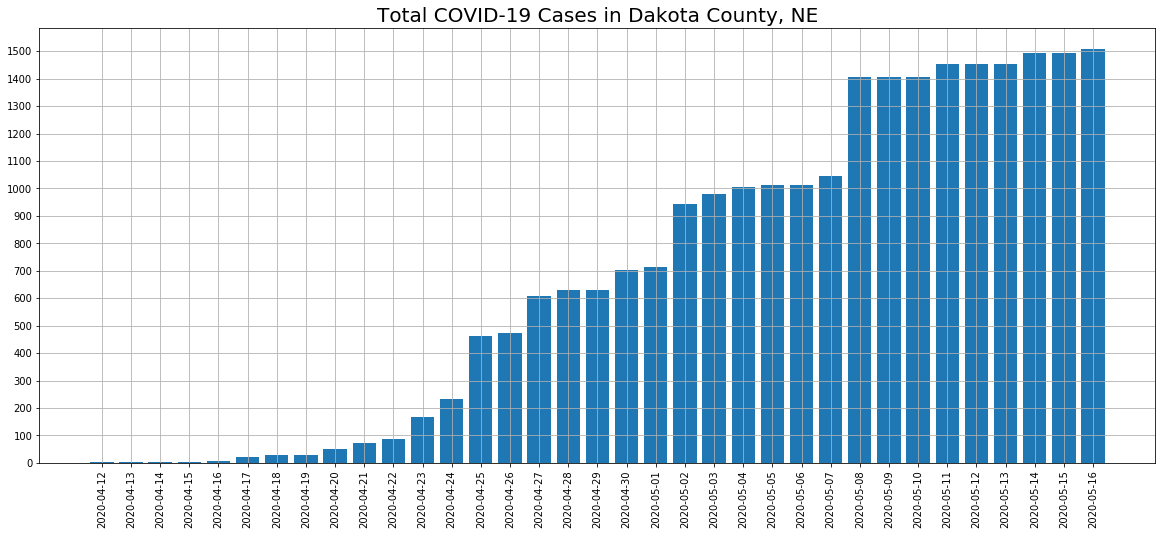

In [412]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Total COVID-19 Cases in Dakota County, NE', fontsize = '20')
plt.bar(covid_NE_Dakota.index, covid_NE_Dakota.cases)

y_ticks = np.linspace(0,1500,16)
plt.xticks(covid_NE_Dakota.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [418]:
covid_NE_Dakota_daily = covid_NE_Dakota.diff()
covid_NE_Dakota_daily.columns = ['cases_newdaily', 'deaths_newdaily']

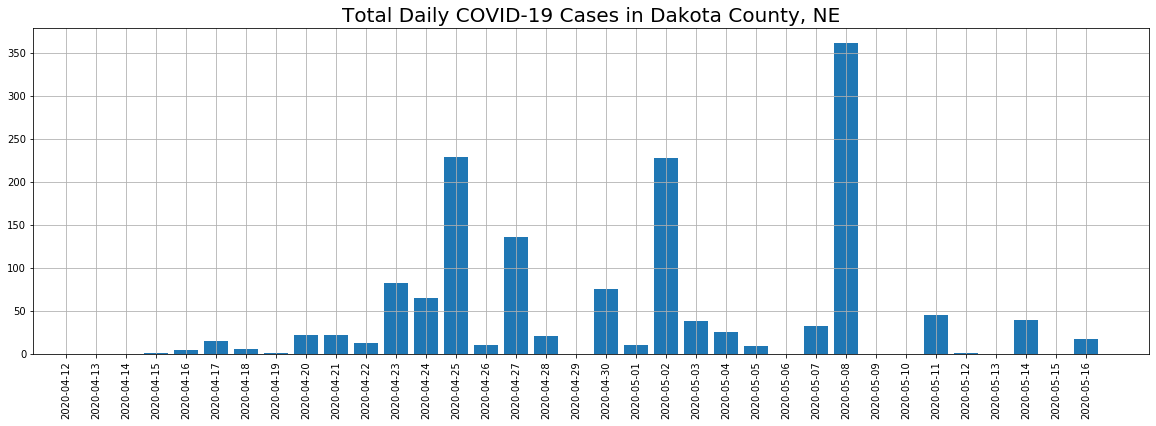

In [419]:
plt.figure(figsize=[20,6])
plt.grid()
plt.title('Total Daily COVID-19 Cases in Dakota County, NE', fontsize = '20')
plt.bar(covid_NE_Dakota_daily.index, covid_NE_Dakota_daily.cases_newdaily)

# y_ticks = np.linspace(0,500,10)
plt.xticks(covid_NE_Dakota_daily.index, fontsize = '10', rotation = 90);
# plt.yticks(y_ticks);

In [433]:
# large percentage increase on 2020-04-17 so look at data as of that date and after
covid_NE_Dakota_pct = covid_NE_Dakota[covid_NE_Dakota.index > '2020-04-16'].pct_change()
covid_NE_Dakota_pct.columns = ['cases_dailypctchange', 'deaths_dailypctchange']

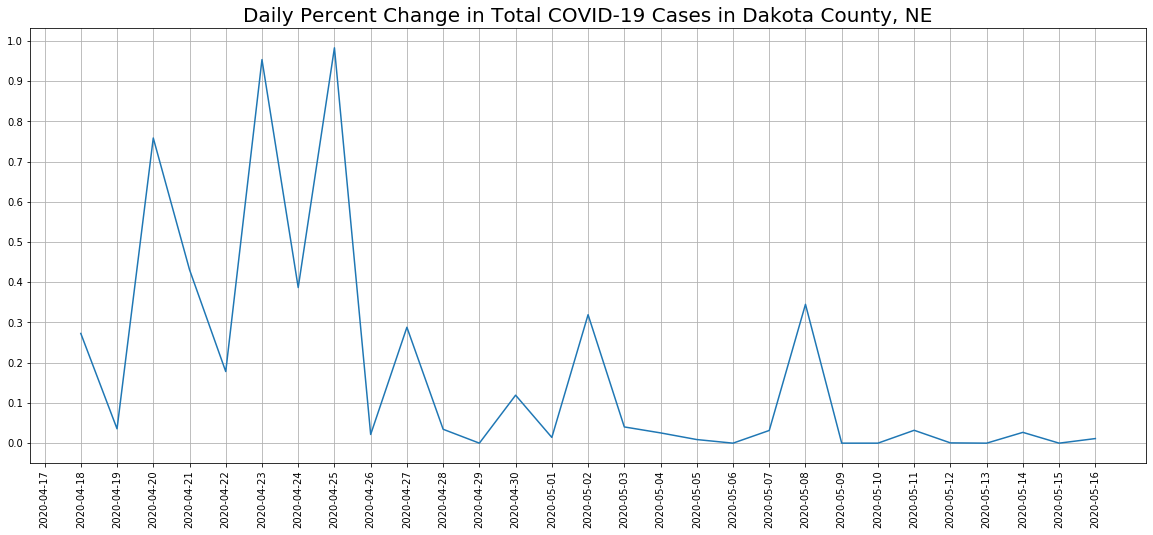

In [435]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily Percent Change in Total COVID-19 Cases in Dakota County, NE', fontsize = '20')
plt.plot(covid_NE_Dakota_pct.index, covid_NE_Dakota_pct.cases_dailypctchange)

y_ticks = np.linspace(0,1.0,11)
plt.xticks(covid_NE_Dakota_pct.index, fontsize = '10', rotation = 90);
plt.yticks(y_ticks);

In [420]:
covid_ID_Blaine = covid_data[covid_data['State_County'] == 'Idaho_Blaine County']

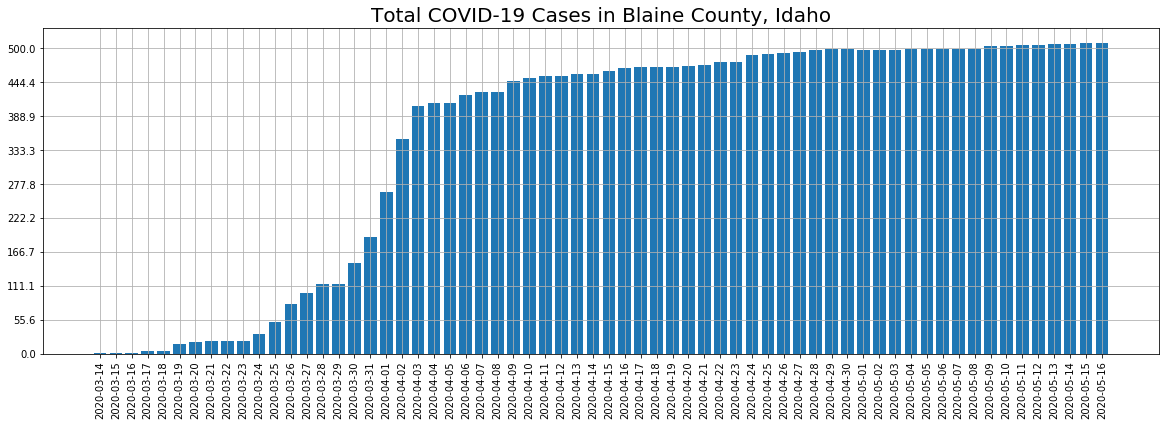

In [421]:
plt.figure(figsize=[20,6])
plt.grid()
plt.title('Total COVID-19 Cases in Blaine County, Idaho', fontsize = '20')
plt.bar(covid_ID_Blaine.date, covid_ID_Blaine.cases)

y_ticks = np.linspace(0,500,10)
plt.xticks(covid_ID_Blaine.date, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [228]:
covid_ID_Blaine_daily = covid_ID_Blaine[['date', 'cases', 'deaths']]
covid_ID_Blaine_daily.set_index('date', inplace=True)
covid_ID_Blaine_daily_new = covid_ID_Blaine_daily.diff()

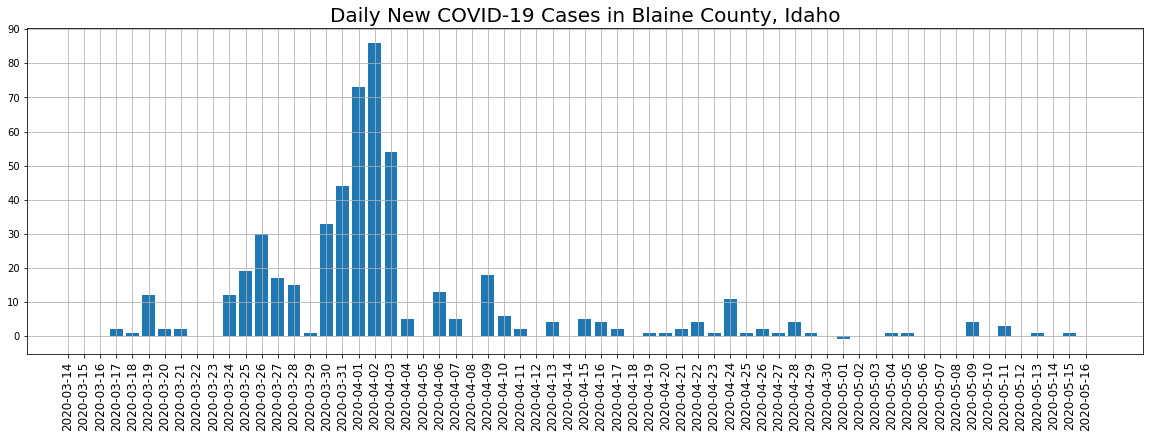

In [229]:
plt.figure(figsize=[20,6])
plt.grid()
plt.title('Daily New COVID-19 Cases in Blaine County, Idaho', fontsize = '20')
plt.bar(covid_ID_Blaine_daily_new.index, covid_ID_Blaine_daily_new.cases)

y_ticks = np.linspace(0,90,10)
plt.xticks(covid_ID_Blaine_daily_new.index, fontsize = '12', rotation = 90)
plt.yticks(y_ticks);

In [231]:
# large % spike on 2020-03-19 so look at data after that
covid_ID_Blaine_pct = covid_ID_Blaine_daily[covid_ID_Blaine_daily.index > '2020-03-19'].pct_change()
covid_ID_Blaine_pct.columns = ['cases_dailypctchange', 'deaths_dailypctchange']

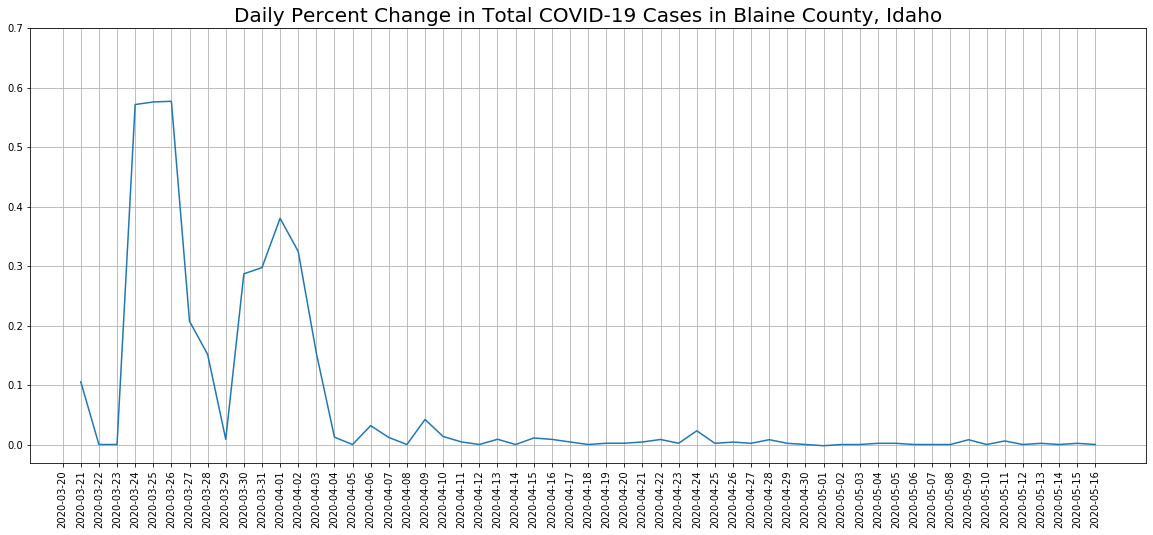

In [232]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily Percent Change in Total COVID-19 Cases in Blaine County, Idaho', fontsize = '20')
plt.plot(covid_ID_Blaine_pct.index, covid_ID_Blaine_pct.cases_dailypctchange)

y_ticks = np.linspace(0,0.7,8)
plt.xticks(covid_ID_Blaine_pct.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [233]:
covid_data_top_counties_deaths = covid_data_latest.sort_values(by='DeathsPer100000',ascending=False).head(20)

In [234]:
covid_data_top_counties_deaths

date                       county       state   cases  deaths  \
27215 2020-05-16              Randolph County     Georgia     169      21   
27975 2020-05-16               Terrell County     Georgia     199      24   
23389 2020-05-16                 Early County     Georgia     233      28   
89320 2020-05-16                New York City    New York  196481   20071   
85128 2020-05-16                 Essex County  New Jersey   16032    1522   
89243 2020-05-16                Nassau County    New York   39033    2507   
57203 2020-05-16  St. John the Baptist Parish   Louisiana     829      77   
85967 2020-05-16                 Union County  New Jersey   14569     946   
85721 2020-05-16               Passaic County  New Jersey   15031     831   
84805 2020-05-16                Bergen County  New Jersey   17246    1450   
85258 2020-05-16                Hudson County  New Jersey   17326    1045   
23272 2020-05-16             Dougherty County     Georgia    1662     134   
28343 2020-05-16                Turner County     Georgia      81      12   
26185 2020-05-16              Mitchell County     Georgia     388      32   
90980 2020-05-16           Westchester County    New York   32096    1398   
3316  2020-05-16            Tallapoosa County     Alabama     357      57   
29107 2020-05-16                Wilcox County     Georgia      95      12   
89986 2020-05-16              Rockland County    New York   12688     439   
27701 2020-05-16                Sumter County     Georgia     415      39   
37003 2020-05-16               Decatur County     Indiana     226      34   

       death_rate  MedianHHInc_2018                           State_County  \
27215    0.124260           28298.0                Georgia_Randolph County   
27975    0.120603           35290.0                 Georgia_Terrell County   
23389    0.120172           34984.0                   Georgia_Early County   
89320    0.102152               NaN                 New York_New York City   
85128    0.094935           62875.0                New Jersey_Essex County   
89243    0.064228          115301.0                 New York_Nassau County   
57203    0.092883           50830.0  Louisiana_St. John the Baptist Parish   
85967    0.064932           80737.0                New Jersey_Union County   
85721    0.055286           71959.0              New Jersey_Passaic County   
84805    0.084077          100181.0               New Jersey_Bergen County   
85258    0.060314           73337.0               New Jersey_Hudson County   
23272    0.080626           38806.0               Georgia_Dougherty County   
28343    0.148148           33261.0                  Georgia_Turner County   
26185    0.082474           36788.0                Georgia_Mitchell County   
90980    0.043557           94521.0            New York_Westchester County   
3316     0.159664           42205.0              Alabama_Tallapoosa County   
29107    0.126316           35961.0                  Georgia_Wilcox County   
89986    0.034600           88960.0               New York_Rockland County   
27701    0.093976           37562.0                  Georgia_Sumter County   
37003    0.150442           57441.0                 Indiana_Decatur County   

       2019EstPop  CasesPer100000  DeathsPer100000  Pctile_CasesPer100000  \
27215      6778.0     2493.360873       309.825907               0.990402   
27975      8531.0     2332.669089       281.326925               0.988980   
23389     10190.0     2286.555447       274.779195               0.988269   
89320   8336817.0     2356.786769       240.751356               0.989335   
85128    798975.0     2006.570919       190.494071               0.985069   
89243   1356924.0     2876.579676       184.756110               0.993246   
57203     42837.0     1935.242897       179.751150               0.984003   
85967    556341.0     2618.717657       170.039598               0.992535   
85721    501826.0     2995.261306       165.595246            

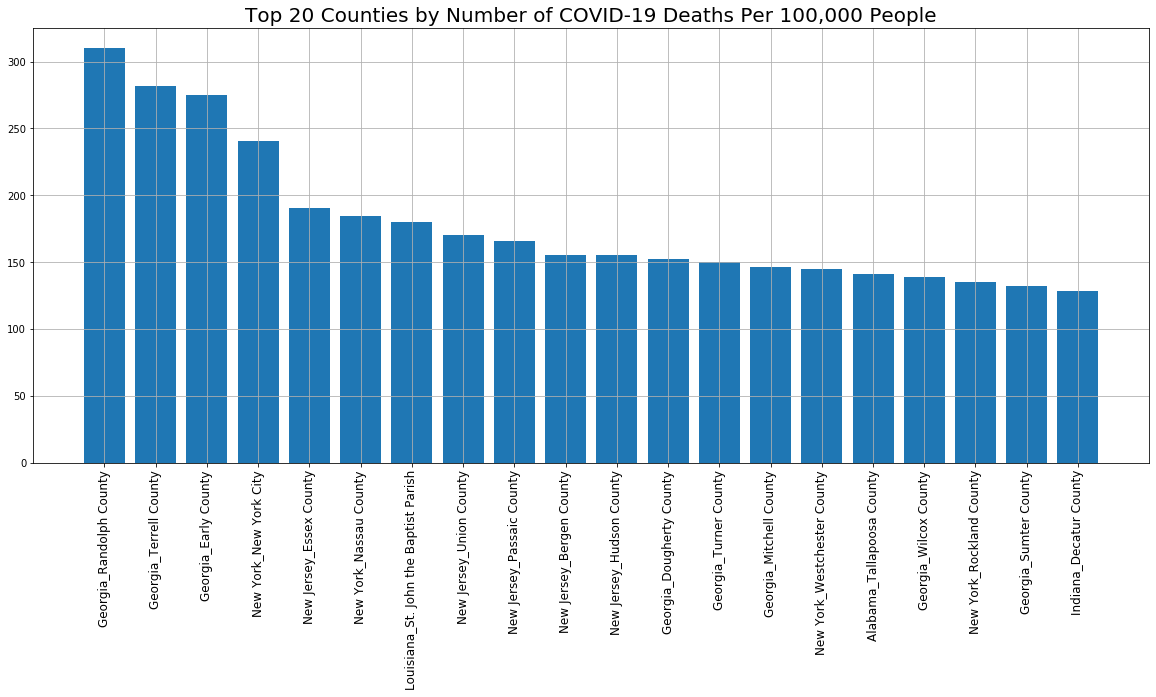

In [235]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Top 20 Counties by Number of COVID-19 Deaths Per 100,000 People', fontsize = '20')
plt.bar(covid_data_top_counties_deaths.State_County, covid_data_top_counties_deaths.DeathsPer100000)
plt.xticks(covid_data_top_counties_deaths.State_County, fontsize = '12', rotation = 90);

In [238]:
# Counties with at least 25 deaths, death rate at least 5.0%
covid_data_highdeathsandrate = covid_data_latest[covid_data_latest['deaths'] > 25][covid_data_latest['death_rate'] > 0.05]
covid_data_highdeathsandrate = covid_data_highdeathsandrate.sort_values(by = 'death_rate', ascending = False)
covid_data_highdeathsandrate.reset_index(drop=True, inplace=True)
covid_data_highdeathsandrate

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


date                   county         state  cases  deaths  \
0   2020-05-16           Unknown County      Maryland      7      89   
1   2020-05-16             Wayne County          Ohio    200      48   
2   2020-05-16        St. Landry Parish     Louisiana    230      51   
3   2020-05-16  West Baton Rouge Parish     Louisiana    148      30   
4   2020-05-16             Allen County          Ohio    165      30   
..         ...                      ...           ...    ...     ...   
203 2020-05-16            DuPage County      Illinois   5780     293   
204 2020-05-16           Niagara County      New York    770      39   
205 2020-05-16          Cuyahoga County          Ohio   3223     163   
206 2020-05-16           Luzerne County  Pennsylvania   2513     127   
207 2020-05-16      Anne Arundel County      Maryland   2809     141   

     death_rate  MedianHHInc_2018                       State_County  \
0     12.714286               NaN            Maryland_Unknown County   
1      0.240000           59142.0                  Ohio_Wayne County   
2      0.221739           36624.0        Louisiana_St. Landry Parish   
3      0.202703           58205.0  Louisiana_West Baton Rouge Parish   
4      0.181818           50301.0                  Ohio_Allen County   
..          ...               ...                                ...   
203    0.050692           93540.0             Illinois_DuPage County   
204    0.050649           55013.0            New York_Niagara County   
205    0.050574           50006.0               Ohio_Cuyahoga County   
206    0.050537           53469.0        Pennsylvania_Luzerne County   
207    0.050196           97051.0       Maryland_Anne Arundel County   

     2019EstPop  CasesPer100000  DeathsPer100000  Pctile_CasesPer100000  \
0           NaN             NaN              NaN                    NaN   
1      115710.0      172.845908        41.483018               0.650196   
2       82124.0      280.064293        62.101213               0.775684   
3       26465.0      559.229171       113.357264               0.901884   
4      102351.0      161.209954        29.310901               0.630999   
..          ...             ...              ...                    ...   
203    922921.0      626.272455        31.747029               0.916459   
204    209281.0      367.926376        18.635232               0.836474   
205   1235072.0      260.956446        13.197611               0.756843   
206    317417.0      791.703028        40.010459               0.942055   
207    579234.0      484.950814        24.342494               0.883043   

     Pctile_DeathsPer100000  Pctile_2019EstPop  Diff_Pct2019Pop_VS_PctCases  
0                       NaN                NaN                          NaN  
1                  0.933523           0.814077                     0.163882  
2                  0.961962           0.760754                    -0.014931  
3                  0.989691           0.464984                    -0.436900  
4                  0.897974           0.794525                     0.163526  
..                      ...                ...                          ...  
203                0.907572           0.980803                     0.064344  
204                0.851404           0.887664                     0.051191  
205                0.805190           0.988980                     0.232137  
206                0.932101           0.921792                    -0.020263  
207                0.879488           0.959829                     0.076786  

[208 rows x 15 columns]

In [239]:
covid_data_VA_Henrico = covid_data[covid_data['State_County'] == 'Virginia_Henrico County'][covid_data['date'] > '2020-03-24'][['date', 'cases', 'deaths']]
covid_data_VA_Henrico.set_index('date', inplace=True)
covid_data_VA_Henrico['death_rate'] = covid_data_VA_Henrico['deaths'] / covid_data_VA_Henrico['cases']

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


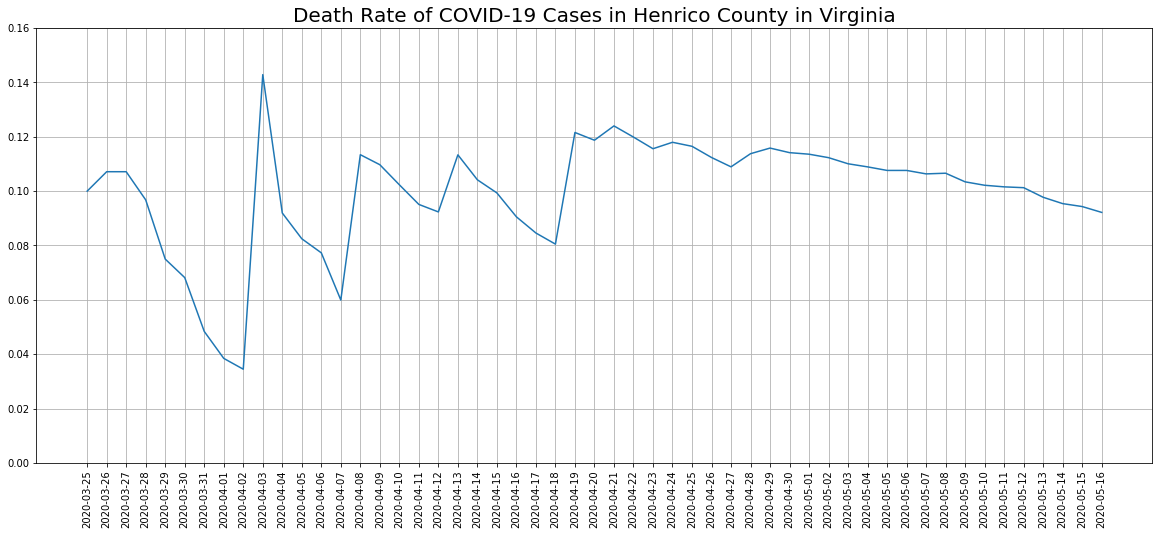

In [240]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Death Rate of COVID-19 Cases in Henrico County in Virginia', fontsize = '20')
plt.plot(covid_data_VA_Henrico.index, covid_data_VA_Henrico.death_rate)

y_ticks = np.linspace(0,0.16,9)
plt.xticks(covid_data_VA_Henrico.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [241]:
covid_data_USdeathrate = covid_data_latest.groupby('state')['cases', 'deaths', '2019EstPop'].sum()
covid_data_USdeathrate['death_rate'] = covid_data_USdeathrate['deaths'] / covid_data_USdeathrate['cases']
covid_data_USdeathrate = covid_data_USdeathrate.sort_values(by='death_rate', ascending=False)
covid_data_USdeathrate.reset_index(inplace=True)

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [242]:
covid_data_USdeathrate.describe()

cases        deaths    2019EstPop  death_rate
count      55.000000     55.000000  5.500000e+01   55.000000
mean    26811.127273   1612.000000  5.883697e+06    0.044932
std     52777.400176   4058.864031  7.283128e+06    0.021392
min        21.000000      2.000000  0.000000e+00    0.005343
25%      3584.000000     88.000000  1.351962e+06    0.031967
50%     10794.000000    375.000000  3.565287e+06    0.044218
75%     28801.000000   1451.500000  6.857528e+06    0.055058
max    353136.000000  27953.000000  3.946980e+07    0.096795

In [243]:
US_totaldeaths = sum(list(covid_data_USdeathrate.deaths))
US_totalcases = sum(list(covid_data_USdeathrate.cases))
US_deathrate = US_totaldeaths / US_totalcases
US_deathrate

0.060124290321793124

In [244]:
covid_data_USdeathrate['USA_death_rate'] = US_deathrate
covid_data_USdeathrate['Diff_USAdeathrate'] = covid_data_USdeathrate['death_rate'] - covid_data_USdeathrate['USA_death_rate']
covid_data_USdeathrate['CasesPer100000'] = covid_data_USdeathrate['cases'] / (covid_data_USdeathrate['2019EstPop'] / 100000)
covid_data_USdeathrate.replace(np.inf, np.nan, inplace=True)
covid_data_USdeathrate = covid_data_USdeathrate[~covid_data_USdeathrate['CasesPer100000'].isnull()]
covid_data_USdeathrate

state   cases  deaths  2019EstPop  death_rate  \
0               Michigan   50416    4880   9958847.0    0.096795   
2            Connecticut   36703    3339   3565287.0    0.090973   
4               New York  353136   27953  19453561.0    0.079156   
5              Louisiana   34117    2413   2934818.0    0.070727   
6             New Jersey  145089   10249   8882190.0    0.070639   
7           Pennsylvania   65228    4490  12801989.0    0.068835   
8          Massachusetts   84933    5705   6892503.0    0.067171   
9                Indiana   27919    1741   6732219.0    0.062359   
10                  Ohio   27476    1610  11689100.0    0.058597   
11               Vermont     934      53    623989.0    0.056745   
12              Colorado   21604    1192   5751635.0    0.055175   
13              Missouri   10794     595   6500925.0    0.055123   
14              Oklahoma    5237     288   3928102.0    0.054993   
15  District of Columbia    7042     375    705749.0    0.053252   
16            Washington   19426    1015   7612668.0    0.052250   
17              Maryland   38083    1957   6045680.0    0.051388   
18                Nevada    6819     349   3010490.0    0.051181   
19               Arizona   13631     679   7278717.0    0.049813   
20         New Hampshire    3556     171   1359711.0    0.048088   
21             Minnesota   14978     709   5599133.0    0.047336   
23           Mississippi   11123     510   2974822.0    0.045851   
24              Illinois   92669    4149  12649709.0    0.044772   
25              Kentucky    7773     346   4403350.0    0.044513   
26            New Mexico    5847     259   2086362.0    0.044296   
27         West Virginia    1470      65   1775585.0    0.044218   
28               Georgia   35655    1573  10617423.0    0.044117   
29        South Carolina    8661     380   5148714.0    0.043875   
30               Florida   44803    1963  21477737.0    0.043814   
31                 Maine    1648      70   1344212.0    0.042476   
32               Alabama   11674     485   4903185.0    0.041545   
33            California   78933    3254  39469804.0    0.041225   
34          Rhode Island   12434     489   1059361.0    0.039328   
35                Oregon    3612     137   4206624.0    0.037929   
36              Delaware    7547     286    973764.0    0.037896   
37        North Carolina   18009     671  10470527.0    0.037259   
38             Wisconsin   12368     453   5782902.0    0.036627   
39               Montana     468      16    949510.0    0.034188   
40              Virginia   29683    1002   6569186.0    0.033757   
41                 Idaho    2419      73   1704241.0    0.030178   
42                 Texas   47866    1330  28898045.0    0.027786   
43                Hawaii     629      17   1415786.0    0.027027   
44                  Iowa   14328     346   3130104.0    0.024149   
45                Kansas    8060     189   2825140.0    0.023449   
46          North Dakota    1848      42    723741.0    0.022727   
47              Arkansas    4578      98   3012615.0    0.021407   
48                Alaska     392       8    416823.0    0.020408   
49             Tennessee   17204     292   6822554.0    0.016973   
50              Nebraska   10220     129   1889266.0    0.012622   
51          South Dakota    3959      44    818399.0    0.011114   
52                  Utah    7068      78   3193104.0    0.011036   
53               Wyoming     741       7    563439.0    0.009447   

    USA_death_rate  Diff_USAdeathrate  CasesPer100000  
0         0.060124           0.036670      506.243343  
2         0.060124           0.030849     1029.454291  
4         0.060124           0.019032     1815.276905  
5         0.060124           0.010603     1162.491166  
6         0.060124           0.010515     1633.482283  
7         0.060124           0.008711      509.514576  
8         0.060124           0.007046     1232.251912  
9         0.060124           0.002

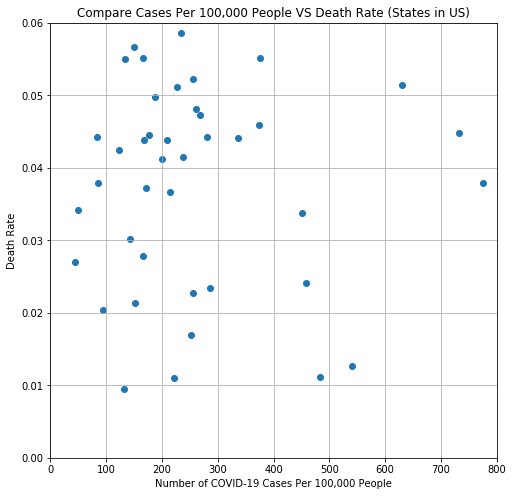

In [245]:
plt.figure(figsize=[8,8])
plt.grid()
plt.title('Compare Cases Per 100,000 People VS Death Rate (States in US)')
plt.scatter(covid_data_USdeathrate.CasesPer100000,covid_data_USdeathrate.death_rate)
plt.xlim(0,800)
plt.ylim(0,0.06)
plt.xlabel('Number of COVID-19 Cases Per 100,000 People')
plt.ylabel('Death Rate');

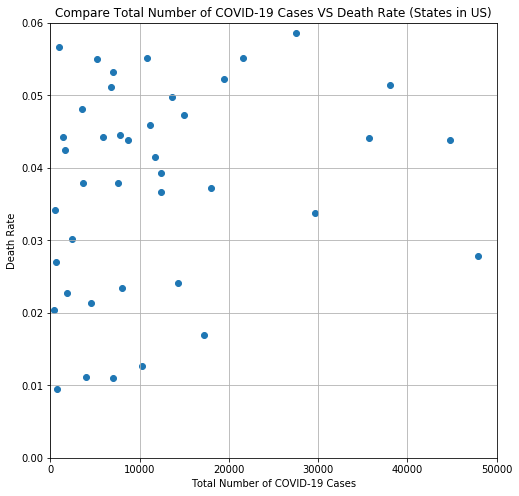

In [246]:
plt.figure(figsize=[8,8])
plt.grid()
plt.title('Compare Total Number of COVID-19 Cases VS Death Rate (States in US)')
plt.scatter(covid_data_USdeathrate.cases,covid_data_USdeathrate.death_rate)
plt.xlim(0,50000)
plt.ylim(0,0.06)
plt.xlabel('Total Number of COVID-19 Cases')
plt.ylabel('Death Rate');

In [247]:
covid_data_latest[covid_data_latest['state'] == 'Kentucky'].sort_values(by='death_rate', ascending=False)

date             county     state  cases  deaths  death_rate  \
50017 2020-05-16    Carlisle County  Kentucky      3       1    0.333333   
50380 2020-05-16  Crittenden County  Kentucky      4       1    0.250000   
52304 2020-05-16        Lyon County  Kentucky     14       3    0.214286   
51524 2020-05-16     Jackson County  Kentucky     57      12    0.210526   
53713 2020-05-16     Russell County  Kentucky     23       4    0.173913   
...          ...                ...       ...    ...     ...         ...   
51261 2020-05-16    Harrison County  Kentucky     19       0    0.000000   
51191 2020-05-16      Harlan County  Kentucky      1       0    0.000000   
51125 2020-05-16     Hancock County  Kentucky      7       0    0.000000   
51078 2020-05-16     Greenup County  Kentucky     13       0    0.000000   
54493 2020-05-16    Woodford County  Kentucky     19       0    0.000000   

       MedianHHInc_2018                State_County  2019EstPop  \
50017           41249.0    Kentucky_Carlisle County      4760.0   
50380           43624.0  Kentucky_Crittenden County      8806.0   
52304           48395.0        Kentucky_Lyon County      8210.0   
51524           35317.0     Kentucky_Jackson County     13329.0   
53713           34648.0     Kentucky_Russell County     17923.0   
...                 ...                         ...         ...   
51261           51709.0    Kentucky_Harrison County     18886.0   
51191           29521.0      Kentucky_Harlan County     26010.0   
51125           56769.0     Kentucky_Hancock County      8722.0   
51078           49457.0     Kentucky_Greenup County     35098.0   
54493           66164.0    Kentucky_Woodford County     26734.0   

       CasesPer100000  DeathsPer100000  Pctile_CasesPer100000  \
50017       63.025210        21.008403               0.327764   
50380       45.423575        11.355894               0.231426   
52304      170.523752        36.540804               0.644863   
51524      427.638983        90.029260               0.866690   
53713      128.326731        22.317692               0.566299   
...               ...              ...                    ...   
51261      100.603622         0.000000               0.490935   
51191        3.844675         0.000000               0.001422   
51125       80.256822         0.000000               0.404195   
51078       37.039148         0.000000               0.174902   
54493       71.070547         0.000000               0.367935   

       Pctile_DeathsPer100000  Pctile_2019EstPop  Diff_Pct2019Pop_VS_PctCases  
50017                0.867401           0.052613                    -0.275151  
50380                0.781728           0.147529                    -0.083896  
52304                0.923569           0.132065                    -0.512798  
51524                0.980448           0.246356                    -0.620334  
53713                0.872734           0.338073                    -0.228226  
...                       ...                ...                          ...  
51261                0.221827           0.353715                    -0.137220  
51191                0.221827           0.458941                     0.457519  
51125                0.221827           0.146107                    -0.258087  
51078                0.221827           0.549947                     0.375044  
54493                0.221827           0.468894                     0.100960  

[114 rows x 15 columns]

In [248]:
covid_data_latest[covid_data_latest['state'] == 'Oklahoma'].sort_values(by='deaths', ascending=False)

date             county     state  cases  deaths  death_rate  \
105056 2020-05-16    Oklahoma County  Oklahoma   1070      46    0.042991   
105883 2020-05-16       Tulsa County  Oklahoma    776      37    0.047680   
103261 2020-05-16   Cleveland County  Oklahoma    466      36    0.077253   
105996 2020-05-16  Washington County  Oklahoma    302      30    0.099338   
105937 2020-05-16     Wagoner County  Oklahoma    136      17    0.125000   
...           ...                ...       ...    ...     ...         ...   
104792 2020-05-16      Murray County  Oklahoma      2       0    0.000000   
104904 2020-05-16       Noble County  Oklahoma      7       0    0.000000   
104954 2020-05-16      Nowata County  Oklahoma     23       0    0.000000   
105108 2020-05-16    Okmulgee County  Oklahoma     18       0    0.000000   
106074 2020-05-16    Woodward County  Oklahoma      1       0    0.000000   

        MedianHHInc_2018                State_County  2019EstPop  \
105056           52346.0    Oklahoma_Oklahoma County    797434.0   
105883           55796.0       Oklahoma_Tulsa County    651552.0   
103261           62343.0   Oklahoma_Cleveland County    284014.0   
105996           53992.0  Oklahoma_Washington County     51527.0   
105937           62889.0     Oklahoma_Wagoner County     81289.0   
...                  ...                         ...         ...   
104792           50031.0      Oklahoma_Murray County     14073.0   
104904           54210.0       Oklahoma_Noble County     11131.0   
104954           45734.0      Oklahoma_Nowata County     10076.0   
105108           42354.0    Oklahoma_Okmulgee County     38465.0   
106074           55134.0    Oklahoma_Woodward County     20211.0   

        CasesPer100000  DeathsPer100000  Pctile_CasesPer100000  \
105056      134.180384         5.768502               0.579097   
105883      119.100241         5.678749               0.542837   
103261      164.076419        12.675431               0.635620   
105996      586.100491        58.221903               0.906861   
105937      167.304309        20.913039               0.640242   
...                ...              ...                    ...   
104792       14.211611         0.000000               0.043015   
104904       62.887431         0.000000               0.326697   
104954      228.265185         0.000000               0.728404   
105108       46.795788         0.000000               0.241379   
106074        4.947801         0.000000               0.002844   

        Pctile_DeathsPer100000  Pctile_2019EstPop  Diff_Pct2019Pop_VS_PctCases  
105056                0.659438           0.972627                     0.393530  
105883                0.655883           0.964451                     0.421614  
103261                0.799502           0.914682                     0.279062  
105996                0.958407           0.665126                    -0.241735  
105937                0.866335           0.757910                     0.117668  
...                        ...                ...                          ...  
104792                0.221827           0.261998                     0.218983  
104904                0.221827           0.200498                    -0.126200  
104954                0.221827           0.176680                    -0.551724  
105108                0.221827           0.580519                     0.339140  
106074                0.221827           0.376466                     0.373622  

[72 rows x 15 columns]

In [249]:
covid_data_latest.sort_values(by='death_rate', ascending=False)

date            county         state  cases  deaths  death_rate  \
83914  2020-05-16    Unknown County        Nevada      0       3         inf   
60356  2020-05-16    Unknown County      Maryland      7      89   12.714286   
96654  2020-05-16     Emmons County  North Dakota      1       1    1.000000   
133032 2020-05-16    Unknown County          Utah      1       1    1.000000   
145847 2020-05-16    Burnett County     Wisconsin      1       1    1.000000   
...           ...               ...           ...    ...     ...         ...   
88924  2020-05-16      Lewis County      New York     13       0    0.000000   
88875  2020-05-16  Jefferson County      New York     71       0    0.000000   
88749  2020-05-16   Hamilton County      New York      5       0    0.000000   
88510  2020-05-16   Franklin County      New York     18       0    0.000000   
150168 2020-05-16   Washakie County       Wyoming      8       0    0.000000   

        MedianHHInc_2018                State_County  2019EstPop  \
83914                NaN       Nevada_Unknown County         NaN   
60356                NaN     Maryland_Unknown County         NaN   
96654            47976.0  North Dakota_Emmons County      3241.0   
133032               NaN         Utah_Unknown County         NaN   
145847           55295.0    Wisconsin_Burnett County     15414.0   
...                  ...                         ...         ...   
88924            52660.0       New York_Lewis County     26296.0   
88875            52798.0   New York_Jefferson County    109834.0   
88749            59020.0    New York_Hamilton County      4416.0   
88510            48722.0    New York_Franklin County     50022.0   
150168           55190.0     Wyoming_Washakie County      7805.0   

        CasesPer100000  DeathsPer100000  Pctile_CasesPer100000  \
83914              NaN              NaN                    NaN   
60356              NaN              NaN                    NaN   
96654        30.854674        30.854674               0.136509   
133032             NaN              NaN                    NaN   
145847        6.487609         6.487609               0.007821   
...                ...              ...                    ...   
88924        49.437177         0.000000               0.253111   
88875        64.643007         0.000000               0.334163   
88749       113.224638         0.000000               0.527195   
88510        35.984167         0.000000               0.168148   
150168      102.498398         0.000000               0.495201   

        Pctile_DeathsPer100000  Pctile_2019EstPop  Diff_Pct2019Pop_VS_PctCases  
83914                      NaN                NaN                          NaN  
60356                      NaN                NaN                          NaN  
96654                 0.904017           0.028795                    -0.107714  
133032                     NaN                NaN                          NaN  
145847                0.686100           0.289726                     0.281905  
...                        ...                ...                          ...  
88924                 0.221827           0.463562                     0.210451  
88875                 0.221827           0.807323                     0.473160  
88749                 0.221827           0.047636                    -0.479559  
88510                 0.221827           0.657305                     0.489157  
150168                0.221827           0.118734                    -0.376466  

[2930 rows x 15 columns]

In [250]:
covid_data_LA_StJohn = covid_data[covid_data['State_County'] == 'Louisiana_St. John the Baptist Parish'][covid_data['date'] > '2020-03-24'][['date', 'cases', 'deaths']]
covid_data_LA_StJohn.set_index('date', inplace=True)
covid_data_LA_StJohn['death_rate'] = covid_data_LA_StJohn['deaths'] / covid_data_LA_StJohn['cases']

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


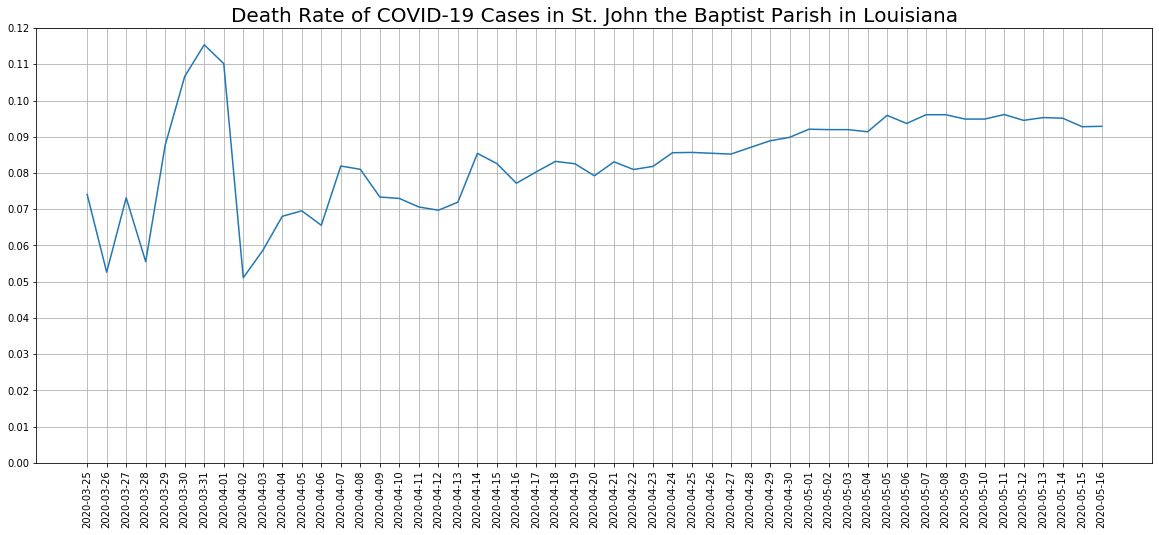

In [251]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Death Rate of COVID-19 Cases in St. John the Baptist Parish in Louisiana', fontsize = '20')
plt.plot(covid_data_LA_StJohn.index, covid_data_LA_StJohn.death_rate)

y_ticks = np.linspace(0,0.12,13)
plt.xticks(covid_data_LA_StJohn.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [252]:
covid_data_LA_StJohn.describe()

cases     deaths  death_rate
count   53.000000  53.000000   53.000000
mean   566.660377  48.830189    0.083765
std    261.707995  25.288897    0.013420
min     27.000000   2.000000    0.051095
25%    415.000000  34.000000    0.074074
50%    669.000000  53.000000    0.085409
75%    772.000000  71.000000    0.092883
max    830.000000  78.000000    0.115385

In [253]:
covid_data_latest_98pct = covid_data_latest[covid_data_latest['Pctile_CasesPer100000'] 
                                            > 0.98][covid_data_latest['Pctile_DeathsPer100000'] 
                                                    > 0.98].sort_values(by='Pctile_CasesPer100000', ascending=False)
covid_data_latest_98pct

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


date                       county          state   cases  deaths  \
89986 2020-05-16              Rockland County       New York   12688     439   
90980 2020-05-16           Westchester County       New York   32096    1398   
85721 2020-05-16               Passaic County     New Jersey   15031     831   
89243 2020-05-16                Nassau County       New York   39033    2507   
85967 2020-05-16                 Union County     New Jersey   14569     946   
86856 2020-05-16              McKinley County     New Mexico    1864      73   
85258 2020-05-16                Hudson County     New Jersey   17326    1045   
90461 2020-05-16               Suffolk County       New York   37942    1783   
27215 2020-05-16              Randolph County        Georgia     169      21   
89320 2020-05-16                New York City       New York  196481   20071   
27975 2020-05-16               Terrell County        Georgia     199      24   
23389 2020-05-16                 Early County        Georgia     233      28   
44849 2020-05-16                  Tama County           Iowa     354      16   
61407 2020-05-16               Suffolk County  Massachusetts   16346     778   
85128 2020-05-16                 Essex County     New Jersey   16032    1522   
21682 2020-05-16               Calhoun County        Georgia     123       7   
57203 2020-05-16  St. John the Baptist Parish      Louisiana     829      77   
14917 2020-05-16                Morgan County       Colorado     557      29   
23272 2020-05-16             Dougherty County        Georgia    1662     134   
84805 2020-05-16                Bergen County     New Jersey   17246    1450   
26185 2020-05-16              Mitchell County        Georgia     388      32   
85451 2020-05-16             Middlesex County     New Jersey   14514     872   
56526 2020-05-16               Orleans Parish      Louisiana    6781     495   
71258 2020-05-16                Holmes County    Mississippi     288      20   

       death_rate  MedianHHInc_2018                           State_County  \
89986    0.034600           88960.0               New York_Rockland County   
90980    0.043557           94521.0            New York_Westchester County   
85721    0.055286           71959.0              New Jersey_Passaic County   
89243    0.064228          115301.0                 New York_Nassau County   
85967    0.064932           80737.0                New Jersey_Union County   
86856    0.039163           33976.0             New Mexico_McKinley County   
85258    0.060314           73337.0               New Jersey_Hudson County   
90461    0.046993          100075.0                New York_Suffolk County   
27215    0.124260           28298.0                Georgia_Randolph County   
89320    0.102152               NaN                 New York_New York City   
27975    0.120603           35290.0                 Georgia_Terrell County   
23389    0.120172           34984.0                   Georgia_Early County   
44849    0.045198           56954.0                       Iowa_Tama County   
61407    0.047596           68743.0           Massachusetts_Suffolk County   
85128    0.094935           62875.0                New Jersey_Essex County   
21682    0.056911           33393.0                 Georgia_Calhoun County   
57203    0.092883           50830.0  Louisiana_St. John the Baptist Parish   
14917    0.052065           55387.0                 Colorado_Morgan County   
23272    0.080626           38806.0               Georgia_Dougherty County   
84805    0.084077          100181.0               New Jersey_Bergen County   
26185    0.082474           36788.0                Georgia_Mitchell County   
85451    0.060080           87666.0            New Jersey_Middlesex County   
56526    0.072998           38855.0               Louisiana_Orleans Parish   
71258    0.069444           26449.0              Mississippi_Holmes County   

       2019EstPop  CasesPer100000  DeathsPer100000  Pctile_C

In [255]:
covid_data_latest_98pct['state'].value_counts()

Georgia          6
New Jersey       6
New York         5
Louisiana        2
New Mexico       1
Colorado         1
Massachusetts    1
Mississippi      1
Iowa             1
Name: state, dtype: int64

In [256]:
covid_data_latest.describe()

cases        deaths   death_rate  MedianHHInc_2018  \
count    2930.000000   2930.000000  2930.000000       2902.000000   
mean      503.280546     30.259386          inf      53089.174363   
std      4272.400581    393.255166          NaN      14096.110534   
min         0.000000      0.000000     0.000000      25385.000000   
25%         9.000000      0.000000     0.000000      43737.000000   
50%        34.000000      1.000000     0.014870      50779.500000   
75%       152.000000      5.000000     0.052632      59327.500000   
max    196481.000000  20071.000000          inf     140382.000000   

         2019EstPop  CasesPer100000  DeathsPer100000  Pctile_CasesPer100000  \
count  2.813000e+03     2813.000000      2813.000000            2813.000000   
mean   1.150385e+05      251.744952        10.321188               0.500178   
std    3.767312e+05      531.295100        23.430297               0.288726   
min    6.250000e+02        3.072952         0.000000               0.000355   
25%    1.362900e+04       49.076142         0.000000               0.250267   
50%    2.965200e+04      103.479949         1.961169               0.500178   
75%    7.697800e+04      254.901666         9.246845               0.750089   
max    1.003911e+07    12247.429989       309.825907               1.000000   

       Pctile_DeathsPer100000  Pctile_2019EstPop  Diff_Pct2019Pop_VS_PctCases  
count             2813.000000        2813.000000                 2.813000e+03  
mean                 0.500178           0.500178                 3.321197e-17  
std                  0.275864           0.288726                 3.507353e-01  
min                  0.221827           0.000355                -9.466761e-01  
25%                  0.221827           0.250267                -2.285816e-01  
50%                  0.500178           0.500178                 1.670814e-02  
75%                  0.750089           0.750089                 2.531106e-01  
max                  1.000000           1.000000                 8.801991e-01

In [260]:
covid_data_latest.sort_values(by='2019EstPop', ascending=False).head(10)

date              county       state   cases  deaths  death_rate  \
10135  2020-05-16  Los Angeles County  California   37303    1793    0.048066   
89320  2020-05-16       New York City    New York  196481   20071    0.102152   
32091  2020-05-16         Cook County    Illinois   61212    2814    0.045971   
126042 2020-05-16       Harris County       Texas    9126     204    0.022354   
4763   2020-05-16     Maricopa County     Arizona    7096     319    0.044955   
11296  2020-05-16    San Diego County  California    5725     235    0.041048   
10791  2020-05-16       Orange County  California    4281      86    0.020089   
19191  2020-05-16   Miami-Dade County     Florida   15365     559    0.036381   
124121 2020-05-16       Dallas County       Texas    7250     170    0.023448   
10985  2020-05-16    Riverside County  California    5618     255    0.045390   

        MedianHHInc_2018                   State_County  2019EstPop  \
10135            67986.0  California_Los Angeles County  10039107.0   
89320                NaN         New York_New York City   8336817.0   
32091            63347.0           Illinois_Cook County   5150233.0   
126042           60241.0            Texas_Harris County   4713325.0   
4763             65234.0        Arizona_Maricopa County   4485414.0   
11296            78777.0    California_San Diego County   3338330.0   
10791            89373.0       California_Orange County   3175692.0   
19191            52043.0      Florida_Miami-Dade County   2716940.0   
124121           59838.0            Texas_Dallas County   2635516.0   
10985            66793.0    California_Riverside County   2470546.0   

        CasesPer100000  DeathsPer100000  Pctile_CasesPer100000  \
10135       371.576874        17.860154               0.838606   
89320      2356.786769       240.751356               0.989335   
32091      1188.528752        54.638305               0.969072   
126042      193.621276         4.328155               0.683967   
4763        158.201673         7.111941               0.624956   
11296       171.492932         7.039448               0.646285   
10791       134.805264         2.708071               0.580519   
19191       565.525923        20.574617               0.903306   
124121      275.088446         6.450350               0.770707   
10985       227.399126        10.321605               0.726982   

        Pctile_DeathsPer100000  Pctile_2019EstPop  Diff_Pct2019Pop_VS_PctCases  
10135                 0.843939           1.000000                     0.161394  
89320                 0.998934           0.999645                     0.010309  
32091                 0.957341           0.999289                     0.030217  
126042                0.612158           0.998934                     0.314966  
4763                  0.705297           0.998578                     0.373622  
11296                 0.702453           0.998223                     0.351937  
10791                 0.546036           0.997867                     0.417348  
19191                 0.864913           0.997512                     0.094205  
124121                0.684323           0.997156                     0.226449  
10985                 0.769996           0.996801                     0.269819

In [263]:
covid_data_latest[covid_data_latest['state'] == 'California'].sort_values(by='cases', ascending=False)

date                  county       state  cases  deaths  \
10135 2020-05-16      Los Angeles County  California  37303    1793   
11296 2020-05-16        San Diego County  California   5725     235   
10985 2020-05-16        Riverside County  California   5618     255   
10791 2020-05-16           Orange County  California   4281      86   
11199 2020-05-16   San Bernardino County  California   3463     155   
11779 2020-05-16      Santa Clara County  California   2418     137   
9106  2020-05-16          Alameda County  California   2372      85   
11401 2020-05-16    San Francisco County  California   2065      36   
11609 2020-05-16        San Mateo County  California   1612      67   
9931  2020-05-16             Kern County  California   1483      25   
12377 2020-05-16           Tulare County  California   1426      67   
11672 2020-05-16    Santa Barbara County  California   1412      11   
11071 2020-05-16       Sacramento County  California   1221      55   
9622  2020-05-16           Fresno County  California   1192      16   
9449  2020-05-16     Contra Costa County  California   1121      33   
12511 2020-05-16          Ventura County  California    789      25   
9817  2020-05-16         Imperial County  California    786      14   
11469 2020-05-16      San Joaquin County  California    670      31   
12207 2020-05-16       Stanislaus County  California    559      24   
12059 2020-05-16           Solano County  California    415      16   
9982  2020-05-16            Kings County  California    392       2   
12140 2020-05-16           Sonoma County  California    373       4   
10535 2020-05-16         Monterey County  California    321       8   
10287 2020-05-16            Marin County  California    299      14   
11533 2020-05-16  San Luis Obispo County  California    243       1   
10420 2020-05-16           Merced County  California    200       6   
12583 2020-05-16             Yolo County  California    183      22   
10867 2020-05-16           Placer County  California    174       9   
11850 2020-05-16       Santa Cruz County  California    149       3   
10616 2020-05-16             Napa County  California     91       3   
9759  2020-05-16         Humboldt County  California     77       0   
10206 2020-05-16           Madera County  California     71       2   
9551  2020-05-16        El Dorado County  California     64       0   
11136 2020-05-16       San Benito County  California     61       2   
10678 2020-05-16           Nevada County  California     41       1   
12260 2020-05-16           Sutter County  California     38       2   
11919 2020-05-16           Shasta County  California     34       4   
10474 2020-05-16             Mono County  California     33       1   
12640 2020-05-16             Yuba County  California     25       1   
9269  2020-05-16            Butte County  California     22       0   
9870  2020-05-16             Inyo County  California     20       1   
10306 2020-05-16         Mariposa County  California     15       1   
9323  2020-05-16        Calaveras County  California     13       0   
10366 2020-05-16        Mendocino County  California     13       0   
9672  2020-05-16            Glenn County  California      9       0   
9212  2020-05-16           Amador County  California      8       0   
10023 2020-05-16             Lake County  California      8       0   
11976 2020-05-16         Siskiyou County  California      5       0   
9494  2020-05-16        Del Norte County  California      5       0   
10914 2020-05-16           Plumas County  California      4       0   
9374  2020-05-16           Colusa County  California      3       0   
9154  2020-05-16           Alpine County  California      2       0   
12304 2020-05-16           Tehama County  California      2       1   
12311 2020-05-16          Trinity County  California      2       0   
12426 2020-05-16         Tuolumne County  California      2       0   

       death_rate  MedianHHInc_2018

In [265]:
covid_data_latest[covid_data_latest['state'] == 'Michigan'].sort_values(by='cases', ascending=False)

date           county     state  cases  deaths  death_rate  \
65729 2020-05-16     Wayne County  Michigan  19016    2212    0.116323   
64696 2020-05-16   Oakland County  Michigan   8023     910    0.113424   
64007 2020-05-16    Macomb County  Michigan   6304     739    0.117227   
63585 2020-05-16      Kent County  Michigan   2766      54    0.019523   
65542 2020-05-16   Unknown County  Michigan   2336      59    0.025257   
...          ...              ...       ...    ...     ...         ...   
62322 2020-05-16  Chippewa County  Michigan      3       0    0.000000   
63621 2020-05-16      Lake County  Michigan      3       0    0.000000   
63896 2020-05-16      Luce County  Michigan      2       0    0.000000   
63073 2020-05-16  Houghton County  Michigan      2       0    0.000000   
61790 2020-05-16    Baraga County  Michigan      1       0    0.000000   

       MedianHHInc_2018              State_County  2019EstPop  CasesPer100000  \
65729           46440.0     Michigan_Wayne County   1749343.0     1087.036676   
64696           80319.0   Michigan_Oakland County   1257584.0      637.969313   
64007           62191.0    Michigan_Macomb County    873972.0      721.304573   
63585           61675.0      Michigan_Kent County    656955.0      421.033404   
65542               NaN   Michigan_Unknown County         NaN             NaN   
...                 ...                       ...         ...             ...   
62322           47380.0  Michigan_Chippewa County     37349.0        8.032344   
63621           36044.0      Michigan_Lake County     11853.0       25.310048   
63896           43196.0      Michigan_Luce County      6229.0       32.107882   
63073           42282.0  Michigan_Houghton County     35684.0        5.604753   
61790           43435.0    Michigan_Baraga County      8209.0       12.181752   

       DeathsPer100000  Pctile_CasesPer100000  Pctile_DeathsPer100000  \
65729       126.447472               0.963029                0.992179   
64696        72.360972               0.920014                0.973694   
64007        84.556485               0.932812                0.978670   
63585         8.219741               0.864202                0.728048   
65542              NaN                    NaN                     NaN   
...                ...                    ...                     ...   
62322         0.000000               0.011376                0.221827   
63621         0.000000               0.109136                0.221827   
63896         0.000000               0.142908                0.221827   
63073         0.000000               0.003555                0.221827   
61790         0.000000               0.028439                0.221827   

       Pctile_2019EstPop  Diff_Pct2019Pop_VS_PctCases  
65729           0.993957                     0.030928  
64696           0.989335                     0.069321  
64007           0.977959                     0.045148  
63585           0.965162                     0.100960  
65542                NaN                          NaN  
...                  ...                          ...  
62322           0.571276                     0.559900  
63621           0.212940                     0.103804  
63896           0.085496                    -0.057412  
63073           0.555279                     0.551724  
61790           0.131532                     0.103093  

[80 rows x 15 columns]

In [266]:
covid_data_latest[covid_data_latest['state'] == 'New York'].sort_values(by='cases', ascending=False)

date               county     state   cases  deaths  death_rate  \
89320 2020-05-16        New York City  New York  196481   20071    0.102152   
89243 2020-05-16        Nassau County  New York   39033    2507    0.064228   
90461 2020-05-16       Suffolk County  New York   37942    1783    0.046993   
90980 2020-05-16   Westchester County  New York   32096    1398    0.043557   
89986 2020-05-16      Rockland County  New York   12688     439    0.034600   
89626 2020-05-16        Orange County  New York    9894     342    0.034566   
88397 2020-05-16          Erie County  New York    4867     428    0.087939   
88334 2020-05-16      Dutchess County  New York    3527     126    0.035724   
89107 2020-05-16        Monroe County  New York    2193     165    0.075239   
87629 2020-05-16        Albany County  New York    1572     127    0.080789   
90720 2020-05-16        Ulster County  New York    1537      41    0.026675   
89498 2020-05-16      Onondaga County  New York    1469      91    0.061947   
90522 2020-05-16      Sullivan County  New York    1217      24    0.019721   
89853 2020-05-16        Putnam County  New York    1127      59    0.052351   
89378 2020-05-16       Niagara County  New York     770      39    0.050649   
89436 2020-05-16        Oneida County  New York     751      33    0.043941   
90122 2020-05-16   Schenectady County  New York     613      27    0.044046   
89914 2020-05-16    Rensselaer County  New York     438      30    0.068493   
90057 2020-05-16      Saratoga County  New York     423       3    0.007092   
87755 2020-05-16        Broome County  New York     413      32    0.077482   
88146 2020-05-16      Columbia County  New York     338      30    0.088757   
89040 2020-05-16       Madison County  New York     258       3    0.011628   
90391 2020-05-16       Steuben County  New York     233      18    0.077253   
90787 2020-05-16        Warren County  New York     228      27    0.118421   
90847 2020-05-16    Washington County  New York     218      11    0.050459   
88689 2020-05-16        Greene County  New York     211       3    0.014218   
90334 2020-05-16  St. Lawrence County  New York     192       2    0.010417   
88626 2020-05-16       Genesee County  New York     178       3    0.016854   
89680 2020-05-16       Orleans County  New York     163      17    0.104294   
88568 2020-05-16        Fulton County  New York     148      11    0.074324   
89560 2020-05-16       Ontario County  New York     139       7    0.050360   
90650 2020-05-16      Tompkins County  New York     138       2    0.014493   
87967 2020-05-16       Chemung County  New York     134       5    0.037313   
88027 2020-05-16      Chenango County  New York     115       2    0.017391   
90586 2020-05-16         Tioga County  New York     112      16    0.142857   
88984 2020-05-16    Livingston County  New York     107       4    0.037383   
90906 2020-05-16         Wayne County  New York      92       1    0.010870   
88815 2020-05-16      Herkimer County  New York      91       1    0.010989   
88088 2020-05-16       Clinton County  New York      91       4    0.043956   
89735 2020-05-16        Oswego County  New York      83       0    0.000000   
91041 2020-05-16       Wyoming County  New York      78       3    0.038462   
89170 2020-05-16    Montgomery County  New York      75       3    0.040000   
88875 2020-05-16     Jefferson County  New York      71       0    0.000000   
88268 2020-05-16      Delaware County  New York      68       0    0.000000   
89790 2020-05-16        Otsego County  New York      67       5    0.074627   
87805 2020-05-16   Cattaraugus County  New York      65       1    0.015385   
87860 2020-05-16        Cayuga County  New York      63       1    0.015873   
90278 2020-05-16        Seneca County  New York      50       0    0.000000   
87913 2020-05-16    Chautauqua County  New York      48       3    0.062500   
90181 2020-05-16     Schoharie County  New York      47       

In [267]:
covid_data_latest[covid_data_latest['state'] == 'Louisiana'].sort_values(by='cases', ascending=False)

date                   county      state  cases  deaths  \
55956 2020-05-16         Jefferson Parish  Louisiana   6982     427   
56526 2020-05-16           Orleans Parish  Louisiana   6781     495   
55452 2020-05-16  East Baton Rouge Parish  Louisiana   3009     208   
55027 2020-05-16             Caddo Parish  Louisiana   1864     155   
57439 2020-05-16       St. Tammany Parish  Louisiana   1528     142   
...          ...                      ...        ...    ...     ...   
57817 2020-05-16            Vernon County  Louisiana     20       2   
55716 2020-05-16             Grant County  Louisiana     20       1   
58037 2020-05-16      West Carroll County  Louisiana     12       0   
57533 2020-05-16            Tensas County  Louisiana      5       0   
55171 2020-05-16           Cameron County  Louisiana      3       0   

       death_rate  MedianHHInc_2018                       State_County  \
55956    0.061157           50871.0         Louisiana_Jefferson Parish   
56526    0.072998           38855.0           Louisiana_Orleans Parish   
55452    0.069126           52945.0  Louisiana_East Baton Rouge Parish   
55027    0.083155           40467.0             Louisiana_Caddo Parish   
57439    0.092932           67054.0       Louisiana_St. Tammany Parish   
...           ...               ...                                ...   
57817    0.100000           47664.0            Louisiana_Vernon County   
55716    0.050000           43502.0             Louisiana_Grant County   
58037    0.000000           39332.0      Louisiana_West Carroll County   
57533    0.000000           28962.0            Louisiana_Tensas County   
55171    0.000000           57299.0           Louisiana_Cameron County   

       2019EstPop  CasesPer100000  DeathsPer100000  Pctile_CasesPer100000  \
55956    432493.0     1614.361389        98.729922               0.979026   
56526    390144.0     1738.076198       126.876230               0.980803   
55452    440059.0      683.771949        47.266389               0.927835   
55027    240204.0      776.007061        64.528484               0.940277   
57439    260419.0      586.746743        54.527511               0.908283   
...           ...             ...              ...                    ...   
57817         NaN             NaN              NaN                    NaN   
55716         NaN             NaN              NaN                    NaN   
58037         NaN             NaN              NaN                    NaN   
57533         NaN             NaN              NaN                    NaN   
55171         NaN             NaN              NaN                    NaN   

       Pctile_DeathsPer100000  Pctile_2019EstPop  Diff_Pct2019Pop_VS_PctCases  
55956                0.984003           0.943121                    -0.035905  
56526                0.992890           0.937078                    -0.043726  
55452                0.944543           0.944188                     0.016353  
55027                0.965162           0.902240                    -0.038038  
57439                0.956985           0.907216                    -0.001066  
...                       ...                ...                          ...  
57817                     NaN                NaN                          NaN  
55716                     NaN                NaN                          NaN  
58037                     NaN                NaN                          NaN  
57533                     NaN                NaN                          NaN  
55171                     NaN                NaN                          NaN  

[65 rows x 15 columns]

In [268]:
covid_data_LA_Orleans = covid_data[covid_data['state'] == 'Louisiana'][covid_data['county'] == 'Orleans Parish']
covid_data_LA_Orleans = covid_data_LA_Orleans[['date', 'cases', 'deaths']]
covid_data_LA_Orleans.set_index('date', inplace=True)

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


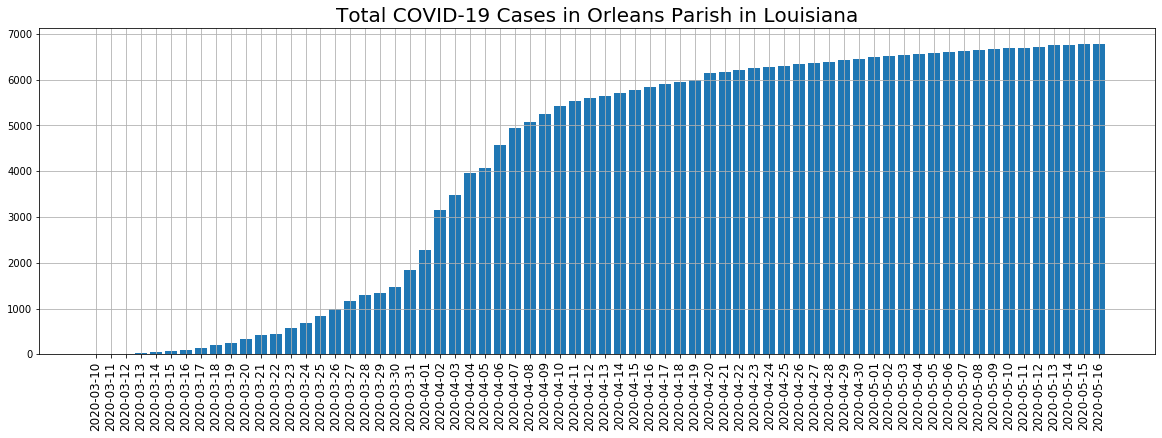

In [269]:
plt.figure(figsize=[20,6])
plt.grid()
plt.title('Total COVID-19 Cases in Orleans Parish in Louisiana', fontsize = '20')
plt.bar(covid_data_LA_Orleans.index, covid_data_LA_Orleans.cases)
plt.xticks(covid_data_LA_Orleans.index, fontsize = '12', rotation = 90);

In [270]:
covid_data_LA_Orleans_daily = covid_data_LA_Orleans.diff()
covid_data_LA_Orleans_daily.columns = ['newcases_daily', 'newdeaths_daily']

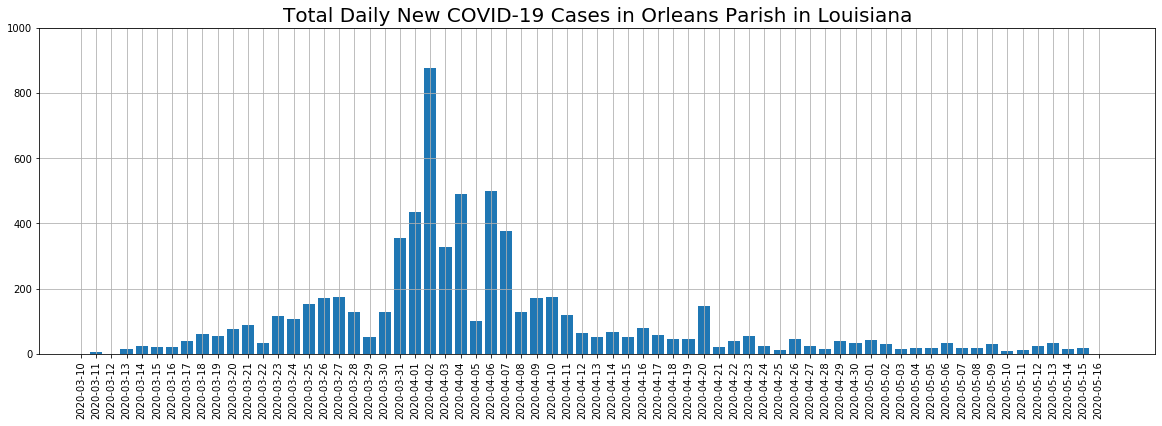

In [271]:
plt.figure(figsize=[20,6])
plt.grid()
plt.title('Total Daily New COVID-19 Cases in Orleans Parish in Louisiana', fontsize = '20')
plt.bar(covid_data_LA_Orleans_daily.index, covid_data_LA_Orleans_daily.newcases_daily)
plt.xticks(covid_data_LA_Orleans_daily.index, fontsize = '10', rotation = 90)
plt.ylim(0,1000);

In [272]:
# large spike on 2020-03-13 so look at data after that date
covid_data_LA_Orleans_pct = covid_data_LA_Orleans[covid_data_LA_Orleans.index > '2020-03-13'].pct_change()
covid_data_LA_Orleans_pct.columns = ['cases_dailypctchange', 'deaths_dailypctchange']

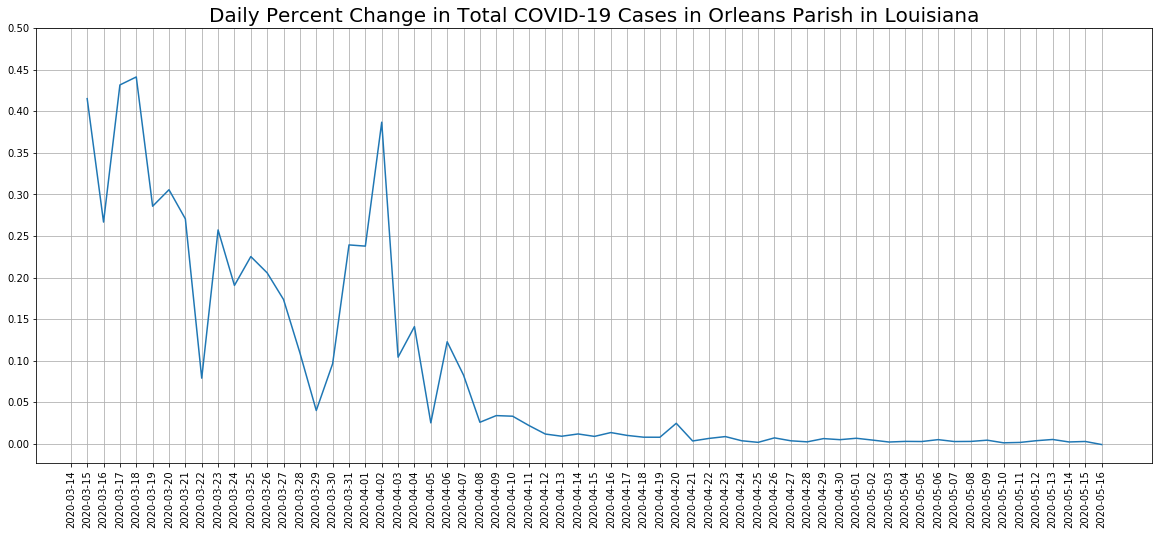

In [273]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily Percent Change in Total COVID-19 Cases in Orleans Parish in Louisiana', fontsize = '20')
plt.plot(covid_data_LA_Orleans_pct.index, covid_data_LA_Orleans_pct.cases_dailypctchange)

y_ticks = np.linspace(0,0.5,11)
plt.xticks(covid_data_LA_Orleans_pct.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [274]:
covid_data_NYC = covid_data[covid_data['state'] == 'New York'][covid_data['county'] == 'New York City'][covid_data['date'] > '2020-03-17']

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


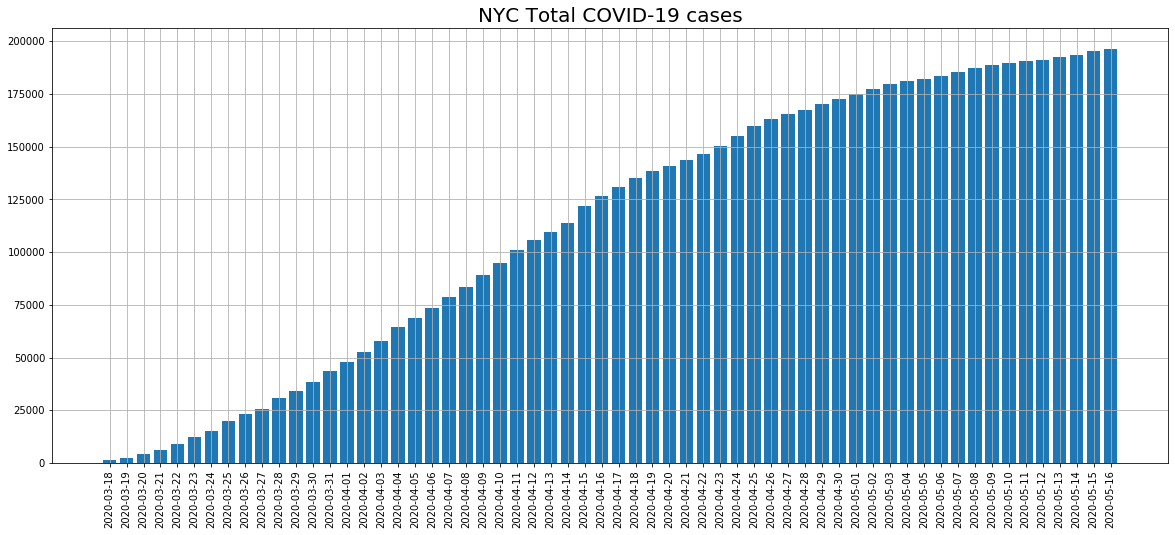

In [275]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('NYC Total COVID-19 cases', fontsize = '20')
plt.bar(covid_data_NYC.date,covid_data_NYC.cases)

# y_ticks = np.linspace(0,160000,17)
plt.xticks(covid_data_NYC.date, fontsize = '10', rotation = 90);
# plt.yticks(y_ticks);

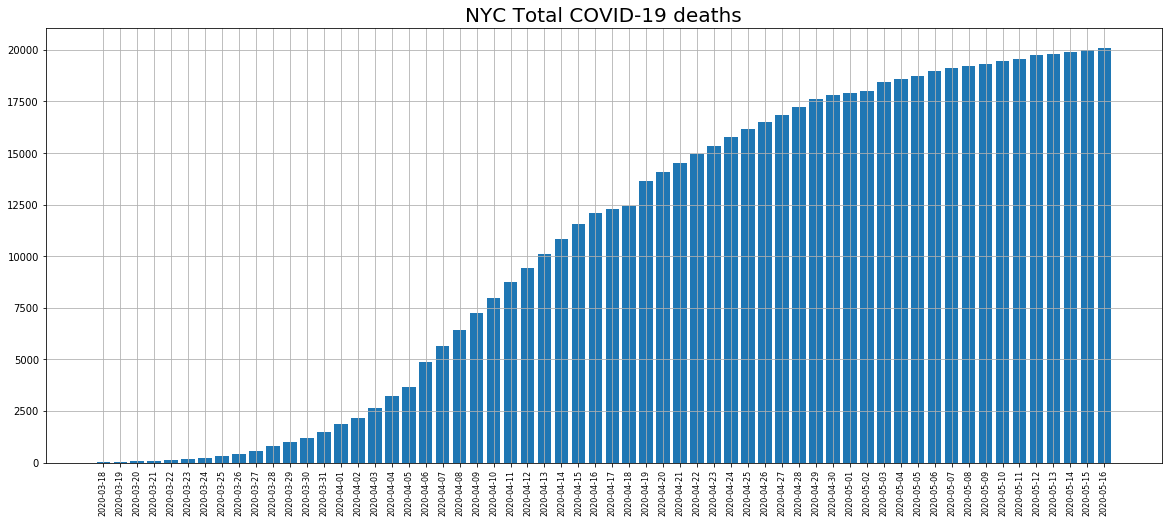

In [276]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('NYC Total COVID-19 deaths', fontsize = '20')
plt.bar(covid_data_NYC.date,covid_data_NYC.deaths)

# y_ticks = np.linspace(0,12000,13)
plt.xticks(covid_data_NYC.date, fontsize = '8', rotation = 90);
# plt.yticks(y_ticks);

In [277]:
covid_data_NYC_deathrate = covid_data_NYC[covid_data_NYC['date'] > '2020-03-13'][['date', 'cases', 'deaths']]
covid_data_NYC_deathrate.set_index('date', inplace=True)
covid_data_NYC_deathrate['death_rate'] = covid_data_NYC_deathrate['deaths'] / covid_data_NYC_deathrate['cases']

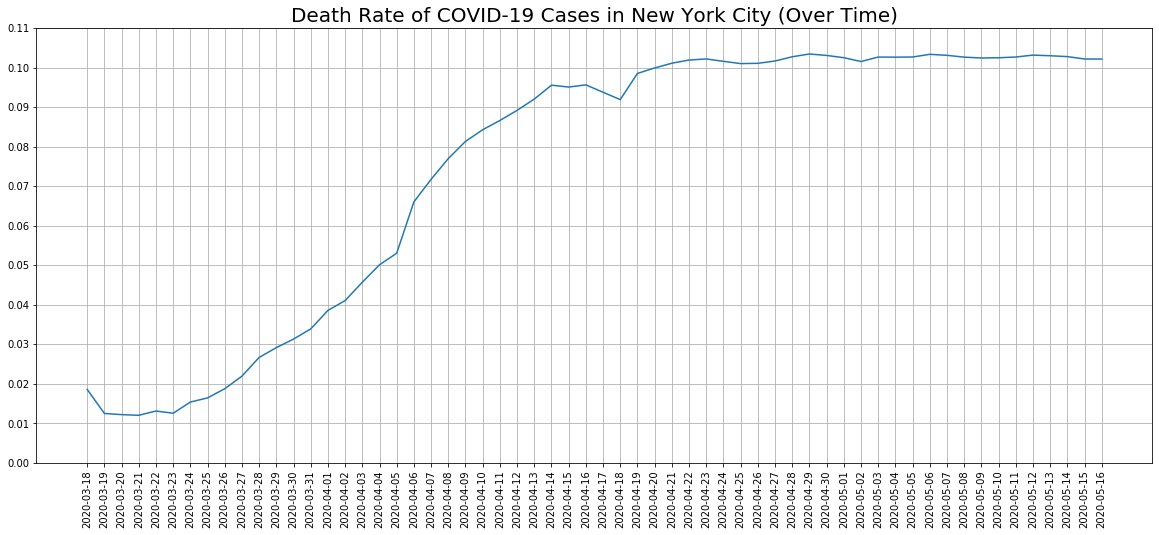

In [280]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Death Rate of COVID-19 Cases in New York City (Over Time)', fontsize = '20')
plt.plot(covid_data_NYC_deathrate.index, covid_data_NYC_deathrate.death_rate)

y_ticks = np.linspace(0,0.11,12)
plt.xticks(covid_data_NYC_deathrate.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [281]:
covid_data_NYC_summ = covid_data_NYC[covid_data_NYC['date'] > '2020-03-17'].groupby('date')['cases','deaths'].sum()

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [282]:
covid_data_NYC_daily = covid_data[covid_data['state'] == 'New York'][covid_data['county'] == 'New York City'][covid_data['date'] > '2020-03-18']
covid_data_NYC_daily = covid_data_NYC_daily[['date', 'cases', 'deaths']]
covid_data_NYC_daily.set_index('date', inplace=True)

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [283]:
covid_data_NYC_daily = covid_data_NYC_daily.diff()
covid_data_NYC_daily.columns = ['cases_newdaily', 'deaths_newdaily']

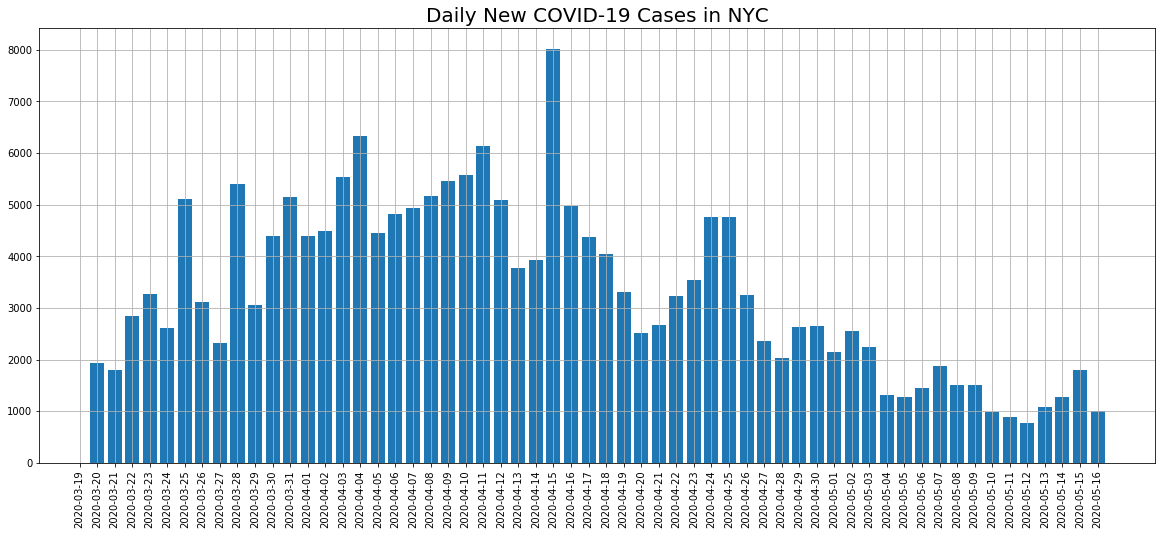

In [284]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily New COVID-19 Cases in NYC', fontsize = '20')
plt.bar(covid_data_NYC_daily.index,covid_data_NYC_daily.cases_newdaily)
plt.xticks(covid_data_NYC_daily.index, fontsize = '10', rotation = 90);

In [285]:
covid_data_NYC_summ_pct = covid_data_NYC_summ.pct_change()
covid_data_NYC_summ_pct.columns = ['cases_dailypctchange', 'deaths_dailypctchange']

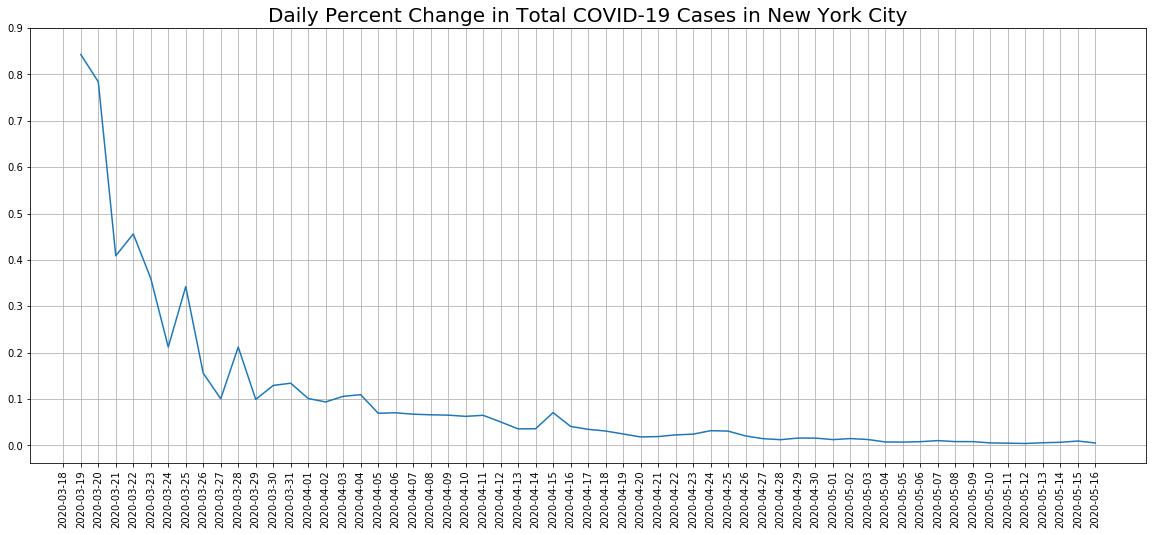

In [286]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily Percent Change in Total COVID-19 Cases in New York City', fontsize = '20')
plt.plot(covid_data_NYC_summ_pct.index, covid_data_NYC_summ_pct.cases_dailypctchange)

y_ticks = np.linspace(0,0.9,10)
plt.xticks(covid_data_NYC_summ_pct.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

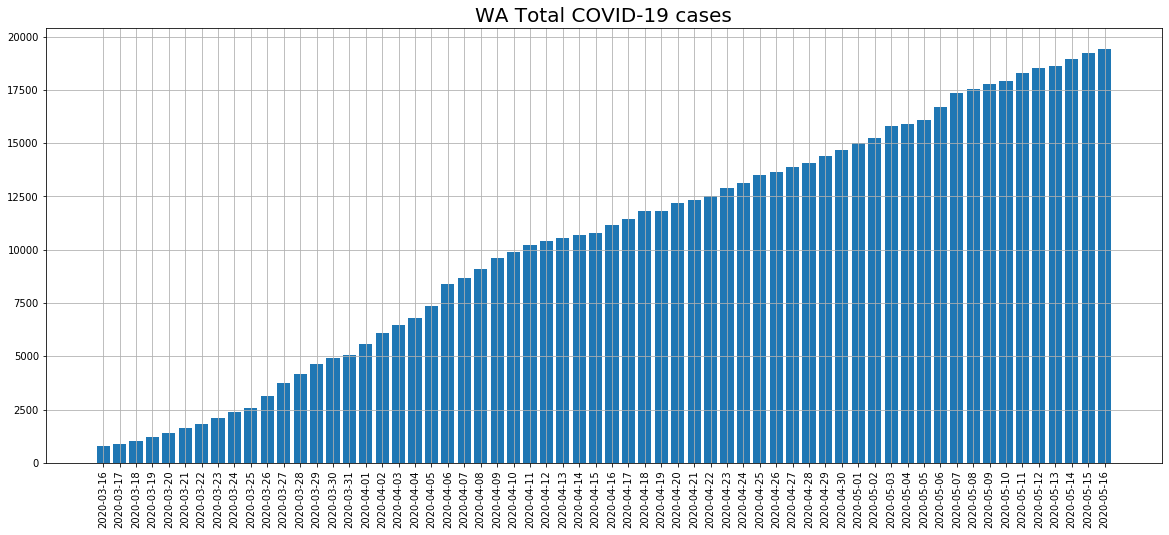

In [287]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('WA Total COVID-19 cases', fontsize = '20')
plt.bar(covid_st_WA_summ.index,covid_st_WA_summ.cases)

# y_ticks = np.linspace(0,14000,8)
plt.xticks(covid_st_WA_summ.index, fontsize = '10', rotation = 90);
# plt.yticks(y_ticks);

In [289]:
covid_data_latest[covid_data_latest['state'] == 'Washington'].sort_values(by='cases', ascending=False).head(20)

date              county       state  cases  deaths  death_rate  \
141750 2020-05-16         King County  Washington   7759     528    0.068050   
142643 2020-05-16    Snohomish County  Washington   3071     125    0.040703   
143174 2020-05-16       Yakima County  Washington   2349      76    0.032354   
142349 2020-05-16       Pierce County  Washington   1793      68    0.037925   
140903 2020-05-16       Benton County  Washington    773      57    0.073739   
141401 2020-05-16     Franklin County  Washington    564      17    0.030142   
142475 2020-05-16       Skagit County  Washington    425      14    0.032941   
141108 2020-05-16        Clark County  Washington    401      25    0.062344   
142726 2020-05-16      Spokane County  Washington    400      30    0.075000   
143052 2020-05-16      Whatcom County  Washington    347      35    0.100865   
141466 2020-05-16        Grant County  Washington    223       2    0.008969   
141599 2020-05-16       Island County  Washington    181      10    0.055249   
140977 2020-05-16       Chelan County  Washington    178       7    0.039326   
141820 2020-05-16       Kitsap County  Washington    159       2    0.012579   
141287 2020-05-16      Douglas County  Washington    127       3    0.023622   
142851 2020-05-16     Thurston County  Washington    127       1    0.007874   
142984 2020-05-16  Walla Walla County  Washington    107       2    0.018692   
141232 2020-05-16      Cowlitz County  Washington     68       0    0.000000   
141891 2020-05-16     Kittitas County  Washington     51       0    0.000000   
140799 2020-05-16        Adams County  Washington     50       0    0.000000   

        MedianHHInc_2018                   State_County  2019EstPop  \
141750           94822.0         Washington_King County   2252782.0   
142643           87096.0    Washington_Snohomish County    822083.0   
143174           51377.0       Washington_Yakima County    250873.0   
142349           75022.0       Washington_Pierce County    904980.0   
140903           69212.0       Washington_Benton County    204390.0   
141401           60483.0     Washington_Franklin County     95222.0   
142475           70955.0       Washington_Skagit County    129205.0   
141108           73971.0        Washington_Clark County    488241.0   
142726           59408.0      Washington_Spokane County    522798.0   
143052           62262.0      Washington_Whatcom County    229247.0   
141466           53688.0        Washington_Grant County     97733.0   
141599           65987.0       Washington_Island County     85141.0   
140977           57243.0       Washington_Chelan County     77200.0   
141820           76530.0       Washington_Kitsap County    271473.0   
141287           65912.0      Washington_Douglas County     43429.0   
142851           72400.0     Washington_Thurston County    290536.0   
142984           57329.0  Washington_Walla Walla County     60760.0   
141232           58624.0      Washington_Cowlitz County    110593.0   
141891           55624.0     Washington_Kittitas County     47935.0   
140799           52012.0        Washington_Adams County     19983.0   

        CasesPer100000  DeathsPer100000  Pctile_CasesPer100000  \
141750      344.418590        23.437687               0.821187   
142643      373.563253        15.205277               0.838962   
143174      936.330334        30.294213               0.951298   
142349      198.125925         7.513978               0.691077   
140903      378.198542        27.887861               0.843228   
141401      592.300099        17.853017               0.910060   
142475      328.934639        10.835494               0.812656   
141108       82.131570         5.120422               0.412016   
142726       76.511387         5.738354               0.392464   
143052      151.365121        15.267375               0.614646   
141466      228.172675         2.046392               0.727693   
141599      212.588530        11.745223         

In [325]:
covid_data_WA_King = covid_data[covid_data['county'] == 'King County'][covid_data['state'] == 'Washington']
covid_data_WA_King = covid_data_WA_King[['date', 'cases', 'deaths']]

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [326]:
covid_data_WA_King.set_index('date',inplace=True)

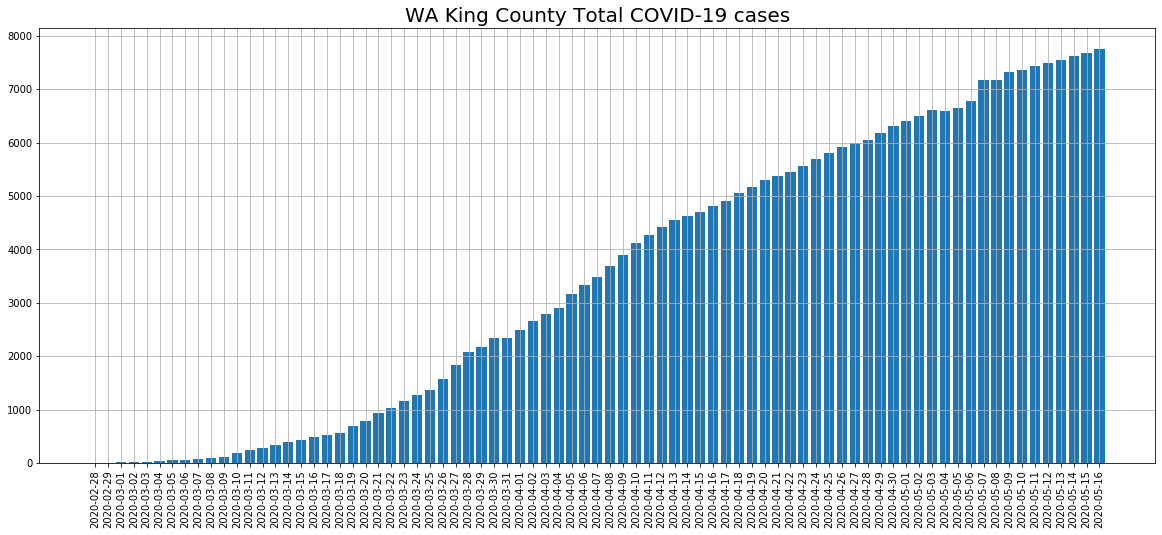

In [327]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('WA King County Total COVID-19 cases', fontsize = '20')
plt.bar(covid_data_WA_King.index,covid_data_WA_King.cases)

# y_ticks = np.linspace(0,6500,14)
plt.xticks(covid_data_WA_King.index, fontsize = '10', rotation = 90);
# plt.yticks(y_ticks);

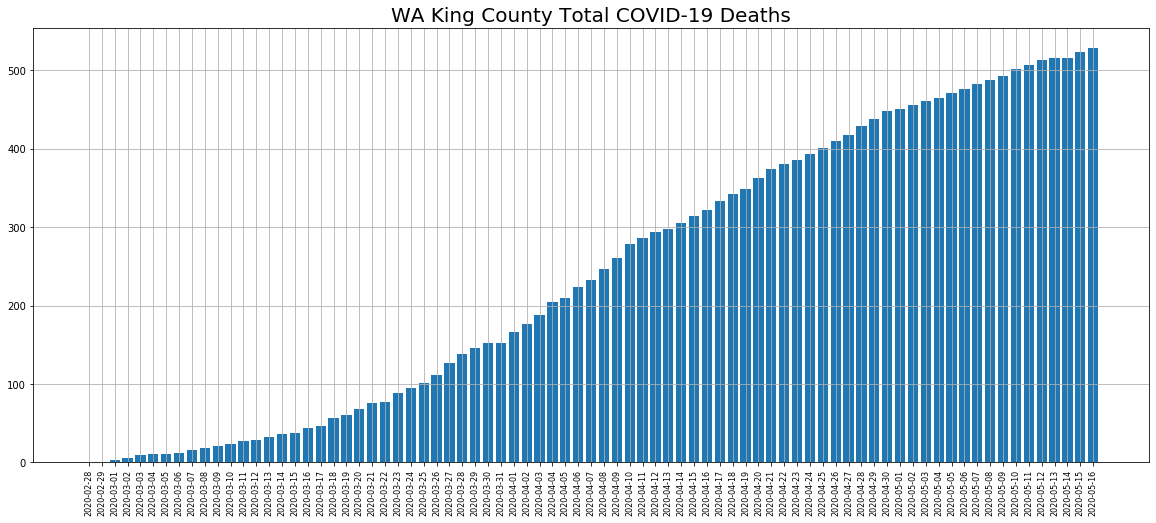

In [328]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('WA King County Total COVID-19 Deaths', fontsize = '20')
plt.bar(covid_data_WA_King.index,covid_data_WA_King.deaths)

plt.xticks(covid_data_WA_King.index, fontsize = '8', rotation = 90);

In [332]:
covid_data_WA_King_daily = covid_data_WA_King[covid_data_WA_King.index > '2020-03-02'].diff()
covid_data_WA_King_daily.columns = ['newcases_daily', 'newdeaths_daily']

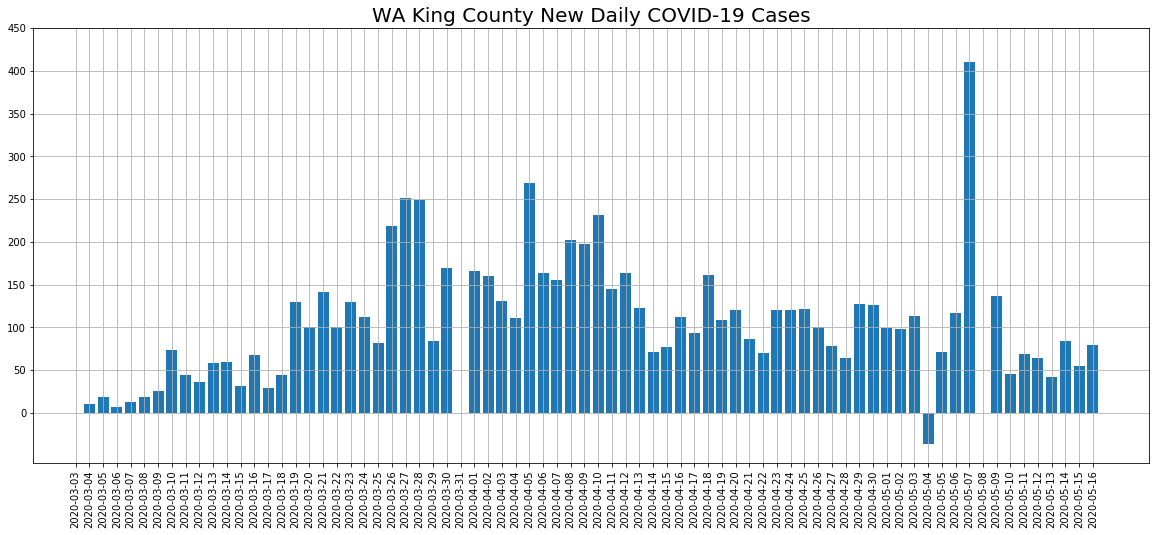

In [335]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('WA King County New Daily COVID-19 Cases', fontsize = '20')
plt.bar(covid_data_WA_King_daily.index,covid_data_WA_King_daily.newcases_daily)

y_ticks = np.linspace(0,450,10)
plt.xticks(covid_data_WA_King_daily.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [336]:
covid_data_WA_King_pctchange = covid_data_WA_King[covid_data_WA_King.index > '2020-03-02'].pct_change()
covid_data_WA_King_pctchange.columns = ['cases_dailypctchange', 'deaths_dailypctchange']

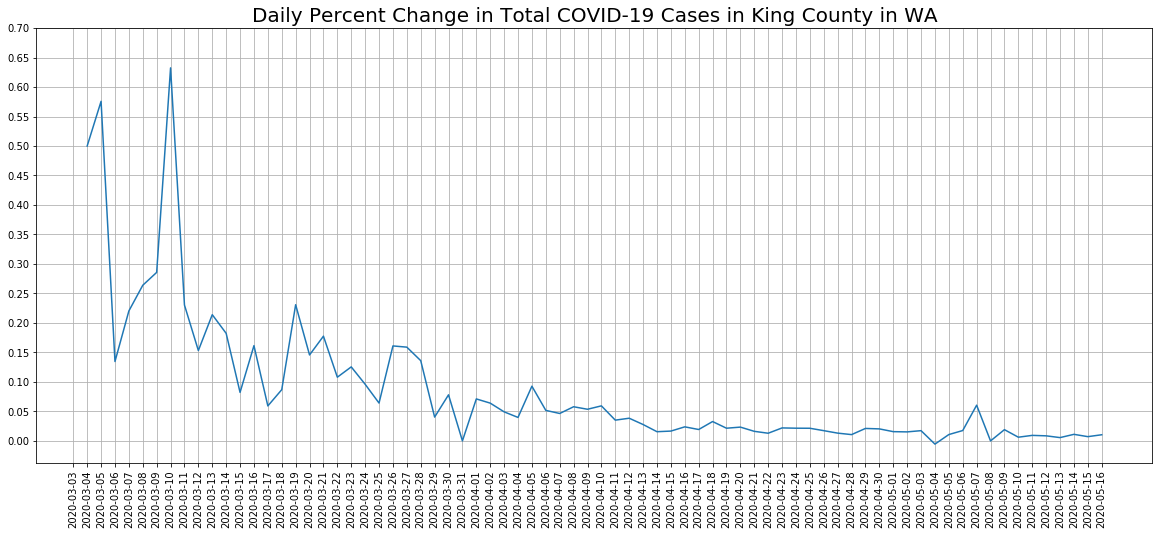

In [340]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily Percent Change in Total COVID-19 Cases in King County in WA', fontsize = '20')
plt.plot(covid_data_WA_King_pctchange.index, covid_data_WA_King_pctchange.cases_dailypctchange)

y_ticks = np.linspace(0,0.7,15)
plt.xticks(covid_data_WA_King_pctchange.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [341]:
covid_data_WA_King['death_rate'] = covid_data_WA_King['deaths'] / covid_data_WA_King['cases']

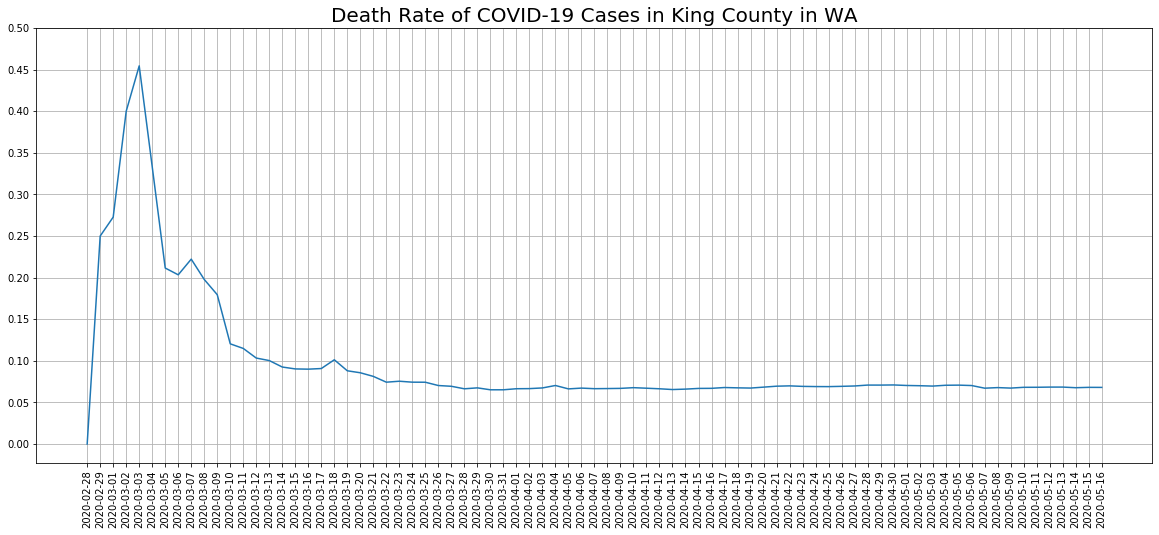

In [343]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Death Rate of COVID-19 Cases in King County in WA', fontsize = '20')
plt.plot(covid_data_WA_King.index, covid_data_WA_King.death_rate)

y_ticks = np.linspace(0,0.5,11)
plt.xticks(covid_data_WA_King.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [344]:
covid_data_NY_WC = covid_data[covid_data['state'] == 'New York'][covid_data['county'] == 'Westchester County']

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [345]:
covid_data_NY_WC_summ = covid_data_NY_WC.groupby('date')['cases','deaths'].sum()

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


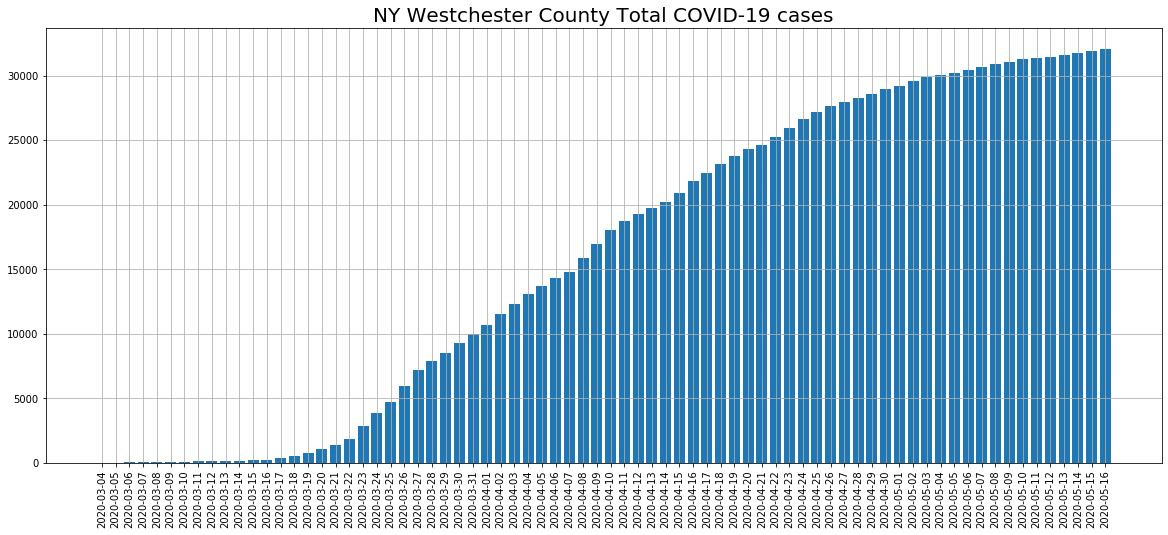

In [347]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('NY Westchester County Total COVID-19 cases', fontsize = '20')
plt.bar(covid_data_NY_WC_summ.index,covid_data_NY_WC_summ.cases)

# y_ticks = np.linspace(0,30000,16)
plt.xticks(covid_data_NY_WC_summ.index, fontsize = '10', rotation = 90);
# plt.yticks(y_ticks);

In [350]:
covid_data_NY_WC_daily = covid_data_NY_WC_summ.diff()
covid_data_NY_WC_daily.columns = ['cases_newdaily', 'deaths_newdaily']

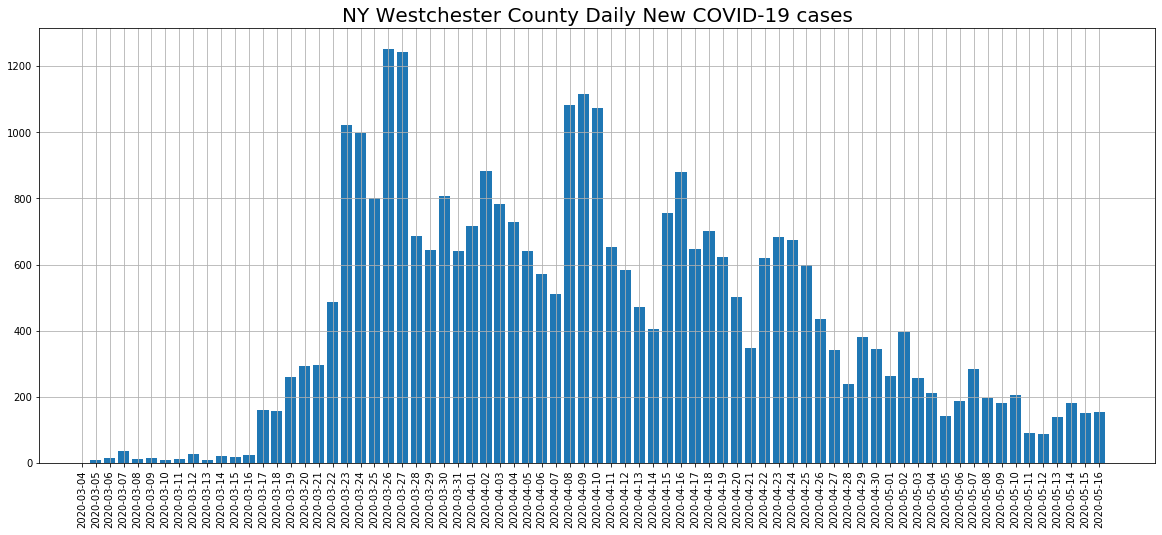

In [351]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('NY Westchester County Daily New COVID-19 cases', fontsize = '20')
plt.bar(covid_data_NY_WC_daily.index, covid_data_NY_WC_daily.cases_newdaily)

plt.xticks(covid_data_NY_WC_daily.index, fontsize = '10', rotation = 90);

In [352]:
# big spike on 2020-03-07 so look at data after that date
covid_data_NY_WC_pct = covid_data_NY_WC_summ[covid_data_NY_WC_summ.index > '2020-03-07'].pct_change()
covid_data_NY_WC_pct.columns = ['cases_dailypctchange', 'deaths_dailypctchange']

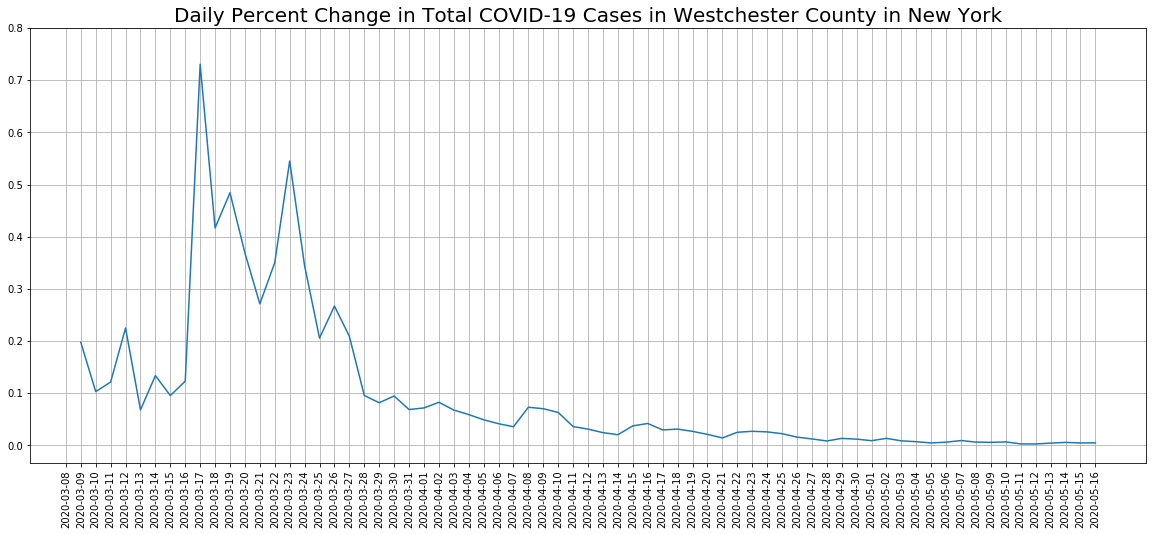

In [353]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Daily Percent Change in Total COVID-19 Cases in Westchester County in New York', fontsize = '20')
plt.plot(covid_data_NY_WC_pct.index, covid_data_NY_WC_pct.cases_dailypctchange)

y_ticks = np.linspace(0,0.8,9)
plt.xticks(covid_data_NY_WC_pct.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [383]:
covid_data_latest_density = covid_data_latest[['State_County', 'cases', 'deaths', '2019EstPop', 'CasesPer100000','Pctile_CasesPer100000', 'Pctile_2019EstPop', 'Diff_Pct2019Pop_VS_PctCases']]
covid_data_latest_density.head(20)

State_County  cases  deaths  2019EstPop  CasesPer100000  \
53      Alabama_Autauga County    110       4     55869.0      196.889151   
117     Alabama_Baldwin County    254       8    223234.0      113.781951   
161     Alabama_Barbour County     79       1     24686.0      320.019444   
209        Alabama_Bibb County     50       1     22394.0      223.274091   
262      Alabama_Blount County     45       0     57826.0       77.819666   
314     Alabama_Bullock County     35       1     10101.0      346.500347   
367      Alabama_Butler County    271       9     19448.0     1393.459482   
427     Alabama_Calhoun County    130       3    113605.0      114.431583   
486    Alabama_Chambers County    328      22     33254.0      986.347507   
539    Alabama_Cherokee County     27       0     26196.0      103.069171   
592     Alabama_Chilton County     77       1     44428.0      173.314126   
644     Alabama_Choctaw County     84       3     12589.0      667.249186   
690      Alabama_Clarke County     74       2     23622.0      313.267293   
743        Alabama_Clay County     27       2     13235.0      204.004533   
796    Alabama_Cleburne County     13       1     14910.0       87.189805   
841      Alabama_Coffee County    164       1     52342.0      313.323908   
894     Alabama_Colbert County     87       2     55241.0      157.491718   
940     Alabama_Conecuh County     18       0     12067.0      149.167150   
992       Alabama_Coosa County     34       1     10663.0      318.859608   
1043  Alabama_Covington County     57       1     37049.0      153.850306   

      Pctile_CasesPer100000  Pctile_2019EstPop  Diff_Pct2019Pop_VS_PctCases  
53                 0.688233           0.681123                    -0.007110  
117                0.529684           0.893352                     0.363669  
161                0.804479           0.442232                    -0.362247  
209                0.721294           0.412371                    -0.308923  
262                0.396729           0.689300                     0.292570  
314                0.823320           0.177035                    -0.646285  
367                0.975471           0.362247                    -0.613224  
427                0.531461           0.811589                     0.280128  
486                0.954141           0.531817                    -0.422325  
539                0.496978           0.461074                    -0.035905  
592                0.651617           0.623889                    -0.027728  
644                0.926413           0.233203                    -0.693210  
690                0.797725           0.429435                    -0.368290  
743                0.698542           0.243512                    -0.455030  
796                0.435478           0.280483                    -0.154995  
841                0.798080           0.667259                    -0.130821  
894                0.623889           0.678990                     0.055101  
940                0.610380           0.217561                    -0.392819  
992                0.802702           0.190188                    -0.612513  
1043               0.618557           0.567366                    -0.051191

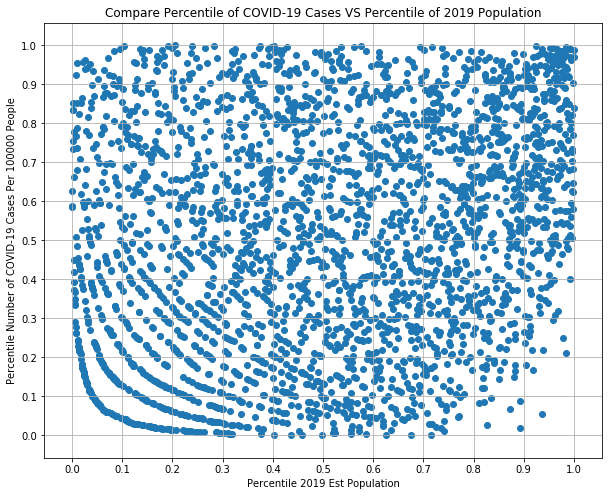

In [384]:
plt.figure(figsize=[10,8])
plt.grid()
plt.title('Compare Percentile of COVID-19 Cases VS Percentile of 2019 Population')
plt.scatter(covid_data_latest_density.Pctile_2019EstPop,covid_data_latest_density.Pctile_CasesPer100000)
x_ticks = np.linspace(0,1,11)
y_ticks = np.linspace(0,1,11)
plt.xticks(x_ticks)
plt.yticks(y_ticks)
plt.xlabel('Percentile 2019 Est Population')
plt.ylabel('Percentile Number of COVID-19 Cases Per 100000 People');

In [385]:
covid_data_latest_density[covid_data_latest_density['Pctile_2019EstPop'] 
                          < 0.1][covid_data_latest_density['Pctile_CasesPer100000'] 
                                 > 0.9].sort_values(by='Diff_Pct2019Pop_VS_PctCases')

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


State_County  cases  deaths  2019EstPop  CasesPer100000  \
45945        Kansas_Clark County     20       0      1994.0     1003.009027   
20888       Georgia_Baker County     33       2      3038.0     1086.240948   
22312        Georgia_Clay County     29       3      2834.0     1023.288638   
47157       Kansas_Kearny County     36       0      3838.0      937.988536   
81791     Nebraska_Gosper County     13       0      1990.0      653.266332   
130220      Texas_Sherman County     23       0      3022.0      761.085374   
124508       Texas_Donley County     26       0      3278.0      793.166565   
21682     Georgia_Calhoun County    123       7      6189.0     1987.396995   
27215    Georgia_Randolph County    169      21      6778.0     2493.360873   
103874     Oklahoma_Greer County     66       7      5712.0     1155.462185   
128191        Texas_Mason County     31       0      4274.0      725.315863   
34923    Illinois_Pulaski County     40       0      5335.0      749.765698   
80608       Montana_Toole County     29       6      4736.0      612.331081   
26131      Georgia_Miller County     38       0      5718.0      664.568031   
13305    Colorado_Crowley County     39       1      6061.0      643.458175   
22431      Georgia_Clinch County     41       1      6618.0      619.522514   
78818   Missouri_Sullivan County     34       0      6089.0      558.383971   
27643     Georgia_Stewart County     37       0      6621.0      558.827972   

        Pctile_CasesPer100000  Pctile_2019EstPop  Diff_Pct2019Pop_VS_PctCases  
45945                0.955919           0.009243                    -0.946676  
20888                0.962673           0.026662                    -0.936011  
22312                0.957341           0.022752                    -0.934589  
47157                0.952009           0.036260                    -0.915748  
81791                0.923569           0.008887                    -0.914682  
130220               0.938500           0.025951                    -0.912549  
124508               0.942410           0.030217                    -0.912193  
21682                0.984714           0.083896                    -0.900818  
27215                0.990402           0.096338                    -0.894063  
103874               0.966584           0.072698                    -0.893886  
128191               0.933523           0.042659                    -0.890864  
34923                0.937433           0.062922                    -0.874511  
80608                0.913615           0.051902                    -0.861713  
26131                0.925347           0.073231                    -0.852115  
13305                0.920725           0.081408                    -0.839317  
22431                0.914682           0.093139                    -0.821543  
78818                0.901173           0.082119                    -0.819054  
27643                0.901529           0.093850                    -0.807679

In [386]:
covid_data_latest_density[covid_data_latest_density['Pctile_2019EstPop'] 
                          > 0.8][covid_data_latest_density['Pctile_CasesPer100000'] 
                                 < 0.2].sort_values(by='Diff_Pct2019Pop_VS_PctCases', ascending=False)

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


State_County  cases  deaths  2019EstPop  \
107001               Oregon_Lane County     64       2    382067.0   
9269            California_Butte County     22       0    219186.0   
11919          California_Shasta County     34       4    180080.0   
106779            Oregon_Jackson County     50       0    220944.0   
8442          Arkansas_Sebastian County     15       0    127827.0   
76060            Missouri_Greene County    105       8    293086.0   
147348        Wisconsin_Marathon County     32       1    135692.0   
76443            Missouri_Jasper County     27       0    121328.0   
9551        California_El Dorado County     64       0    192843.0   
106576            Oregon_Douglas County     24       0    110980.0   
128404            Texas_McLennan County     97       4    256623.0   
94522      North Carolina_Onslow County     70       2    197938.0   
14653              Colorado_Mesa County     50       0    154210.0   
29389              Hawaii_Hawaii County     76       0    201513.0   
108284        Pennsylvania_Blair County     34       0    121829.0   
29999           Idaho_Bonneville County     33       0    119062.0   
121075        Tennessee_Sullivan County     57       2    158348.0   
30663             Idaho_Kootenai County     65       0    165697.0   
80168           Montana_Missoula County     39       1    119600.0   
91541   North Carolina_Brunswick County     55       4    142820.0   
4377             Arizona_Cochise County     46       1    125922.0   
129373              Texas_Parker County     57       0    142878.0   
87913        New York_Chautauqua County     48       3    126903.0   
147191       Wisconsin_La Crosse County     44       0    118016.0   
108517      Pennsylvania_Cambria County     53       2    130192.0   

        CasesPer100000  Pctile_CasesPer100000  Pctile_2019EstPop  \
107001       16.750989               0.055101           0.935300   
9269         10.037137               0.019197           0.891930   
11919        18.880498               0.067544           0.872023   
106779       22.630169               0.089229           0.892997   
8442         11.734610               0.027373           0.826164   
76060        35.825662               0.167437           0.917526   
147348       23.582820               0.096694           0.834341   
76443        22.253725               0.086029           0.820121   
9551         33.187619               0.150373           0.879488   
106576       21.625518               0.084252           0.810167   
128404       37.798638               0.180590           0.905084   
94522        35.364609               0.165659           0.882332   
14653        32.423319               0.144330           0.849627   
29389        37.714688               0.179879           0.883399   
108284       27.907969               0.121578           0.820476   
29999        27.716652               0.120512           0.817277   
121075       35.996666               0.168503           0.853537   
30663        39.228230               0.189122           0.861358   
80168        32.608696               0.147174           0.818343   
91541        38.510013               0.184856           0.840028   
4377         36.530551               0.171347           0.824031   
129373       39.894175               0.193388           0.840384   
87913        37.824165               0.180946           0.825453   
147191       37.283080               0.175969           0.816210   
108517       40.709107               0.198720           0.829364   

        Diff_Pct2019Pop_VS_PctCases  
107001                     0.880199  
9269                       0.872734  
11919                      0.804479  
106779                     0.803768  
8442                       0.798791  
76060                      0.750089  
147348                     0.737647  
76443                      0.734092  
9551                       0.729115  
106576                     0.725915  
128404             

In [387]:
covid_data_latest_density_NY = covid_data_latest_density[covid_data_latest_density.State_County.str.contains('New York')]

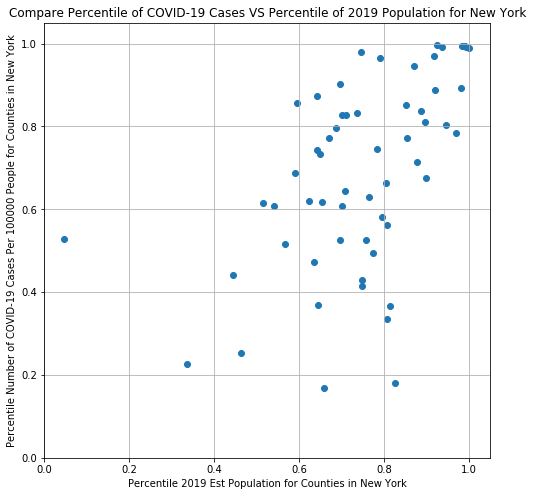

In [388]:
plt.figure(figsize=[8,8])
plt.grid()
plt.title('Compare Percentile of COVID-19 Cases VS Percentile of 2019 Population for New York')
plt.scatter(covid_data_latest_density_NY.Pctile_2019EstPop,covid_data_latest_density_NY.Pctile_CasesPer100000)
plt.xlim(0,1.05)
plt.ylim(0,1.05)
plt.xlabel('Percentile 2019 Est Population for Counties in New York')
plt.ylabel('Percentile Number of COVID-19 Cases Per 100000 People for Counties in New York');

In [389]:
covid_data_latest_density_NY[covid_data_latest_density_NY.Pctile_CasesPer100000 
                             < 0.4][covid_data_latest_density_NY.Pctile_2019EstPop > 0.6]

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


State_County  cases  deaths  2019EstPop  CasesPer100000  \
87913  New York_Chautauqua County     48       3    126903.0       37.824165   
88202    New York_Cortland County     34       0     47581.0       71.457094   
88510    New York_Franklin County     18       0     50022.0       35.984167   
88875   New York_Jefferson County     71       0    109834.0       64.643007   
89735      New York_Oswego County     83       0    117124.0       70.865066   

       Pctile_CasesPer100000  Pctile_2019EstPop  Diff_Pct2019Pop_VS_PctCases  
87913               0.180946           0.825453                     0.644508  
88202               0.370068           0.644508                     0.274440  
88510               0.168148           0.657305                     0.489157  
88875               0.334163           0.807323                     0.473160  
89735               0.366157           0.814788                     0.448631

In [390]:
covid_data_latest_density_MI = covid_data_latest_density[covid_data_latest_density.State_County.str.contains('Michigan')]

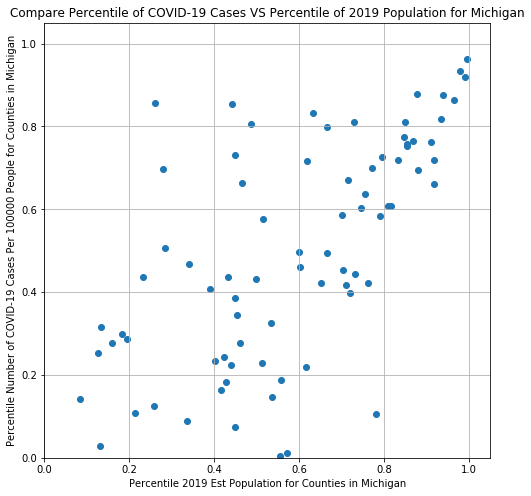

In [391]:
plt.figure(figsize=[8,8])
plt.grid()
plt.title('Compare Percentile of COVID-19 Cases VS Percentile of 2019 Population for Michigan')
plt.scatter(covid_data_latest_density_MI.Pctile_2019EstPop,covid_data_latest_density_MI.Pctile_CasesPer100000)
plt.xlim(0,1.05)
plt.ylim(0,1.05)
plt.xlabel('Percentile 2019 Est Population for Counties in Michigan')
plt.ylabel('Percentile Number of COVID-19 Cases Per 100000 People for Counties in Michigan');

In [392]:
covid_data_latest_density_CA = covid_data_latest_density[covid_data_latest_density.State_County.str.contains('California')]

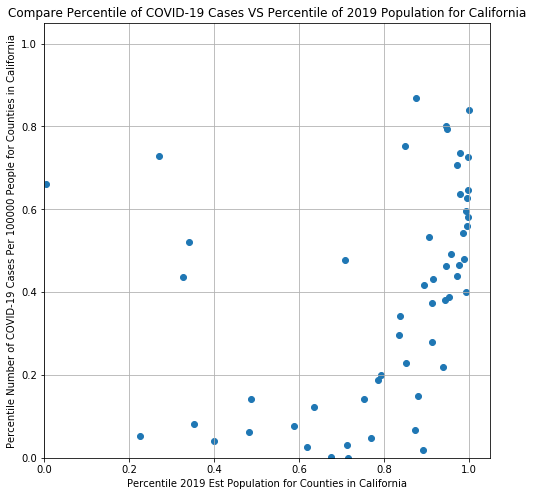

In [393]:
plt.figure(figsize=[8,8])
plt.grid()
plt.title('Compare Percentile of COVID-19 Cases VS Percentile of 2019 Population for California')
plt.scatter(covid_data_latest_density_CA.Pctile_2019EstPop,covid_data_latest_density_CA.Pctile_CasesPer100000)
plt.xlim(0,1.05)
plt.ylim(0,1.05)
plt.xlabel('Percentile 2019 Est Population for Counties in California')
plt.ylabel('Percentile Number of COVID-19 Cases Per 100000 People for Counties in California');

In [394]:
covid_data_latest_density_CA[covid_data_latest_density_CA['Pctile_2019EstPop']
                            > 0.8][covid_data_latest_density_CA['Pctile_CasesPer100000'] < 0.2]

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


State_County  cases  deaths  2019EstPop  CasesPer100000  \
9269       California_Butte County     22       0    219186.0       10.037137   
9551   California_El Dorado County     64       0    192843.0       33.187619   
11919     California_Shasta County     34       4    180080.0       18.880498   

       Pctile_CasesPer100000  Pctile_2019EstPop  Diff_Pct2019Pop_VS_PctCases  
9269                0.019197           0.891930                     0.872734  
9551                0.150373           0.879488                     0.729115  
11919               0.067544           0.872023                     0.804479

In [395]:
covid_data_latest_density_CA[covid_data_latest_density_CA['Pctile_2019EstPop']
                            < 0.4][covid_data_latest_density_CA['Pctile_CasesPer100000'] > 0.6]

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


State_County  cases  deaths  2019EstPop  CasesPer100000  \
9154   California_Alpine County      2       0      1129.0      177.147919   
10474    California_Mono County     33       1     14444.0      228.468568   

       Pctile_CasesPer100000  Pctile_2019EstPop  Diff_Pct2019Pop_VS_PctCases  
9154                0.661571           0.003555                    -0.658016  
10474               0.728759           0.270530                    -0.458230

### <span style="color:red"> **IGNORE scatter plot below b/c many LA counties need to have 'County' name (in COVID-19 data file) fixed to match USA county population file (so left join will work properly)

In [396]:
covid_data_latest_density_LA = covid_data_latest_density[covid_data_latest_density.State_County.str.contains('Louisiana')]

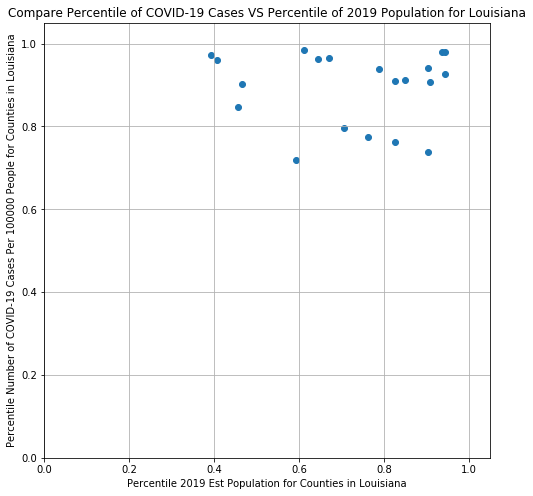

In [397]:
plt.figure(figsize=[8,8])
plt.grid()
plt.title('Compare Percentile of COVID-19 Cases VS Percentile of 2019 Population for Louisiana')
plt.scatter(covid_data_latest_density_LA.Pctile_2019EstPop,covid_data_latest_density_LA.Pctile_CasesPer100000)
plt.xlim(0,1.05)
plt.ylim(0,1.05)
plt.xlabel('Percentile 2019 Est Population for Counties in Louisiana')
plt.ylabel('Percentile Number of COVID-19 Cases Per 100000 People for Counties in Louisiana');

In [398]:
covid_data_latest_density_IL = covid_data_latest_density[covid_data_latest_density.State_County.str.contains('Illinois')]

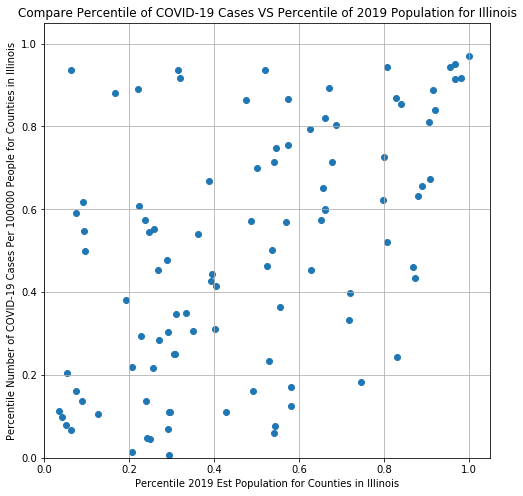

In [399]:
plt.figure(figsize=[8,8])
plt.grid()
plt.title('Compare Percentile of COVID-19 Cases VS Percentile of 2019 Population for Illinois')
plt.scatter(covid_data_latest_density_IL.Pctile_2019EstPop,covid_data_latest_density_IL.Pctile_CasesPer100000)
plt.xlim(0,1.05)
plt.ylim(0,1.05)
plt.xlabel('Percentile 2019 Est Population for Counties in Illinois')
plt.ylabel('Percentile Number of COVID-19 Cases Per 100000 People for Counties in Illinois');

In [400]:
covid_data_latest_density_IL[covid_data_latest_density_IL['Pctile_CasesPer100000'] > 
                             0.8][covid_data_latest_density_IL['Pctile_2019EstPop'] < 0.2]

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


State_County  cases  deaths  2019EstPop  CasesPer100000  \
33117   Illinois_Jasper County     46       8      9610.0      478.668054   
34923  Illinois_Pulaski County     40       0      5335.0      749.765698   

       Pctile_CasesPer100000  Pctile_2019EstPop  Diff_Pct2019Pop_VS_PctCases  
33117               0.880910           0.165659                    -0.715251  
34923               0.937433           0.062922                    -0.874511

In [401]:
covid_data_latest_density_IL[covid_data_latest_density_IL['Pctile_CasesPer100000'] < 
                             0.4][covid_data_latest_density_IL['Pctile_2019EstPop'] > 0.6]

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


State_County  cases  deaths  2019EstPop  CasesPer100000  \
31371       Illinois_Adams County     42       1     65435.0       64.185833   
35469    Illinois_Tazewell County     62       4    131803.0       47.039900   
35596   Illinois_Vermilion County     29       1     75758.0       38.279786   
35975  Illinois_Williamson County     52       1     66597.0       78.081595   

       Pctile_CasesPer100000  Pctile_2019EstPop  Diff_Pct2019Pop_VS_PctCases  
31371               0.332385           0.718095                     0.385709  
35469               0.242446           0.831141                     0.588695  
35596               0.183434           0.746534                     0.563100  
35975               0.398507           0.719872                     0.321365

## <span style="color:green"> Calculate Implied Daily Growth Rate (Trailing 5 Days) and Implied Doubling Time (Days) By State, By Date

In [186]:
covid_daily_st_summ = covid_data.groupby(['date', 'state'])[['cases', 'deaths']].sum()
covid_daily_st_summ.reset_index(inplace=True)
covid_daily_st_summ

date          state  cases  deaths
0    2020-01-21     Washington      1       0
1    2020-01-22     Washington      1       0
2    2020-01-23     Washington      1       0
3    2020-01-24       Illinois      1       0
4    2020-01-24     Washington      1       0
...         ...            ...    ...     ...
4134 2020-05-16       Virginia  29683    1002
4135 2020-05-16     Washington  19426    1015
4136 2020-05-16  West Virginia   1470      65
4137 2020-05-16      Wisconsin  12368     453
4138 2020-05-16        Wyoming    741       7

[4139 rows x 4 columns]

In [187]:
covid_daily_summary = covid_daily_st_summ.pivot(index = 'state', columns = 'date', values = 'cases')
covid_daily_summary.fillna(0,inplace=True)
covid_daily_summary.reset_index(inplace=True)
covid_daily_summary

date                     state  2020-01-21 00:00:00  2020-01-22 00:00:00  \
0                      Alabama                  0.0                  0.0   
1                       Alaska                  0.0                  0.0   
2                      Arizona                  0.0                  0.0   
3                     Arkansas                  0.0                  0.0   
4                   California                  0.0                  0.0   
5                     Colorado                  0.0                  0.0   
6                  Connecticut                  0.0                  0.0   
7                     Delaware                  0.0                  0.0   
8         District of Columbia                  0.0                  0.0   
9                      Florida                  0.0                  0.0   
10                     Georgia                  0.0                  0.0   
11                        Guam                  0.0                  0.0   
12                      Hawaii                  0.0                  0.0   
13                       Idaho                  0.0                  0.0   
14                    Illinois                  0.0                  0.0   
15                     Indiana                  0.0                  0.0   
16                        Iowa                  0.0                  0.0   
17                      Kansas                  0.0                  0.0   
18                    Kentucky                  0.0                  0.0   
19                   Louisiana                  0.0                  0.0   
20                       Maine                  0.0                  0.0   
21                    Maryland                  0.0                  0.0   
22               Massachusetts                  0.0                  0.0   
23                    Michigan                  0.0                  0.0   
24                   Minnesota                  0.0                  0.0   
25                 Mississippi                  0.0                  0.0   
26                    Missouri                  0.0                  0.0   
27                     Montana                  0.0                  0.0   
28                    Nebraska                  0.0                  0.0   
29                      Nevada                  0.0                  0.0   
30               New Hampshire                  0.0                  0.0   
31                  New Jersey                  0.0                  0.0   
32                  New Mexico                  0.0                  0.0   
33                    New York                  0.0                  0.0   
34              North Carolina                  0.0                  0.0   
35                North Dakota                  0.0                  0.0   
36    Northern Mariana Islands                  0.0                  0.0   
37                        Ohio                  0.0                  0.0   
38                    Oklahoma                  0.0                  0.0   
39                      Oregon                  0.0                  0.0   
40                Pennsylvania                  0.0                  0.0   
41                 Puerto Rico                  0.0                  0.0   
42                Rhode Island                  0.0                  0.0   
43              South Carolina                  0.0                  0.0   
44                South Dakota                  0.0                  0.0   
45                   Tennessee                  0.0                  0.0   
46                       Texas                  0.0                  0.0   
47                        Utah                  0.0                  0.0   
48                     Vermont                  0.0                  0.0   
49              Virgin Islands                  0.0                  0.0   
50                    Virginia                  0.0                  0.0   
51                  Washington                  

In [247]:
list2 = [0] + list(range(len(covid_daily_summary.columns)-21,len(covid_daily_summary.columns)))
list2

[0,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30]

In [248]:
covid_daily_summary = covid_daily_summary.iloc[:,list2]
covid_daily_summary

date                     state  2020-04-26 00:00:00  2020-04-27 00:00:00  \
0                      Alabama               6421.0               6539.0   
1                       Alaska                339.0                343.0   
2                      Arizona               6526.0               6716.0   
3                     Arkansas               3001.0               3069.0   
4                   California              43691.0              45211.0   
5                     Colorado              13440.0              13804.0   
6                  Connecticut              25269.0              25997.0   
7                     Delaware               4034.0               4162.0   
8         District of Columbia               3841.0               3892.0   
9                      Florida              31520.0              32130.0   
10                     Georgia              22459.0              23229.0   
11                        Guam                997.0               1113.0   
12                      Hawaii                599.0                600.0   
13                       Idaho               1897.0               1917.0   
14                    Illinois              43903.0              45883.0   
15                     Indiana              15012.0              16137.0   
16                        Iowa               5490.0               5868.0   
17                      Kansas               3198.0               3407.0   
18                    Kentucky               4074.0               4146.0   
19                   Louisiana              26773.0              27068.0   
20                       Maine               1015.0               1023.0   
21                    Maryland              18664.0              19574.0   
22               Massachusetts              54938.0              56462.0   
23                    Michigan              37752.0              38191.0   
24                   Minnesota               3602.0               3816.0   
25                 Mississippi               5911.0               6094.0   
26                    Missouri               6997.0               7171.0   
27                     Montana                448.0                449.0   
28                    Nebraska               3126.0               3487.0   
29                      Nevada               4638.0               4708.0   
30               New Hampshire               1864.0               1938.0   
31                  New Jersey             109038.0             111188.0   
32                  New Mexico               2728.0               2825.0   
33                    New York             292914.0             296991.0   
34              North Carolina               8830.0               9035.0   
35                North Dakota                867.0                942.0   
36    Northern Mariana Islands                 14.0                 14.0   
37                        Ohio              15963.0              16325.0   
38                    Oklahoma               3253.0               3280.0   
39                      Oregon               2311.0               2354.0   
40                Pennsylvania              42709.0              43728.0   
41                 Puerto Rico               1371.0               1388.0   
42                Rhode Island               7439.0               7708.0   
43              South Carolina               5490.0               5613.0   
44                South Dakota               2213.0               2246.0   
45                   Tennessee               9435.0               9739.0   
46                       Texas              25209.0              25963.0   
47                        Utah               4123.0               4236.0   
48                     Vermont                851.0                855.0   
49              Virgin Islands                 57.0                 59.0   
50                    Virginia              12969.0              13534.0   
51                  Washington              1366

In [249]:
covid_last5days_growthrate = covid_daily_summary[['state']]
# covid_last5days_growthrate['Pctchangecases_last2wks'] = covid_daily_summary[covid_daily_summary.columns[len(covid_daily_summary.columns)-1]] / covid_daily_summary[covid_daily_summary.columns[1]] - 1


In [250]:
list5 = list(range(6,len(list(covid_daily_summary))))

In [251]:
list5

[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

In [252]:
for z in list5:
    covid_last5days_growthrate[list(covid_daily_summary)[z]] = (covid_daily_summary[covid_daily_summary.columns[z]] / 
                                                        covid_daily_summary[covid_daily_summary.columns[z-5]])**(1/5)

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [253]:
covid_last5days_growthrate

date                     state  2020-05-01 00:00:00  2020-05-02 00:00:00  \
0                      Alabama             1.025823             1.030828   
1                       Alaska             1.013215             1.011399   
2                      Arizona             1.040579             1.044866   
3                     Arkansas             1.019794             1.019009   
4                   California             1.036697             1.035218   
5                     Colorado             1.031060             1.031481   
6                  Connecticut             1.026248             1.024531   
7                     Delaware             1.040424             1.038942   
8         District of Columbia             1.039324             1.042700   
9                      Florida             1.019527             1.019890   
10                     Georgia             1.033144             1.032582   
11                        Guam             1.022624             1.000718   
12                      Hawaii             1.003646             1.003640   
13                       Idaho             1.014144             1.014591   
14                    Illinois             1.050084             1.049804   
15                     Indiana             1.047594             1.039956   
16                        Iowa             1.075038             1.080475   
17                      Kansas             1.071173             1.073758   
18                    Kentucky             1.036721             1.033180   
19                   Louisiana             1.014075             1.014861   
20                       Maine             1.020429             1.024036   
21                    Maryland             1.047747             1.046497   
22               Massachusetts             1.032007             1.032531   
23                    Michigan             1.023243             1.024912   
24                   Minnesota             1.097292             1.102930   
25                 Mississippi             1.040588             1.040748   
26                    Missouri             1.023012             1.026026   
27                     Montana             1.001779             1.002217   
28                    Nebraska             1.091278             1.088648   
29                      Nevada             1.025060             1.027426   
30               New Hampshire             1.043838             1.046200   
31                  New Jersey             1.021357             1.021584   
32                  New Mexico             1.051881             1.057267   
33                    New York             1.013725             1.013849   
34              North Carolina             1.043442             1.049687   
35                North Dakota             1.050088             1.041252   
36    Northern Mariana Islands             1.000000             1.000000   
37                        Ohio             1.032630             1.034423   
38                    Oklahoma             1.028734             1.032619   
39                      Oregon             1.022187             1.022810   
40                Pennsylvania             1.031049             1.031533   
41                 Puerto Rico             1.027870             1.048039   
42                Rhode Island             1.037954             1.038019   
43              South Carolina             1.026532             1.029429   
44                South Dakota             1.026729             1.028673   
45                   Tennessee             1.045413             1.049091   
46                       Texas             1.037762             1.038978   
47                        Utah             1.032117             1.032933   
48                     Vermont             1.006496             1.007149   
49              Virgin Islands             1.029755             1.022677   
50                    Virginia             1.054390             1.055508   
51                  Washington             1.018

In [254]:
list6 = range(1,len(covid_last5days_growthrate.columns))

In [255]:
covid_impdoublingtime = covid_last5days_growthrate[['state']]

In [256]:
for date in list(covid_last5days_growthrate.columns)[1:]:
    covid_impdoublingtime[date] = 0.0        # add the columns, 0.0 is a placeholder (see for loop below)

/Users/matty2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [258]:
list_rows = range(0,len(covid_last5days_growthrate))

In [259]:
list_columns = range(1,len(covid_last5days_growthrate.columns))

In [260]:
for i in list_rows:
    for j in list_columns:
        try:
            covid_impdoublingtime.iloc[i,j] = math.log(2) / math.log(covid_last5days_growthrate.iloc[i,j])
        except:
            covid_impdoublingtime.iloc[i,j] = np.nan

In [271]:
covid_impdoublingtime = covid_impdoublingtime.round(2)
covid_impdoublingtime = covid_impdoublingtime[~covid_impdoublingtime.state.isin(['Guam', 'Northern Mariana Islands', 'Puerto Rico', 'Virgin Islands'])]
covid_impdoublingtime


date                 state  2020-05-01 00:00:00  2020-05-02 00:00:00  \
0                  Alabama                27.19                22.83   
1                   Alaska                52.80                61.15   
2                  Arizona                17.43                15.79   
3                 Arkansas                35.36                36.81   
4               California                19.23                20.03   
5                 Colorado                22.66                22.36   
6              Connecticut                26.75                28.60   
7                 Delaware                17.49                18.14   
8     District of Columbia                17.97                16.58   
9                  Florida                35.84                35.19   
10                 Georgia                21.26                21.62   
12                  Hawaii               190.45               190.77   
13                   Idaho                49.35                47.85   
14                Illinois                14.18                14.26   
15                 Indiana                14.91                17.69   
16                    Iowa                 9.58                 8.96   
17                  Kansas                10.08                 9.74   
18                Kentucky                19.22                21.24   
19               Louisiana                49.59                46.99   
20                   Maine                34.28                29.18   
21                Maryland                14.86                15.25   
22           Massachusetts                22.00                21.65   
23                Michigan                30.17                28.17   
24               Minnesota                 7.47                 7.08   
25             Mississippi                17.42                17.35   
26                Missouri                30.47                26.98   
27                 Montana               389.89               312.95   
28                Nebraska                 7.94                 8.16   
29                  Nevada                28.00                25.62   
30           New Hampshire                16.16                15.35   
31              New Jersey                32.80                32.46   
32              New Mexico                13.70                12.45   
33                New York                50.85                50.40   
34          North Carolina                16.30                14.29   
35            North Dakota                14.18                17.15   
37                    Ohio                21.59                20.48   
38                Oklahoma                24.47                21.59   
39                  Oregon                31.59                30.73   
40            Pennsylvania                22.67                22.33   
42            Rhode Island                18.61                18.58   
43          South Carolina                26.47                23.90   
44            South Dakota                26.28                24.52   
45               Tennessee                15.61                14.46   
46                   Texas                18.70                18.13   
47                    Utah                21.93                21.39   
48                 Vermont               107.06                97.31   
50                Virginia                13.09                12.83   
51              Washington                36.86                36.30   
52           West Virginia                38.98                36.62   
53               Wisconsin                16.27                15.01   
54                 Wyoming                28.88                32.25   

date  2020-05-03 00:00:00  2020-05-04 00:00:00  2020-05-05 00:00:00  \
0                   22.24                21.91                19.57   
1                   72.87                83.28                78.18   
2                   15.90                1

In [281]:
covid_FL_cases = covid_impdoublingtime[covid_impdoublingtime.state == 'Florida']
covid_FL_cases = covid_FL_cases.transpose()
covid_FL_cases = covid_FL_cases.iloc[1:,:]
covid_FL_cases.columns = ['Cases_doublingtime_days']
covid_FL_cases.index = pd.to_datetime(covid_FL_cases.index)
covid_FL_cases

Cases_doublingtime_days
date                              
2020-05-01                   35.84
2020-05-02                   35.19
2020-05-03                   36.92
2020-05-04                   32.75
2020-05-05                   32.85
2020-05-06                   38.46
2020-05-07                   38.22
2020-05-08                   41.76
2020-05-09                    42.9
2020-05-10                    42.8
2020-05-11                    45.9
2020-05-12                   45.18
2020-05-13                   44.12
2020-05-14                    44.9
2020-05-15                   41.42
2020-05-16                   38.79

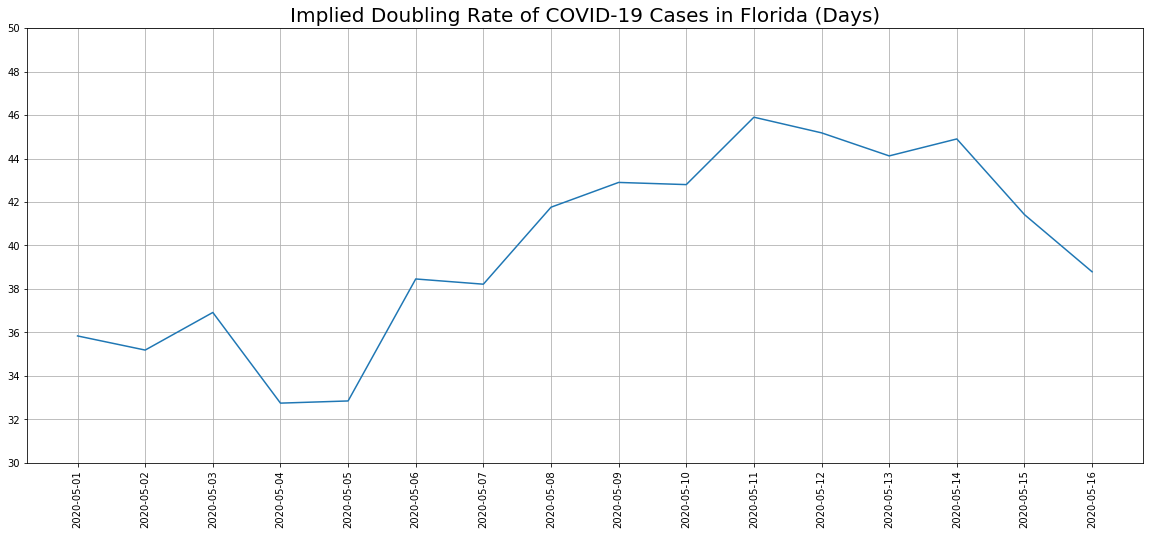

In [284]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Implied Doubling Rate of COVID-19 Cases in Florida (Days)', fontsize = '20')
plt.plot(covid_FL_cases.index, covid_FL_cases.Cases_doublingtime_days)

y_ticks = np.linspace(30,50,11)
plt.xticks(covid_FL_cases.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [288]:
covid_GA_cases = covid_impdoublingtime[covid_impdoublingtime.state == 'Georgia']
covid_GA_cases = covid_GA_cases.transpose()
covid_GA_cases = covid_GA_cases.iloc[7:,:]
covid_GA_cases.columns = ['Cases_doublingtime_days']
covid_GA_cases.index = pd.to_datetime(covid_GA_cases.index)
covid_GA_cases

Cases_doublingtime_days
date                              
2020-05-07                   30.72
2020-05-08                   29.27
2020-05-09                   33.08
2020-05-10                   31.21
2020-05-11                   39.53
2020-05-12                   39.67
2020-05-13                   40.51
2020-05-14                    38.8
2020-05-15                    39.3
2020-05-16                   36.77

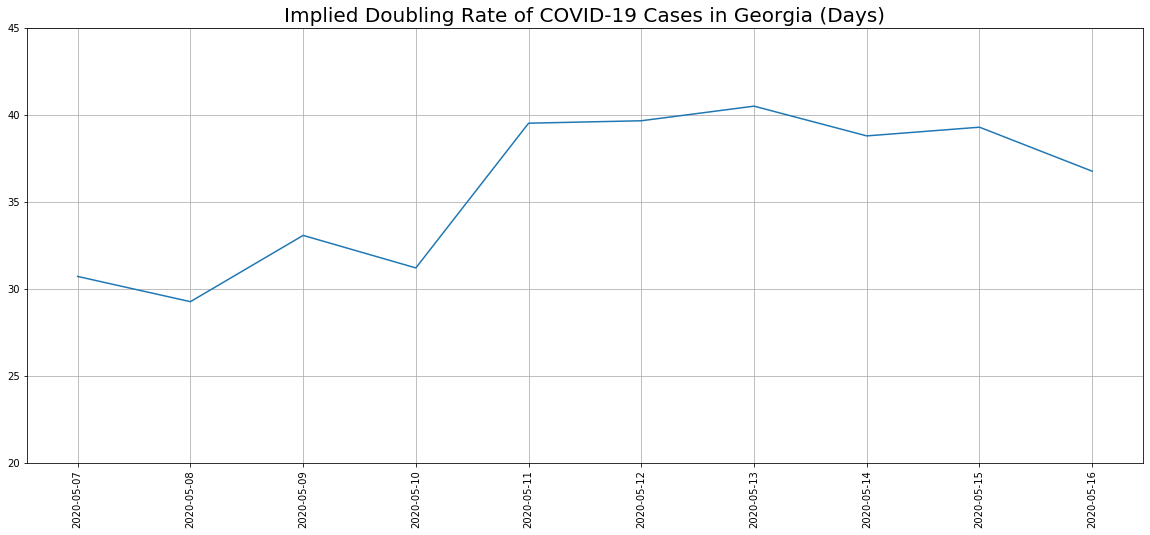

In [290]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('Implied Doubling Rate of COVID-19 Cases in Georgia (Days)', fontsize = '20')
plt.plot(covid_GA_cases.index, covid_GA_cases.Cases_doublingtime_days)

y_ticks = np.linspace(20,45,6)
plt.xticks(covid_GA_cases.index, fontsize = '10', rotation = 90)
plt.yticks(y_ticks);

In [272]:
covid_GA = covid_daily_summary[covid_daily_summary['state'] == 'Georgia']
covid_GA

date    state  2020-04-26 00:00:00  2020-04-27 00:00:00  2020-04-28 00:00:00  \
10    Georgia              22459.0              23229.0              23800.0   

date  2020-04-29 00:00:00  2020-04-30 00:00:00  2020-05-01 00:00:00  \
10                24300.0              25431.0              26436.0   

date  2020-05-02 00:00:00  2020-05-03 00:00:00  2020-05-04 00:00:00  ...  \
10                27268.0              27618.0              28350.0  ...   

date  2020-05-07 00:00:00  2020-05-08 00:00:00  2020-05-09 00:00:00  \
10                30524.0              31089.0              31481.0   

date  2020-05-10 00:00:00  2020-05-11 00:00:00  2020-05-12 00:00:00  \
10                32267.0              32448.0              33311.0   

date  2020-05-13 00:00:00  2020-05-14 00:00:00  2020-05-15 00:00:00  \
10                33866.0              34422.0              35242.0   

date  2020-05-16 00:00:00  
10                35655.0  

[1 rows x 22 columns]

In [109]:
covid_GA = covid_GA.transpose()
covid_GA.columns = ['cases']
covid_GA = covid_GA.iloc[20:,:]

In [110]:
covid_GA = covid_GA[covid_GA.cases > 0]

In [111]:
covid_GA.index = pd.to_datetime(covid_GA.index)
covid_GA = covid_GA[covid_GA.index > '2020-03-27']

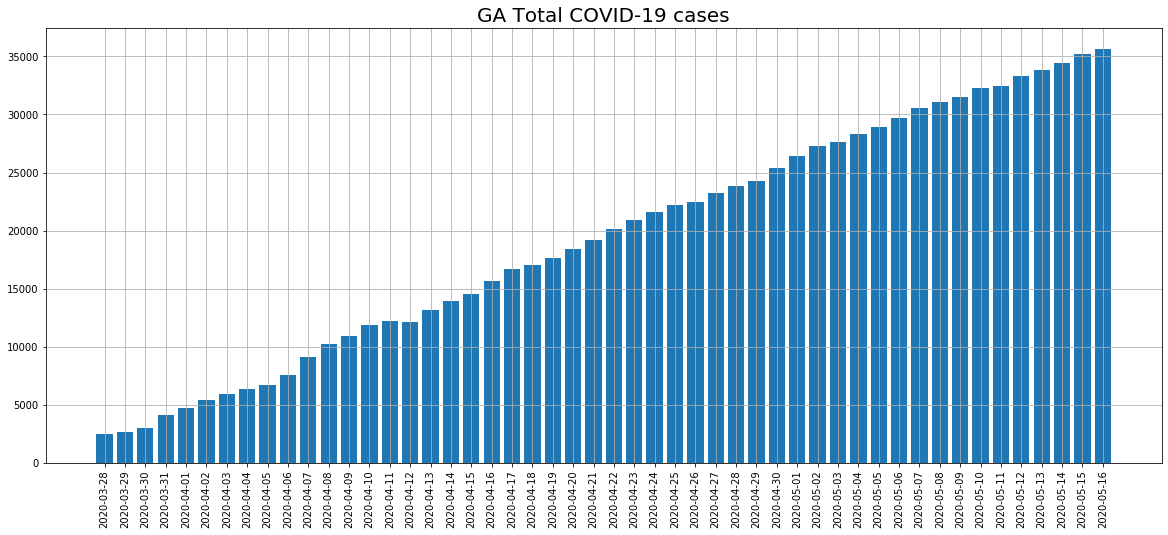

In [112]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('GA Total COVID-19 cases', fontsize = '20')
plt.bar(covid_GA.index,covid_GA.cases)

# y_ticks = np.linspace(0,30000,16)
plt.xticks(covid_GA.index, fontsize = '10', rotation = 90);
# plt.yticks(y_ticks);

In [113]:
covid_GA_daily = covid_GA.diff()
covid_GA_daily.columns = ['dailynewcases']

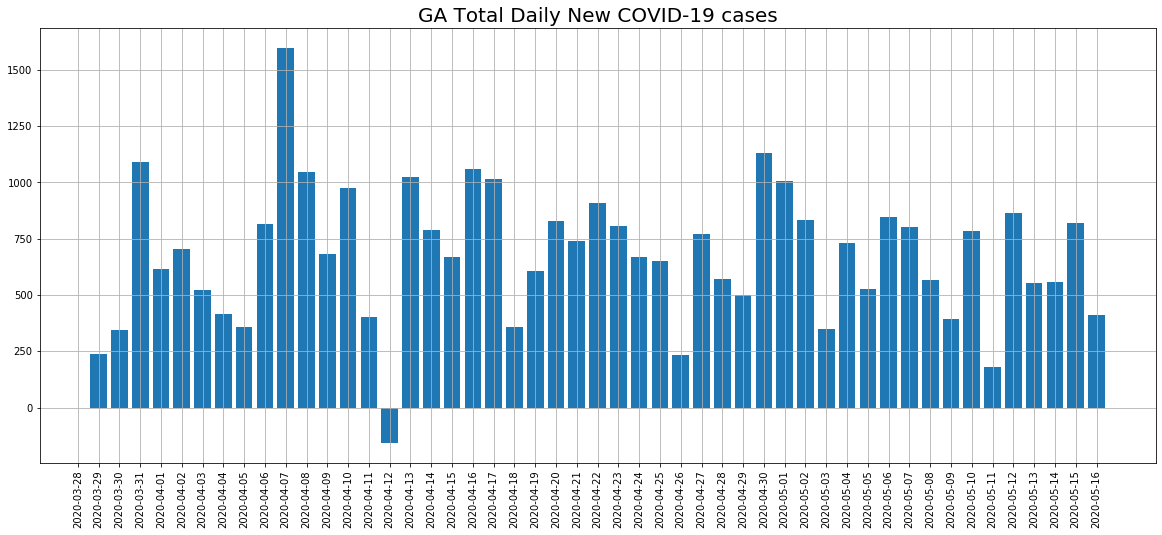

In [114]:
plt.figure(figsize=[20,8])
plt.grid()
plt.title('GA Total Daily New COVID-19 cases', fontsize = '20')
plt.bar(covid_GA_daily.index,covid_GA_daily.dailynewcases)

# y_ticks = np.linspace(0,30000,16)
plt.xticks(covid_GA.index, fontsize = '10', rotation = 90);
# plt.yticks(y_ticks);

In [402]:
whos

Variable                               Type         Data/Info
-------------------------------------------------------------
COVID_dbl_dailycol                     DataFrame                        State<...>\n[1911 rows x 8 columns]
FuncFormatter                          type         <class 'matplotlib.ticker.FuncFormatter'>
HH_income                              DataFrame             FIPS State      <...>\n[3184 rows x 4 columns]
USA_pop_county                         DataFrame            State            <...>\n[3194 rows x 4 columns]
US_deathrate                           float        0.060124290321793124
US_totalcases                          int          1474612
US_totaldeaths                         int          88660
X                                      list         n=10
X_val                                  ndarray      10: 10 elems, type `int64`, 80 bytes
Y1                                     list         n=10
Y2                                     list         n=10
county_

covid_data_latest_density_MI           DataFrame                        State<...>\n\n[80 rows x 8 columns]
covid_data_latest_density_NY           DataFrame                           St<...>               0.003199  
covid_data_latest_outperformers        DataFrame                 date        <...>               0.729115  
covid_data_latest_states               DataFrame                             <...>              741       7
covid_data_latest_sum                  DataFrame                             <...>   21       2    0.095238
covid_data_latest_underperformers      DataFrame                 date        <...>              -0.894063  
covid_data_pop_null                    DataFrame            state            <...>\n\n[91 rows x 5 columns]
covid_data_today                       DataFrame               date          <...>\n[2930 rows x 5 columns]
covid_data_top20_pop                   DataFrame                 date        <...>  85.003465    0.072552  
covid_data_top_counties_case